In [3]:
import sys

import pandas as pd

import superlets_package.superlets

sys.path.insert(0, '..')


In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import importlib
import scipy.signal as signal

import superlets_package.morlet as morlet
import superlets_package.superlets as superlet

#from superlets_package.superlets import wavelet_transform, adaptive_superlet_transform, fdeluca_changing, compute_psd_welch, meanfreq, instant_mean

In [5]:
importlib.reload(superlet)

<module 'superlets_package.superlets' from '/Users/neuralrehabilitationgroup/PycharmProjects/Superlets-Marina/superlets_package/superlets.py'>

# SIN and COS demo signal

In [6]:
# fs = 1024
# burst_freqs = [110]
# f_shift = 10
# n_cycles = 11
# n_neighb_cycles = 12
# #
# ys = []
# #
# # # create a 0.1s blank signal to start
# ys.append(jnp.zeros(int(fs*0.1)))
# #
# for f in burst_freqs:
# #   # frequency contaminated signal
# #   ############ CONTAMINATION
# #   t = 1/f * n_cycles
# #   x = jnp.linspace(0, t, int(t * fs))
# #   y = jnp.sin(2*jnp.pi*f*x) + jnp.sin(2*jnp.pi*(f+f_shift)*x - jnp.pi/1.5)
# #   ys.append(y)
# #   ############ CONTAMINATION
# #
# #   # time contaminated signal, 2 cycles later
#   ys.append(jnp.zeros(int(fs*(1/f)*2)))
# #
#   t2 = 1/f * n_neighb_cycles
#   x = jnp.linspace(0, t2, int(t2 * fs))
#   y = jnp.sin(2*jnp.pi*f*x)
#   ys.append(y)
# #
# #   # space between bursts of 0.1s
#   ys.append(jnp.zeros(int(fs*0.1)))
# #
# signal = jnp.concatenate(ys)

# Create simulated EMG signals

#### Baseline parameters

In [7]:
fs = 1024
signal_duration = 3
t = np.linspace(0, signal_duration, signal_duration * fs)
#noise = np.randomnormal(0, 0.01, len(t))  # Gaussian noise
noise = np.zeros(len(t))

### Burst parameters

In [8]:
burst_duration_1 = 1 #seconds
burst_start_1 = 1
MNF_1 = [110.71] 

#### Select method (DeLuca, band-pass filter)

In [9]:
mode = 'DeLuca'
#mode = 'Filter'
#mode = 'Matlab'

### Charge signals generated in Matlab

In [10]:
if mode == 'Matlab':
    burst_1 = pd.read_csv('burst_1s_matlab.csv', header = None)
    burst_1 = burst_1[0]

### Simulated EMG signal with bandpass filter

In [11]:
if mode == 'Filter':
    
    # Create noise
    #MNF_1 = [110.71]  # Central frequency
    bw = 100    # Filter bandwidth
    
    low_cut = 20
    high_cut = 300
    
    plot = True
    
    # We generate gaussian noise
    samples = int(burst_duration_1 * fs)
    t = np.linspace(0, burst_duration_1, samples, endpoint=False)
    gauss_noise = np.random.normal(0, 1, samples)  # Ruido gaussiano de media 0 y varianza 1
    
    # Create and apply filter
    nyquist = fs / 2
    #frec_baja = (MNF_1[0] - bw / 2) / nyquist
    frec_baja = low_cut / nyquist
    #frec_alta = (MNF_1[0] + bw / 2) / nyquist
    frec_alta = high_cut / nyquist
    # Diseñar filtro paso banda Butterworth
    b, a = signal.butter(N=4, Wn=[frec_baja, frec_alta], btype='band')
    burst_1 = signal.filtfilt(b, a, gauss_noise)
    
    if plot:
        plt.figure(figsize=(12, 6))
        plt.subplot(2, 1, 1)
        plt.plot(t, gauss_noise)
        plt.title("Gaussian noise")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.grid()
        plt.subplot(2, 1, 2)
        plt.plot(t, burst_1, color='orange')
        plt.title(f"Filtered noise")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.grid()
        plt.tight_layout()
        plt.show()
        
    w, h = signal.freqz(b, a, worN=8000)  # worN determina el número de puntos a evaluar

    # Graficar respuesta en frecuencia
    plt.figure()
    plt.plot(w * nyquist / np.pi, 20 * np.log10(abs(h)), label="Respuesta en Frecuencia")
    plt.title("Respuesta en Frecuencia del Filtro Butterworth")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Amplitud (dB)")
    plt.grid()
    plt.legend()
    plt.show()


### Simulated EMG signal: Modelo de DeLuca

In [16]:
importlib.reload(superlet)

<module 'superlets_package.superlets' from '/Users/neuralrehabilitationgroup/PycharmProjects/Superlets-Marina/superlets_package/superlets.py'>

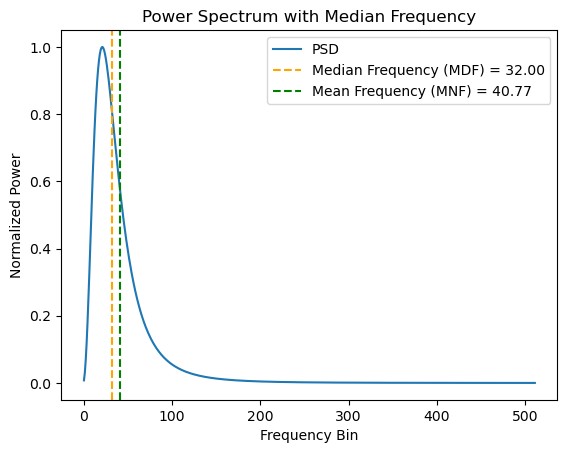

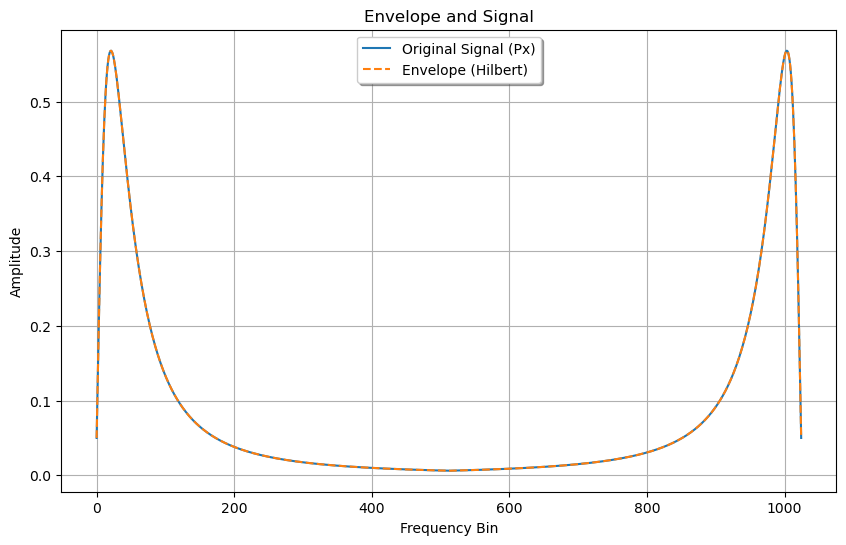

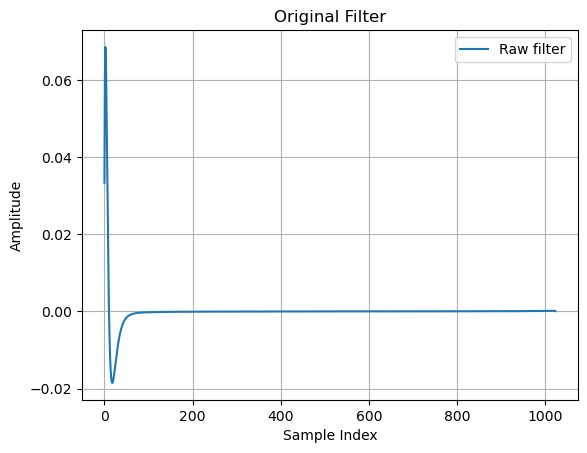

In [27]:
if mode == 'DeLuca':
    burst_1 = []
    #[filtro, Pdeluca, burst_1] = superlet.fdeluca(72, 110, 1024, burst_duration_1, plot = True)
    [filtro, Pdeluca, burst_1, MNF, MNF_analytic] = superlet.fdeluca(40, 20, fs, burst_duration_1, plot = True)
    f = np.arange(0, fs / 2)
    MNF_IDEAL = superlet.meanfreq(Pdeluca,f)
    MNF_1 = [MNF_IDEAL]
    # bw = 100
    # nyquist = fs / 2
    # frec_baja = (MNF_1[0] - bw / 2) / nyquist
    # frec_alta = (MNF_1[0] + bw / 2) / nyquist
    # # Diseñar filtro paso banda Butterworth
    # b, a = signal.butter(N=4, Wn=[frec_baja, frec_alta], btype='band')
    # burst_1 = signal.filtfilt(b, a, burst_1)

In [28]:
MNF

40.77148546557233

In [29]:
MNF_IDEAL

39.77148546557233

In [12]:
# burst_1 = []
# # if mode == 'DeLuca':   
# [Pxx_1, burst_1, MNF_1, MDF_1] = superlet.fdeluca_changing(80, 120, 60, 100, fs, T = burst_duration_1, wind_change = burst_duration_1, plot = True)
# #     # nyquist = 0.5 * fs
#     # low = 20 / nyquist
#     # high = 300 / nyquist
#     # b, a = signal.butter(N=4, Wn=[low, high], btype='band')  # Filtro pasa banda
#     # burst_1 = signal.filtfilt(b, a, burst_1)

#### Add noise to the signal with a particular value for SNR

In [13]:
# def add_wgn_to_sig(signal, w_g_noise, ssnnrr):
#     
#     sign_UnitaryVar = (signal - np.mean(signal)) / np.std(signal)
#     Pn = np.var(w_g_noise)
#     Ps = Pn * (10**(ssnnrr / 10))
#     new_signals = np.sqrt(Ps) * sign_UnitaryVar
#     noisy_signal = new_signals + w_g_noise
# 
#     return noisy_signal


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def add_noise(x, snr, plot = False):
    """
    Add Gaussian random noise to a signal with a specified SNR.

    Parameters:
        x (numpy array): Original signal (vector)
        snr (float): Desired Signal-to-Noise Ratio (in dB)

    Returns:
        numpy array: Signal with added Gaussian noise
    """
    n = len(x)  # Length of the signal
    Px = np.sum(np.abs(x)**2) / n  # Power of the original signal
    Pn = Px / (10**(snr / 10))  # Noise power for the given SNR

    noise = np.sqrt(Pn) * np.random.randn(*x.shape)  # Generate Gaussian noise
    xn = x + noise  # Add noise to the original signal

    # Plot the original and noisy signals
    if plot:
        plt.figure()
        plt.plot(xn, 'r', label='Noisy Signal')
        plt.plot(x, 'b', label='Original Signal')
        plt.legend()
        plt.title(f'Signal with Added White Gaussian Noise (SNR = {snr} dB)')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.show()

    return xn

### We add burst to baseline signal

In [15]:
baseline_1 = noise.copy()
baseline_1[burst_start_1*fs:burst_start_1*fs + len(burst_1)] += burst_1

In [16]:
# burst_duration_2 = 3
# burst_start_2 = 5
# 
# [Pxx_2, burst_2, MNF_2, MDF_2] = superlet.fdeluca_changing(100, 140, 80, 120, fs, burst_duration_2, 0.125, plot = True)
# # t_2 = np.linspace(0, burst_duration_2, len(burst_2))
# # plt.plot(t_2, burst_2)
# # plt.title('Burst 2')
# # 
# plt.figure()
# psd_welch, f_welch = superlet.compute_psd_welch(burst_2, fs, plot=True, muscle='Burst 2')
# 
# baseline_1[burst_start_2*fs:burst_start_2*fs + len(burst_2)] += burst_2
# # plt.figure()
# # plt.plot(baseline_1)
# # plt.title('Baseline + Burst 2')

In [17]:
# # High frequency and very fast burst
# burst_duration_3 = 0.5
# burst_start_3 = 8.5
# 
# [Pxx_3, burst_3, MNF_3, MDF_3] = superlet.fdeluca_changing(220, 250, 200, 230, fs, burst_duration_3, 0.125, plot = False)
# # t_3 = np.linspace(0, burst_duration_3, len(burst_3))
# # plt.plot(t_3, burst_3)
# # plt.title('Burst 3')
# # 
# # plt.figure()
# psd_welch, f_welch = superlet.compute_psd_welch(burst_3, fs, plot=True, muscle='Burst 3')
# 
# baseline_1[int(burst_start_3 * fs):int(burst_start_3 * fs + len(burst_3))] += burst_3
# # plt.figure()
# # plt.plot(baseline_1)
# # plt.title('Baseline + Burst 3')

### Signal visualization

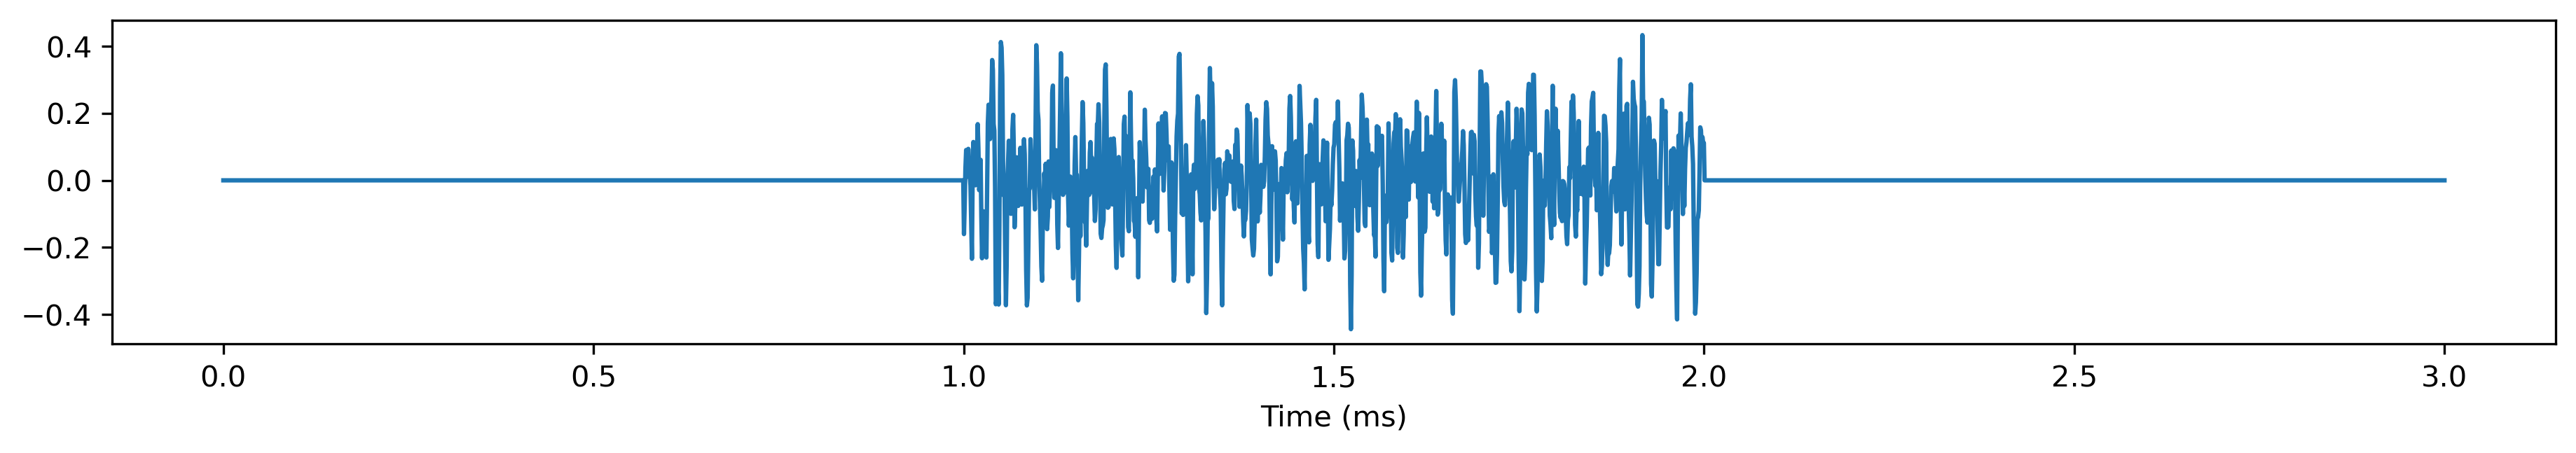

In [18]:
signal = baseline_1
fig, ax = plt.subplots(figsize=(15, 2), dpi=300)
ax.set_xlabel("Time (ms)")
ax.plot(jnp.linspace(0, len(signal)/fs, len(signal)), signal)

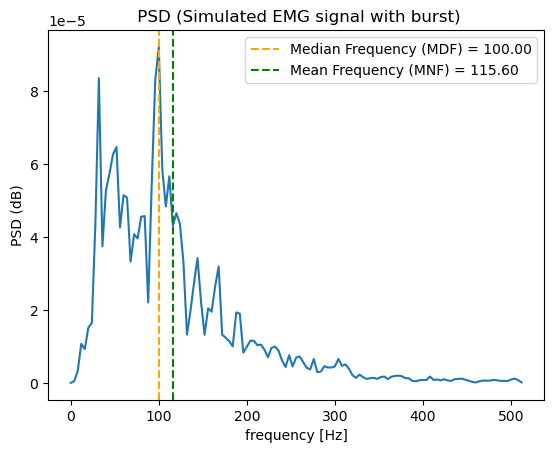

In [19]:
psd_welch, f_welch, MNF = superlet.compute_psd_welch(signal, fs, plot=True, muscle='Simulated EMG signal with burst')
#MNF_1 = [MNF]

We first apply regular wavelet transforms to the signal, with wavelets of 3, 16 and 33 cycles long, respectively. Note that we specifically use the complex Morlet wavelet for both the wavelet and superlet transforms.

In [20]:
MNF_1

[121.57978997586497]

In [21]:
def calculate_mae(estimates, true_value):
    errors = np.abs(np.array(estimates) - true_value)
    mae = np.mean(errors)
    std_error = np.std(np.array(estimates))
    return mae, std_error

In [22]:
freqs = np.linspace(20,500,512) # Número de puntos del vector frecuencia
freq_min = freqs[0]  # Minimum freq
freq_max = freqs[-1]  # Frecuencia máxima
num_freqs = len(freqs)  # Resolución del rango de frecuencias

## WAVELET PARAMETERS = 3, 16, 33, 55, 60, 115 cycles

In [23]:
importlib.reload(morlet)

<module 'superlets_package.morlet' from '/Users/neuralrehabilitationgroup/PycharmProjects/Superlets-Marina/superlets_package/morlet.py'>

In [24]:
importlib.reload(superlet)

<module 'superlets_package.superlets' from '/Users/neuralrehabilitationgroup/PycharmProjects/Superlets-Marina/superlets_package/superlets.py'>

In [25]:
plot_1 = True
plot_2 = False

In [26]:
offset = 0 # Para que la figura del instant mean frequency sea más mona
offset_burst = 0

In [27]:
#params_wavelet = [3, 16, 33, 55, 60, 115]
params_wavelet = [3, 16, 33, 55, 60]
#params_wavelet = [120, 160, 200, 240, 260, 300]

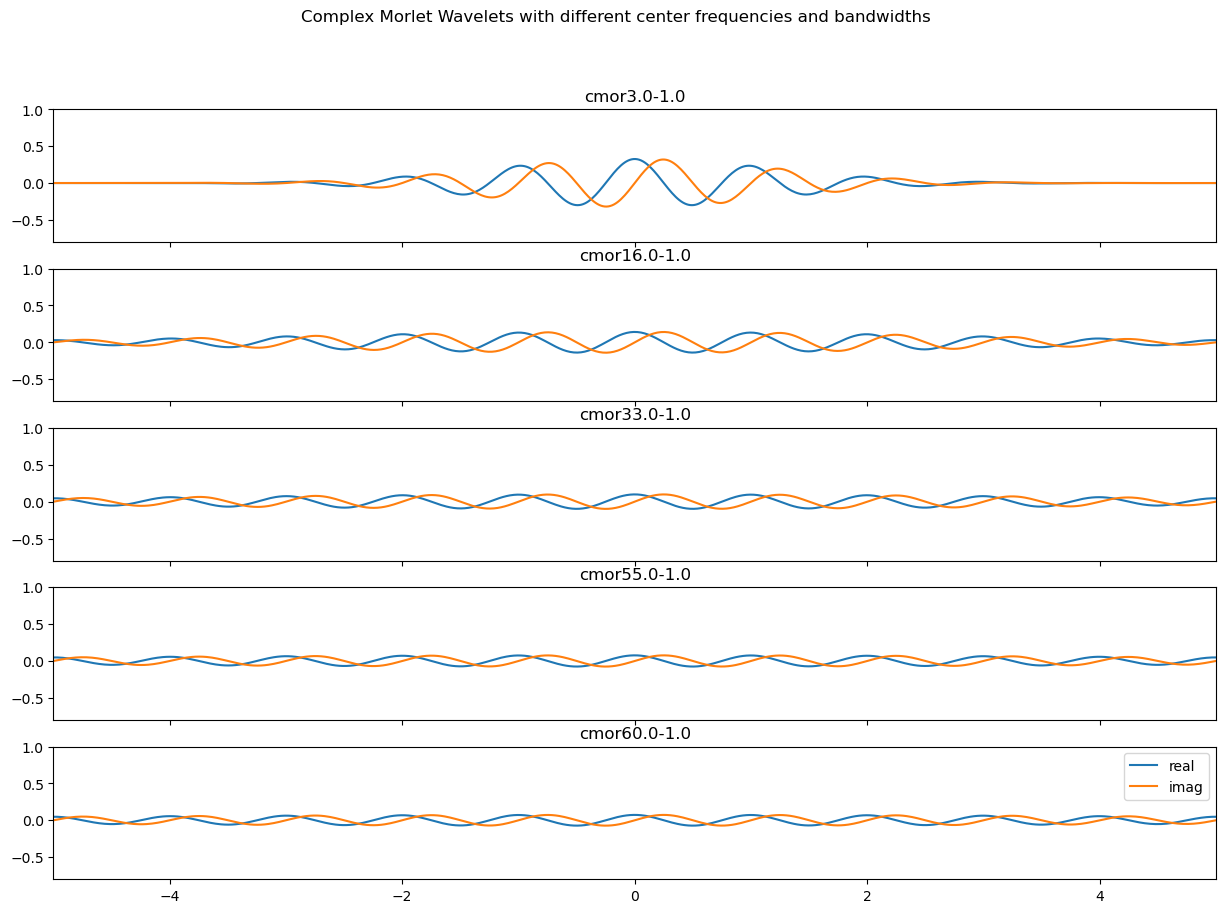

In [28]:
# plot complex morlet wavelets with different center frequencies and bandwidths
import pywt
#wavelets = [f"cmor{x:.1f}-{y:.1f}" for x, y in zip(params_wavelet,[0.5, 1.0, 1.5, 2.0, 2.5, 3.0])]
wavelets = [f"cmor{x:.1f}-{y:.1f}" for x, y in zip(params_wavelet,[1.0, 1.0, 1.0, 1.0, 1.0, 1.0])]
#wavelets = [f"gaus{x:}" for x in params_wavelet]
fig, axs = plt.subplots(len(params_wavelet), figsize=(15, 10), sharex=True, sharey=True)
for ax, wavelet in zip(axs.flatten(), wavelets):
    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    ax.plot(x, np.imag(psi), label="imag")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.8, 1])
ax.legend()
plt.suptitle("Complex Morlet Wavelets with different center frequencies and bandwidths")
plt.show()

In [29]:
MNF_1

[121.57978997586497]

116.49347
115.1476
115.2484
115.71675
115.82518


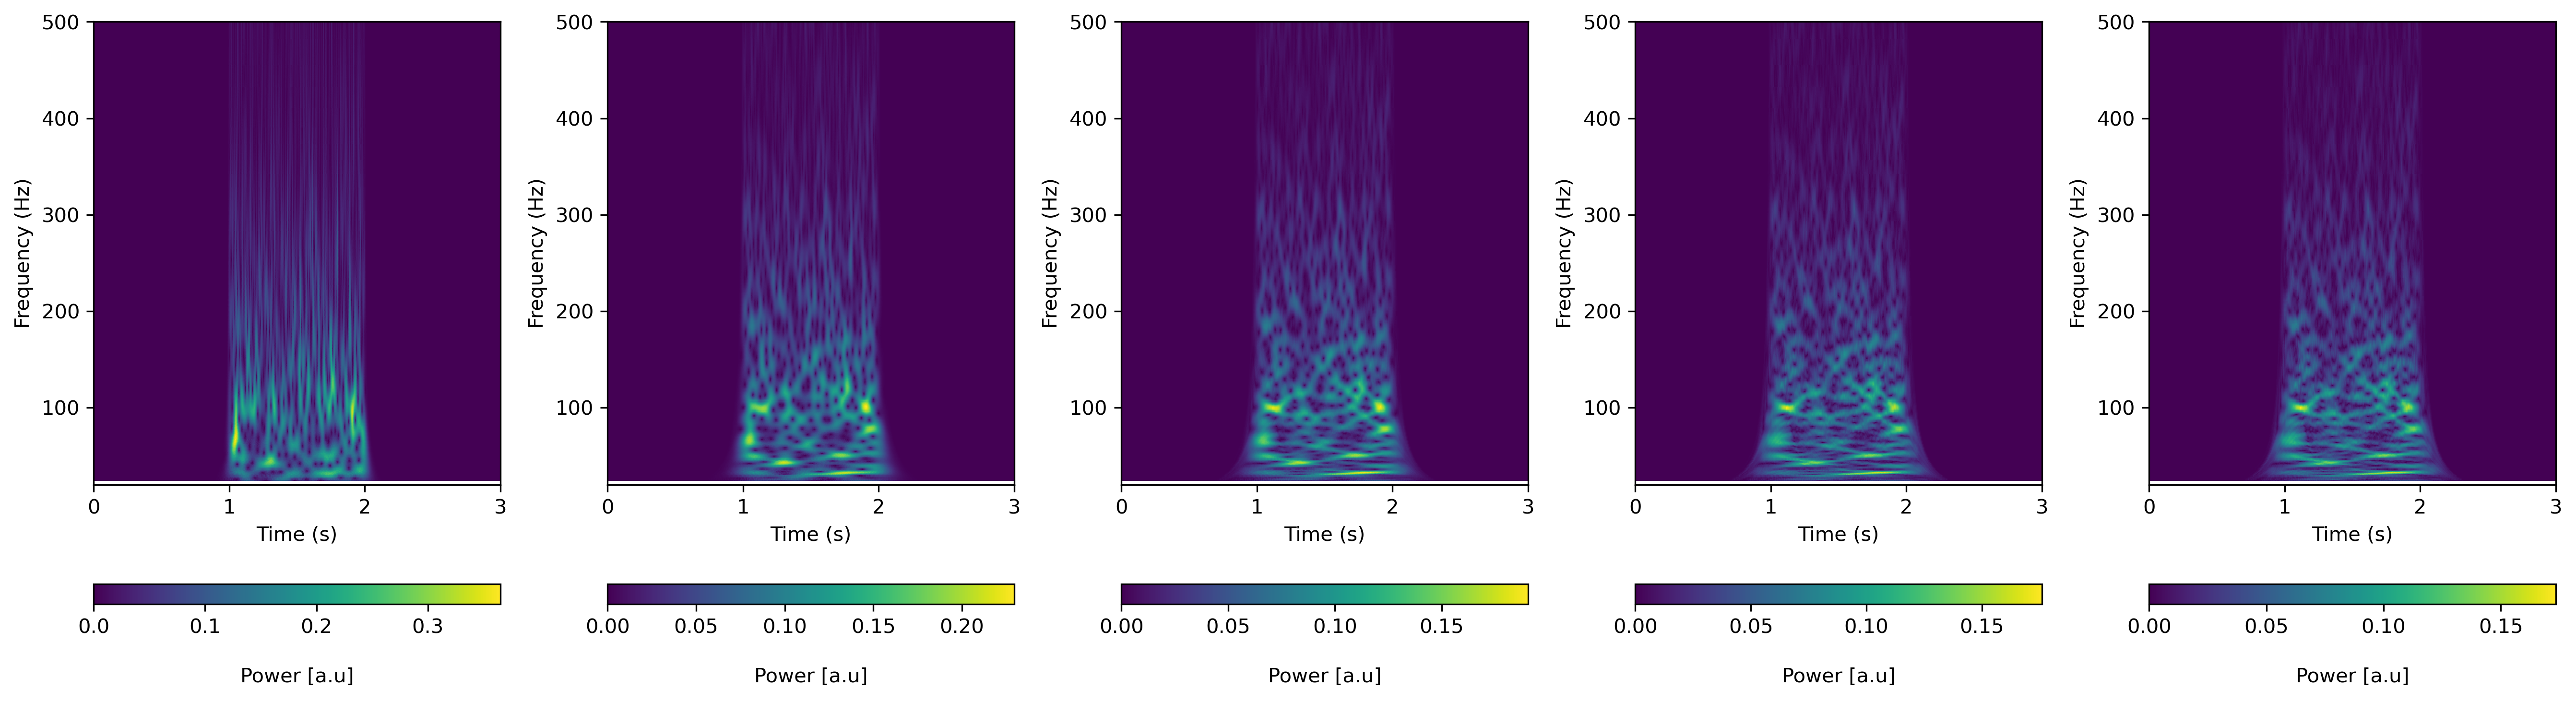

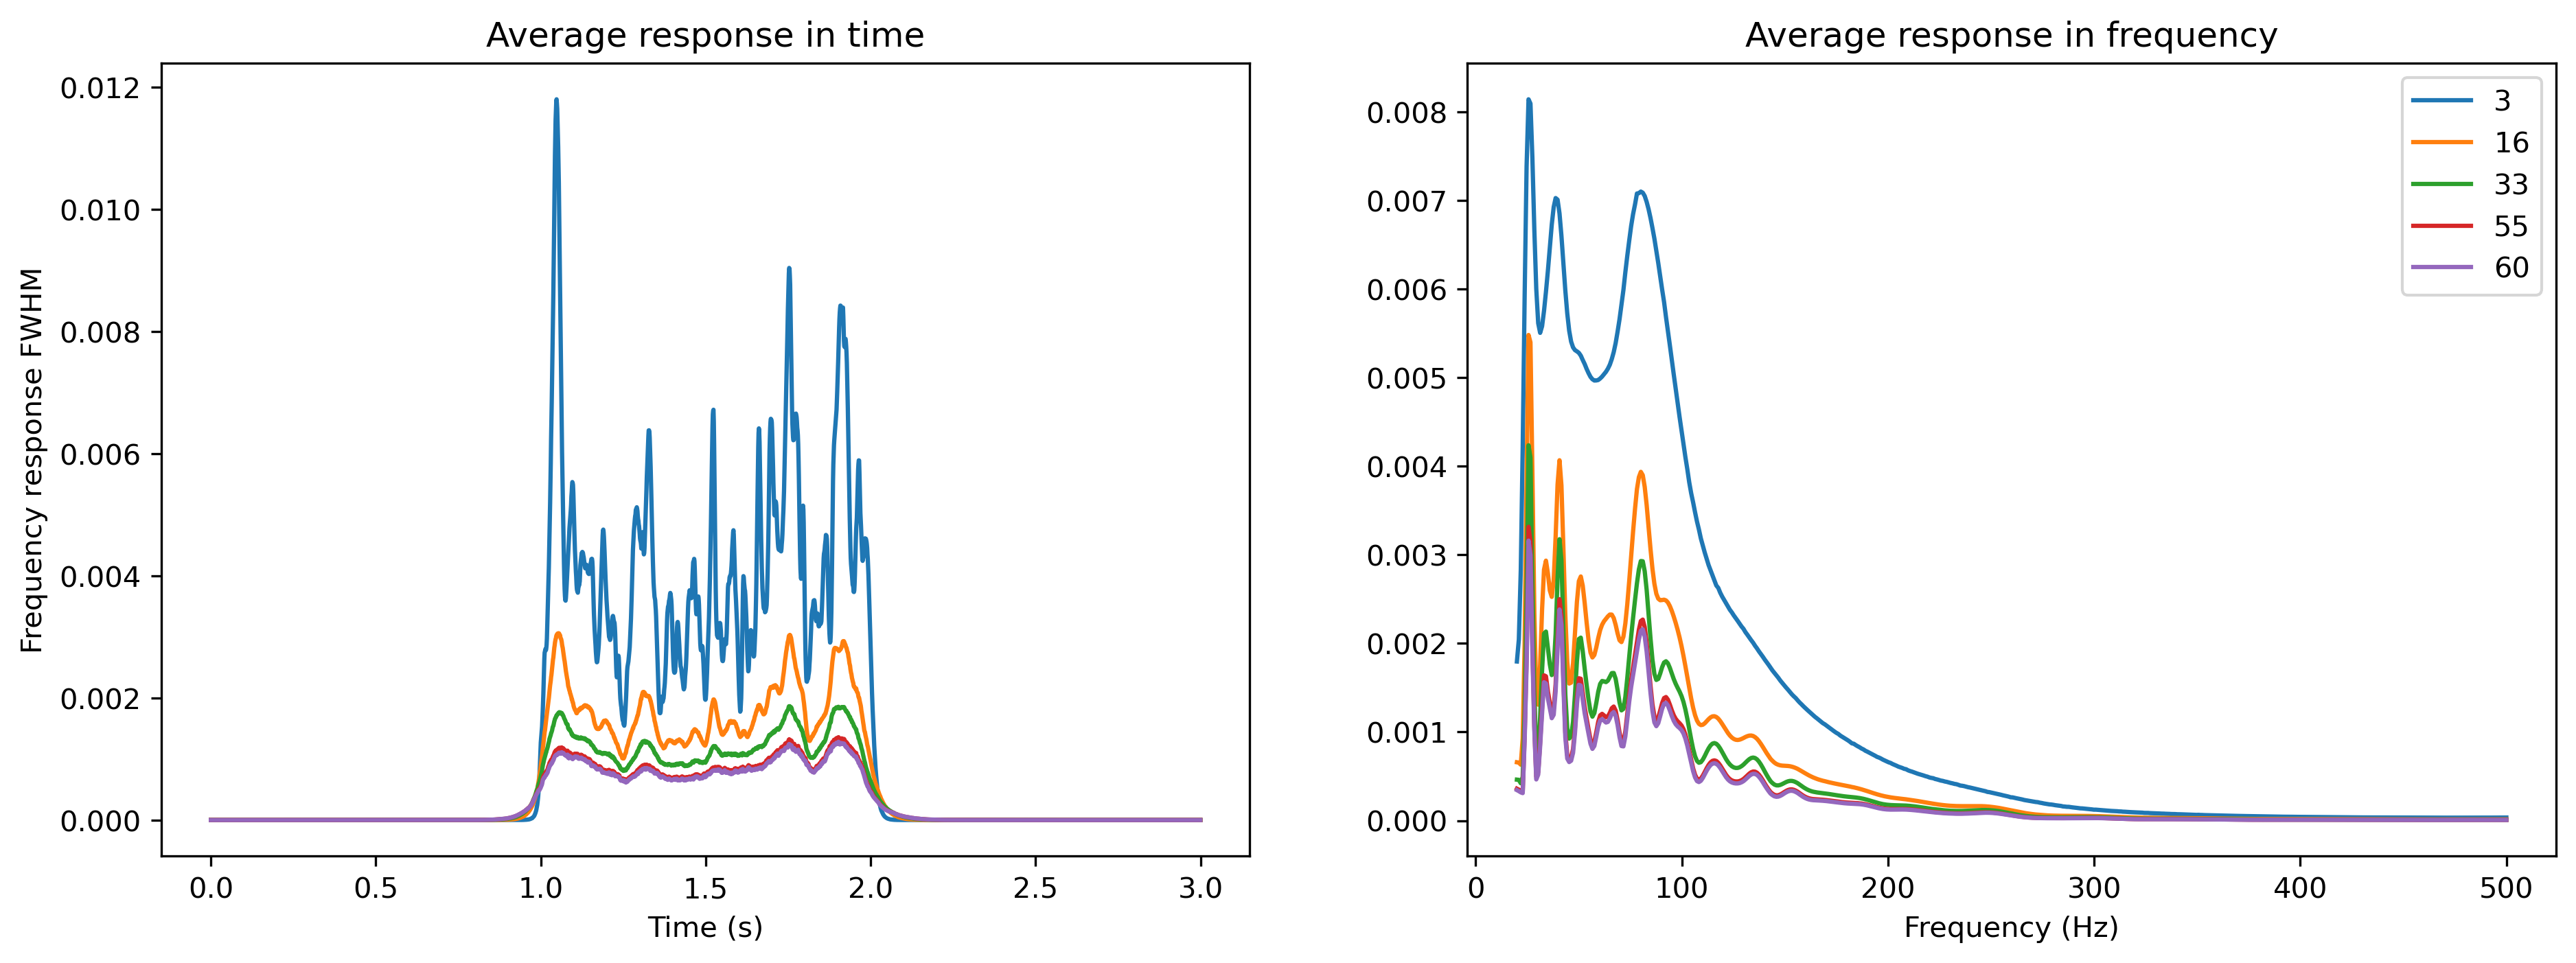

In [30]:
if plot_1:
    fig, ax = plt.subplots(ncols=len(params_wavelet), figsize=(18, 5), dpi=300)
if plot_2:
    # Definir límites de color para que sean iguales en todos los subplots
    fig_2, ax_2 = plt.subplots(ncols=len(params_wavelet), figsize=(18, 5), dpi=300)
    fig_3, ax_3 = plt.subplots(figsize=(10, 6))

dt = np.diff(t).mean()

# Cálculo de escalas
# scales_min = freqs / (freq_max * dt)
# scales_max = freqs / (freq_min * dt)
# scales = np.geomspace(scales_min.min(), scales_max.max(), num=100)

#scales = np.arange(1, fs / freq_min)

widths = np.arange(1, 10)

mae_wavelet = []
std_wavelet = []
times_wavelet = []

total_time = []
total_freq = []

total_scalogram_wavelet = []
res_wavelet = []



# Iterar sobre los parámetros de wavelet
for i, c in enumerate(params_wavelet):
    wavelet = f"cmor{c}-1.0"
    #wavelet = morlet(M=100, w=5.0)

    # Transformada wavelet continua
    #cwtmatr, freqs_1 = pywt.cwt(signal, sc, wavelet, sampling_period=1/fs)
    cwtmatr, f, physical_freqs = morlet.wavelet_transform_2(signal,wavelet,freqs,fs)

    cwtmatr = np.abs(cwtmatr[:, :])

    tiempo_wv = np.linspace(0,signal_duration,cwtmatr.shape[1])

    if plot_1:
        # im = ax[i].imshow(cwtmatr, aspect='auto', cmap="jet", interpolation="none", origin="lower", extent=[0, len(signal)/fs, freqs_1[-1], freqs_1[0]]) #, vmin=vmin, vmax=vmax)
        pcm = ax[i].pcolormesh(tiempo_wv, f, cwtmatr)
        #ax[i].set_yscale("log")
        ax[i].set_xlabel("Time (s)")
        ax[i].set_ylabel("Frequency (Hz)")
        ax[i].set_ylim(freqs[0], freqs[-1])

        cbar = fig.colorbar(pcm, ax=ax[i], orientation='horizontal')
        cbar.set_label('Power [a.u]', rotation=0, labelpad=15)  # Etiqueta de la colorbar
        plt.tight_layout()

    scalogram_2 = jnp.abs(cwtmatr)**2
    #scalogram_2 = np.abs(cwtmatr)

    # if np.any(np.isnan(jnp.abs(cwtmatr)**2)) or np.any(np.isinf(jnp.abs(cwtmatr)**2)):
    #     scalogram_2 = np.nan_to_num(jnp.abs(cwtmatr)**2)

    #Normalize scalogram
    #scalogram_2 = scalogram_2 / np.sum(scalogram_2, axis=0, keepdims=True)

    total_scalogram_wavelet.append(scalogram_2)
    instant_mean_freq_total = []

#     instant_freq = []
#     for col in range(scalogram_2.shape[1]):  # Recorre cada instante de tiempo
#         max_idx = np.argmax(scalogram_2[:, col])  # Índice del máximo en la columna
#         instant_freq.append(freqs_1[max_idx])  # Frecuencia correspondiente al máximo
#
#     # Convertir a array para análisis posterior
#     instant_freq = np.array(instant_freq)
#
#     start_idx = np.searchsorted(tiempo_wv, burst_start_1)  # Encuentra el índice de inicio
#     end_idx = np.searchsorted(tiempo_wv, burst_start_1 + burst_duration_1)  # Encuentra el índice final
#
#     instant_mean_freq_burst = instant_freq[start_idx:end_idx]
#     plt.figure()
#     plt.plot(instant_mean_freq_burst)
#
#     # Create time (each column is a time instant)
#     tiempo = np.arange(len(instant_freq)) / fs
#
#     if plot_2:
#         ax_2[i].plot(tiempo, instant_freq, label="Mean frequency (each window of " + str(len(freqs)) + ' samples)')
#
#         ax_2[i].set_xlabel("Time (s)")
#         ax_2[i].set_ylabel("Frequency (Hz)")
#         #ax_2[i].set_xlim(tiempo[0], tiempo[-1])
#         #plt.title("Medias de cada fila en función del tiempo")
#         ax_2[i].legend()
#         ax_2[i].grid(True)
#
#         ax_3.plot(tiempo, instant_freq, label=f"Mean frequency (Cycles: {c})")
#
#     print(np.mean(instant_mean_freq_burst))
#     mae, std = calculate_mae(np.mean(instant_mean_freq_burst), MNF_1)
#     mae_wavelet.append(mae)
#     std_wavelet.append(std)
#
#     time = np.arange(scalogram_2.shape[1]) / fs
#
#     total_time.append(time)
#     total_freq.append(freqs)
#
# # Configuración del gráfico
# if plot_2:
#     ax_3.set_xlabel("Time (s)")
#     ax_3.set_ylabel("Frequency (Hz)")
#     ax_3.legend()
#     ax_3.grid(True)
#     ax_3.set_title("Comparación de frecuencias medias instantáneas")
#
# #res_wavelet = superlet.compute_avg_response_resolution(total_scalogram_wavelet, total_time, total_freq, params_wavelet)

    instant_freq = np.sum(scalogram_2 * f[:, np.newaxis], axis=0) / np.sum(scalogram_2, axis=0)

    start_idx = np.searchsorted(tiempo_wv, burst_start_1)  # Encuentra el índice de inicio
    end_idx = np.searchsorted(tiempo_wv, burst_start_1 + burst_duration_1)  # Encuentra el índice final
#
    instant_mean_freq_burst = instant_freq[start_idx:end_idx]

    # Create time (each column is a time instant)
    tiempo = np.arange(len(instant_freq)) / fs

    if plot_2:
        ax_2[i].plot(tiempo, instant_freq)

        ax_2[i].set_xlabel("Time (s)")
        ax_2[i].set_ylabel("Frequency (Hz)")
        #ax_2[i].set_xlim(tiempo[0], tiempo[-1])
        #plt.title("Medias de cada fila en función del tiempo")
        ax_2[i].grid(True)

        ax_3.plot(tiempo, instant_freq, label=f"Mean frequency (Cycles: {c})")
        plt.tight_layout()

    print(np.mean(instant_mean_freq_burst))
    mae, std = calculate_mae(instant_mean_freq_burst, MNF_1)
    mae_wavelet.append(mae)
    std_wavelet.append(std)

    time = np.arange(scalogram_2.shape[1]) / fs

    total_time.append(time)
    total_freq.append(freqs)

# Configuración del gráfico
if plot_2:
    ax_3.set_xlabel("Time (s)")
    ax_3.set_ylabel("Frequency (Hz)")
    ax_3.legend()
    ax_3.grid(True)
    ax_3.set_title("Comparación de frecuencias medias instantáneas")

res_wavelet = superlet.compute_avg_response_resolution(total_scalogram_wavelet, total_time, total_freq, params_wavelet)

In [31]:
mae_wavelet

[16.466571543655128,
 11.872369591992316,
 10.102975570972653,
 8.989216191594675,
 8.819056597280373]

### Wavelet visualization

In [32]:
# import matplotlib.pyplot as plt
# 
# # Supongamos que la frecuencia central de cada wavelet varía en un rango de frecuencias
# frequencies = jnp.linspace(1, 50, 141)  # Por ejemplo, de 1 a 50 Hz con 141 frecuencias
# 
# # Define un vector de tiempo
# t = jnp.linspace(-1, 1, 2048)  # Tiempo con 2048 puntos
# 
# # Grafica la wavelet para una frecuencia específica (por ejemplo, la frecuencia central de 20 Hz)
# freq_idx = 70  # Índice de frecuencia alrededor de la mitad del rango
# plt.plot(t, jnp.real(wv[freq_idx]), label=f'Wavelet en {frequencies[freq_idx]:.2f} Hz')
# plt.xlabel("Tiempo (s)")
# plt.ylabel("Amplitud")
# plt.title("Parte Real de la Wavelet Morlet a una Frecuencia Específica")
# plt.xlim(-1.3, 1.3)
# plt.legend()
# plt.show()



In [33]:
# plt.imshow(jnp.abs(wv), aspect='auto', extent=[-1, 1, frequencies[-1], frequencies[0]], cmap='viridis')
# plt.colorbar(label="Amplitud")
# plt.xlabel("Tiempo (s)")
# plt.ylabel("Frecuencia (Hz)")
# plt.title("Representación Tiempo-Frecuencia de la Wavelet")
# plt.show()


There's a tradeoff above; using a low number of cycles results in high temporal resolution, but poor frequency resolution (the activations are "smeared" on the frequency dimension). On the other hand, a high number of cycles results in high frequency resolution, but poor temporal resolution. 

There are fundamental limits to how precise we can be on *both* aspects without making a tradeoff on either (the Gabor limit), but the standard wavelet transform isn't on that optimal boundary. Superlets improve resolution on both (time *and* frequency) by taking the geometric mean of wavelet transforms of different cycle lengths, more tightly approaching the Gabor limit.

## PARÁMETROS SUPERLET: base_cycle, min_order, max_order = [3, 5, 1, 1, 1, 1], [1, 1, 5, 10, 20, 30], [30, 30, 40, 100, 100, 200]

In [34]:
importlib.reload(superlet)

<module 'superlets_package.superlets' from '/Users/neuralrehabilitationgroup/PycharmProjects/Superlets-Marina/superlets_package/superlets.py'>

142.25838384230394
141.9489983651578
127.22805204763463
122.34603535962852
119.85873145270904


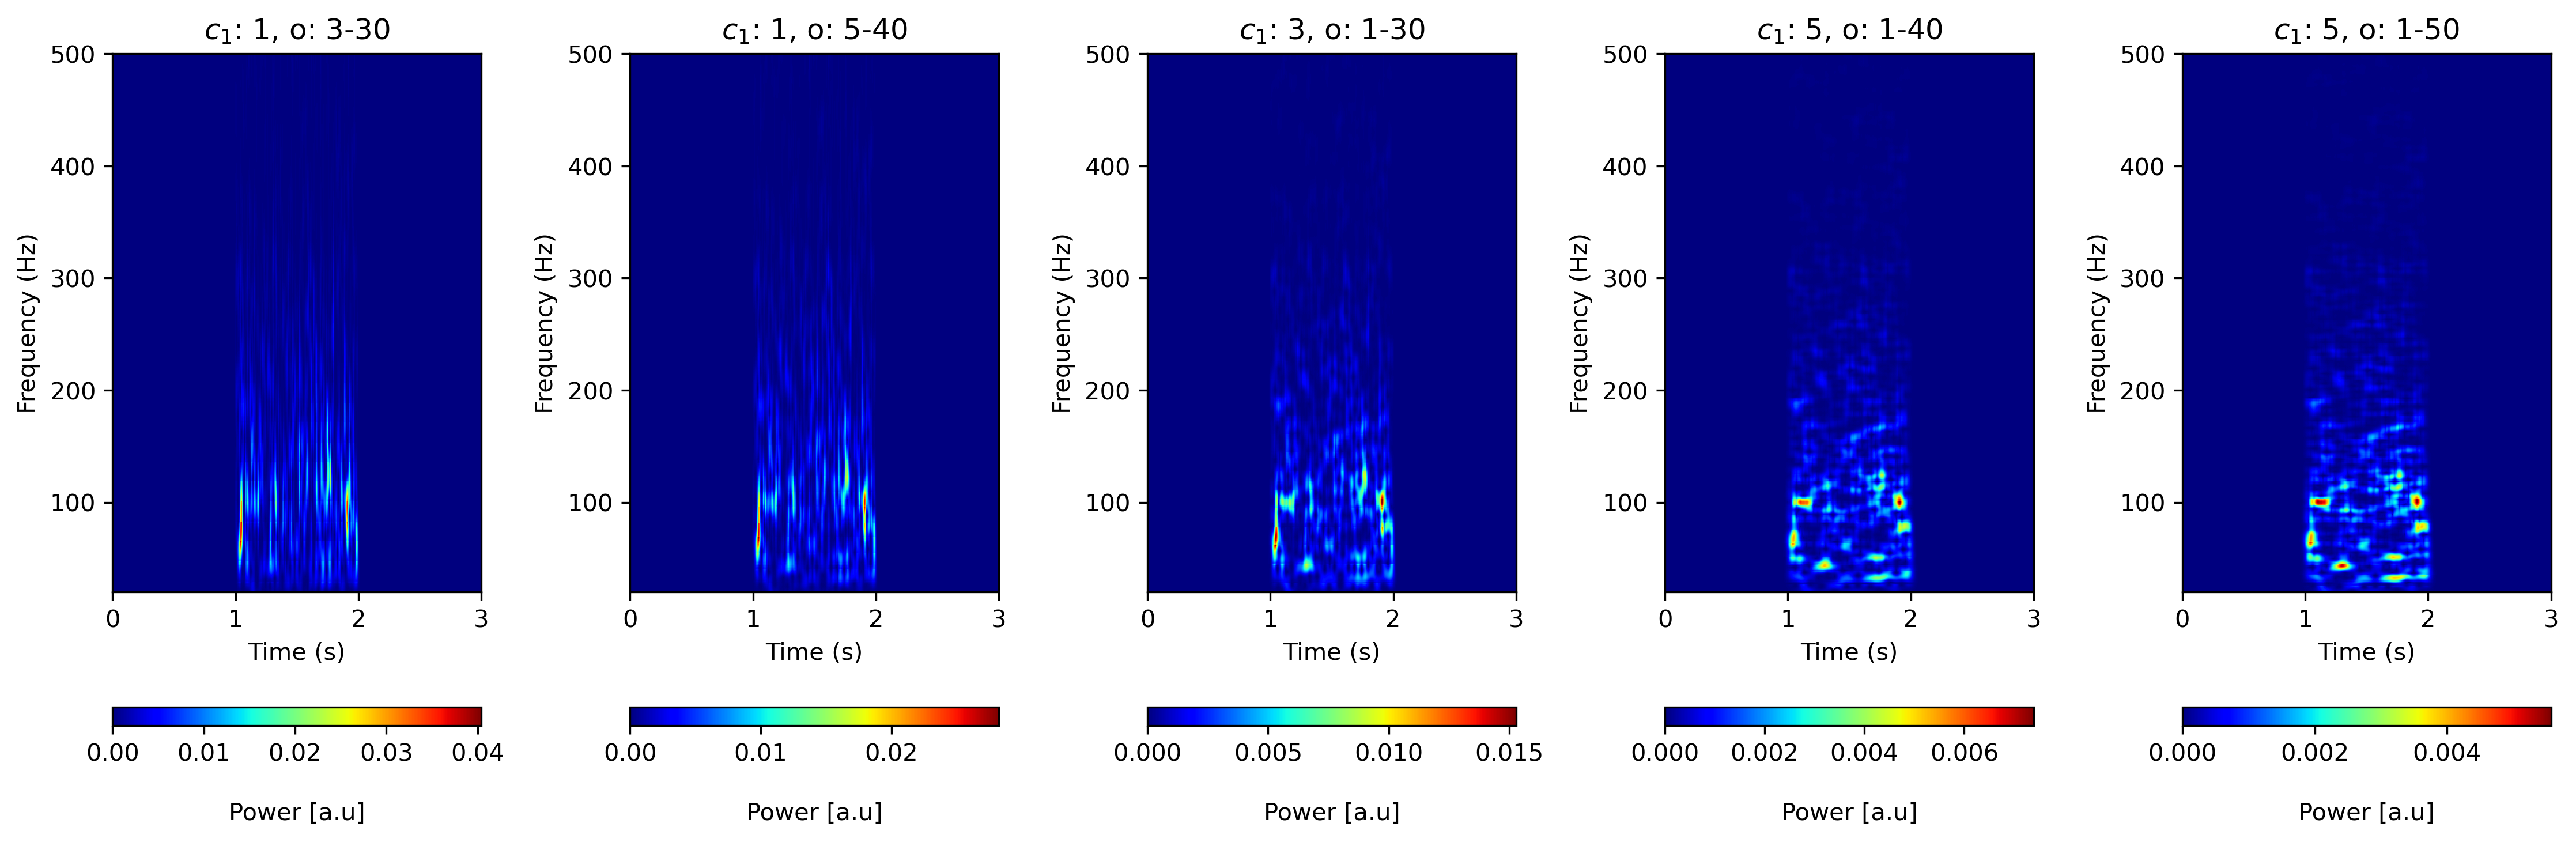

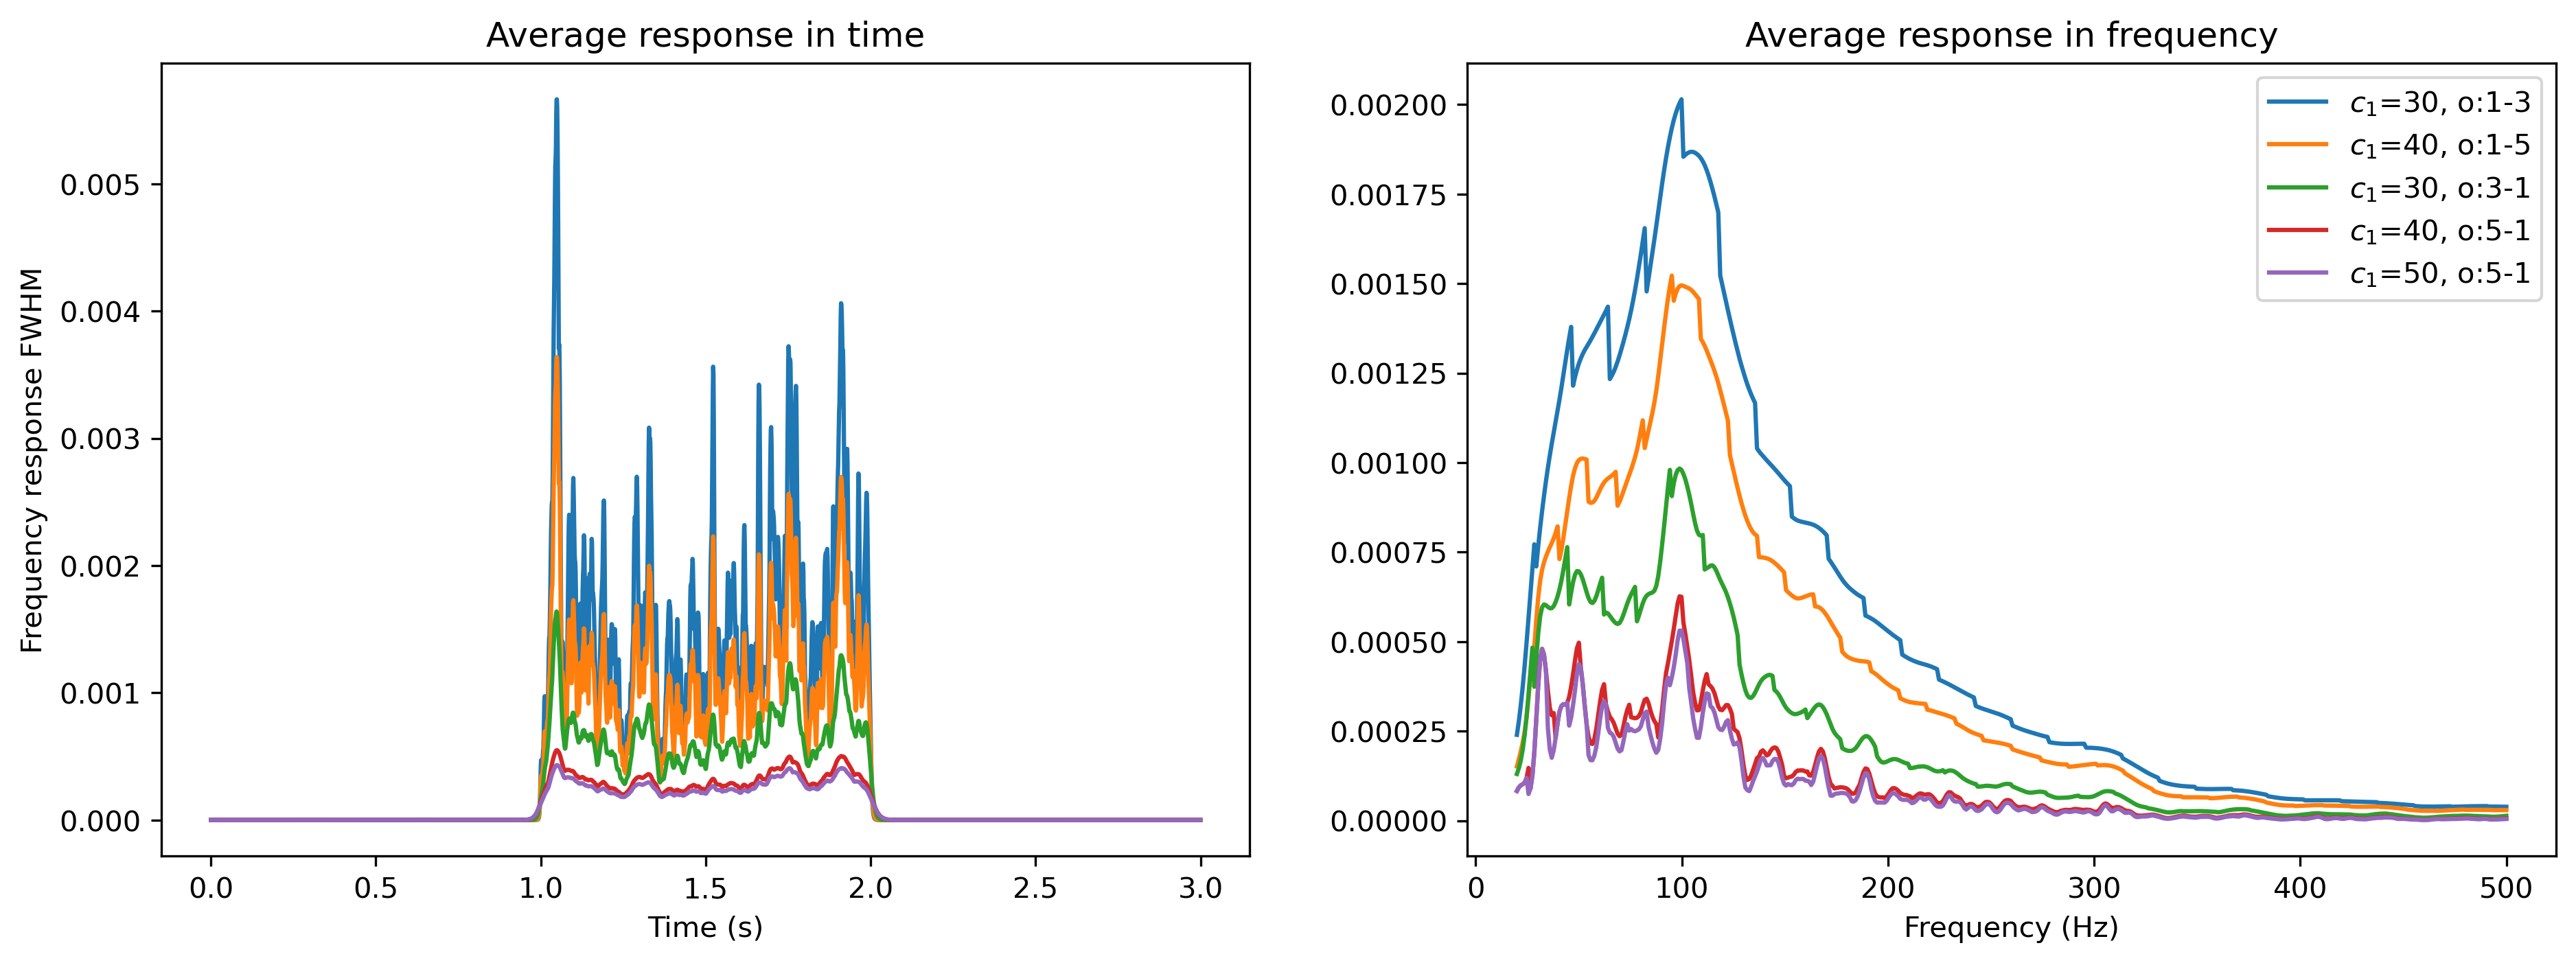

In [35]:
#params_superlet = [[3, 5, 1, 1, 1, 1], [1, 1, 5, 10, 20, 30], [30, 30, 40, 100, 100, 200]]
#params_superlet = [[3, 5, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [10, 10, 20, 50, 60, 70]]
#params_superlet = [[1, 3, 5, 1], [3, 1, 1, 5], [30, 30, 40, 40]]
params_superlet = [[1, 1, 3, 5, 5], [3, 5, 1, 1, 1], [30, 40, 30, 40, 50]]

#params_superlet = [[3, 5, 1, 1, 1, 1], [10, 10, 20, 30, 30, 40], [30, 30, 40, 100, 100, 200]]


#params_superlet = [[3,5,1],[1,1,5],[30,30,40]]

if plot_1:
    fig, ax = plt.subplots(ncols=len(params_superlet[0]), figsize=(15, 5), dpi=300)

if plot_2:
    fig_2, ax_2 = plt.subplots(ncols=len(params_superlet[0]), figsize=(15, 5), dpi=300)
    fig_3, ax_3 = plt.subplots(figsize=(10, 6))

mae_superlet = []
std_superlet = []

times_superlet = []

total_time = []
total_freq = []

total_scalogram_superlet = []

#enumerate(zip([3,5,1], [1,1,5], [30,30,40])):
#enumerate(zip([1,1,1], [10,20,30], [100,100,200])):
for (i, (base_cycle, min_order, max_order)) in enumerate(zip(*params_superlet)):

    wv, scalogram = superlet.adaptive_superlet_transform(signal, freqs, sampling_freq=fs,
                                                         base_cycle=base_cycle, min_order=min_order,
                                                         max_order=max_order, mode="mul")

    if plot_1:
        im = ax[i].imshow(jnp.abs(scalogram) ** 2, aspect='auto', cmap="jet", interpolation="none", origin="lower",extent=[0, len(signal) / fs, freqs[0], freqs[-1]])
        ax[i].set_title(f"$c_1$: {base_cycle}, o: {min_order}-{max_order}")
        ax[i].set_xlabel("Time (s)")
        ax[i].set_ylabel("Frequency (Hz)")

        cbar = fig.colorbar(im, ax=ax[i], orientation='horizontal')
        cbar.set_label('Power [a.u]', rotation=0, labelpad=15)  # Etiqueta de la colorbar
        plt.tight_layout()

    scalogram_2 = np.abs(scalogram) ** 2

    if np.any(np.isnan(jnp.abs(scalogram) ** 2)) or np.any(np.isinf(jnp.abs(scalogram) ** 2)):
        scalogram_2 = np.nan_to_num(jnp.abs(scalogram) ** 2)

    total_scalogram_superlet.append(scalogram_2)
    #scalogram_2 = scalogram_2 * freqs[:, np.newaxis]

    # Compute MAE in frequency
    instant_mean_freq_total = []

    instant_mean_freq = np.sum(scalogram_2 * freqs[:, np.newaxis], axis=0) / np.sum(scalogram_2, axis=0)

    initial_imnf = instant_mean_freq[:round(burst_start_1 * fs) - offset]
    instant_mean_freq_total.extend(initial_imnf)
    # plt.figure()
    # plt.plot(initial_imnf)

    instant_mean_freq_burst = instant_mean_freq[
                              round(burst_start_1 * fs):round((burst_start_1 + burst_duration_1) * fs)]
    instant_mean_freq_burst = instant_mean_freq_burst[offset_burst:round(len(instant_mean_freq_burst)) - offset_burst]
    instant_mean_freq_total.extend(instant_mean_freq_burst)

    final_imnf = instant_mean_freq[round((burst_start_1 + burst_duration_1) * fs) + offset:]
    instant_mean_freq_total.extend(final_imnf)
    # plt.figure()
    # plt.plot(final_imnf)
    # plt.figure()
    # plt.plot(instant_mean_freq_total)

    # Create time (each column is a time instant)
    tiempo = np.arange(len(instant_mean_freq_total)) / fs

    if plot_2:
        ax_2[i].plot(tiempo, instant_mean_freq_total,
                     label="Mean frequency (each window of " + str(len(freqs)) + ' samples)')

        ax_2[i].set_xlabel("Time (s)")
        ax_2[i].set_ylabel("Frequency (Hz)")
        #ax_2[i].set_xlim(tiempo[0], tiempo[-1])
        #plt.title("Medias de cada fila en función del tiempo")
        ax_2[i].legend()
        ax_2[i].grid(True)

        ax_3.plot(tiempo, instant_mean_freq_total, label=f"Mean frequency (Cycles: {base_cycle})")

    print(np.mean(instant_mean_freq_burst))
    mae, std = calculate_mae(instant_mean_freq_burst, MNF_1)
    mae_superlet.append(mae)
    std_superlet.append(std)

    # Compute MAE in time
    # freq_tolerance = 10
    # time_support = (instant_mean_freq_total >= MNF_1[0] - freq_tolerance) & (instant_mean_freq_total <= MNF_1[0] + freq_tolerance)
    # detected_times = tiempo[time_support]
    # detected_start = detected_times[0] if len(detected_times) > 0 else None
    # detected_end = detected_times[-1] if len(detected_times) > 0 else None
    #
    # if detected_start is not None and detected_end is not None:
    #     errors = [abs(burst_start_1 - detected_start), abs((burst_start_1 + burst_duration_1) - detected_end)]
    #     # Calcular MAE
    #     mae_time = np.mean(errors)
    #     # Calcular STD
    #     std_time = np.std(errors)
    # else:
    #     mae_time = float('nan')  # No se detectó el burst correctamente
    #     std_time = float('nan')
    #
    # mae_superlet_t.append(mae_time)
    # std_superlet_t.append(std_time)


    time = np.arange(scalogram_2.shape[1]) / fs

    total_time.append(time)
    total_freq.append(freqs)

if plot_2:
    ax_3.set_xlabel("Time (s)")
    ax_3.set_ylabel("Frequency (Hz)")
    ax_3.legend()
    ax_3.grid(True)
    ax_3.set_title("Comparación de frecuencias medias instantáneas")

res_superlet = superlet.compute_avg_response_resolution(total_scalogram_superlet, total_time, total_freq, [f'$c_1$={c3}, o:{c1}-{c2}' for c1, c2, c3 in zip(*params_superlet)])

In [36]:
mae_superlet

[26.388756565223574,
 24.476662201610313,
 13.723851177836906,
 9.693462599218202,
 9.337450353410073]

## STFT PARAMETERS (window = duration/cycles) = 38, 200, 413, 550, 600, 824 ms

In [37]:
importlib.reload(superlet)

<module 'superlets_package.superlets' from '/Users/neuralrehabilitationgroup/PycharmProjects/Superlets-Marina/superlets_package/superlets.py'>

In [38]:
offset_burst = 0
offset = 0

/var/folders/63/2lz089h509ddd045_5prskfm0000gn/T/ipykernel_8389/1399002591.py:77: RuntimeWarning: invalid value encountered in divide
  instant_mean_freq = np.sum(scalogram_2 * f[:, np.newaxis], axis=0) / np.sum(scalogram_2, axis=0)


122.81932707964884
117.25840650900099
116.68693764396144
116.5354790382053
116.5053416279252


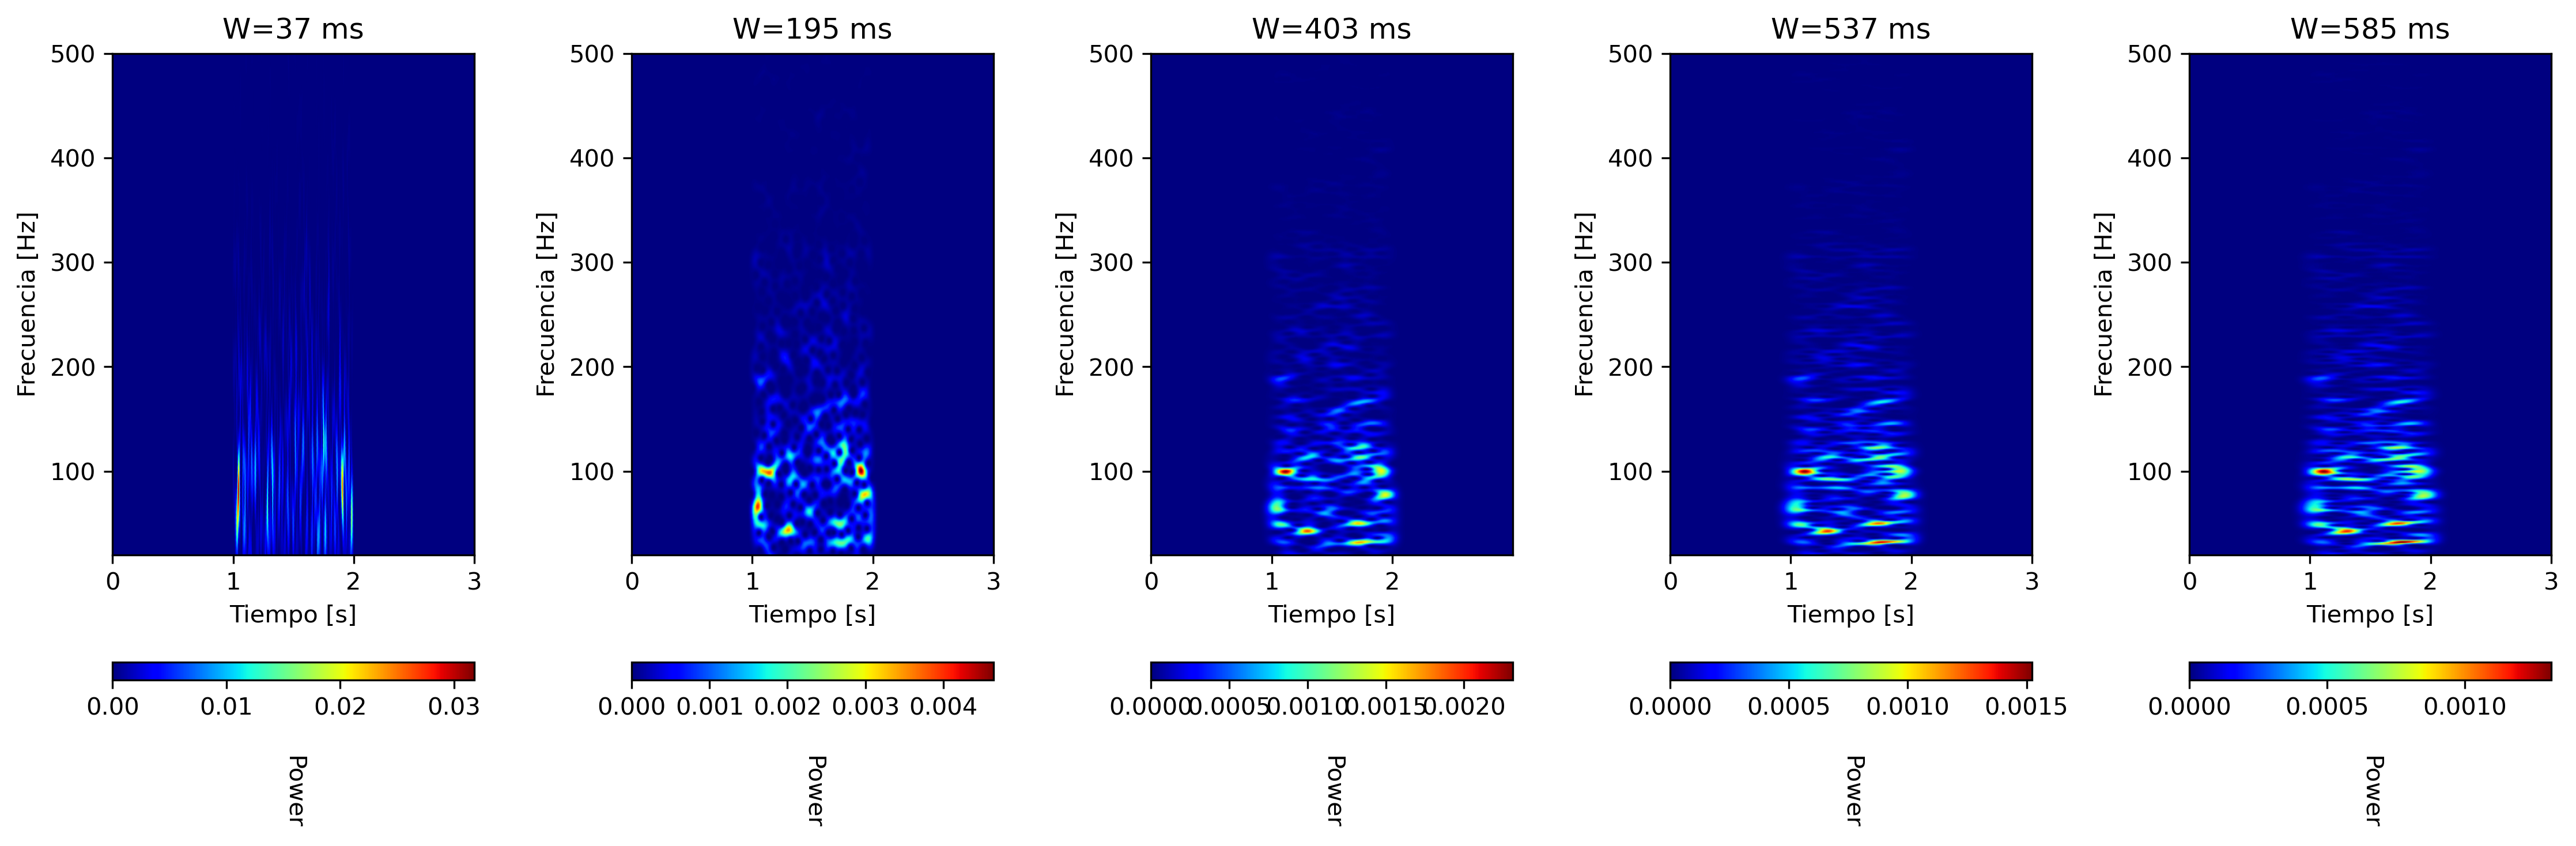

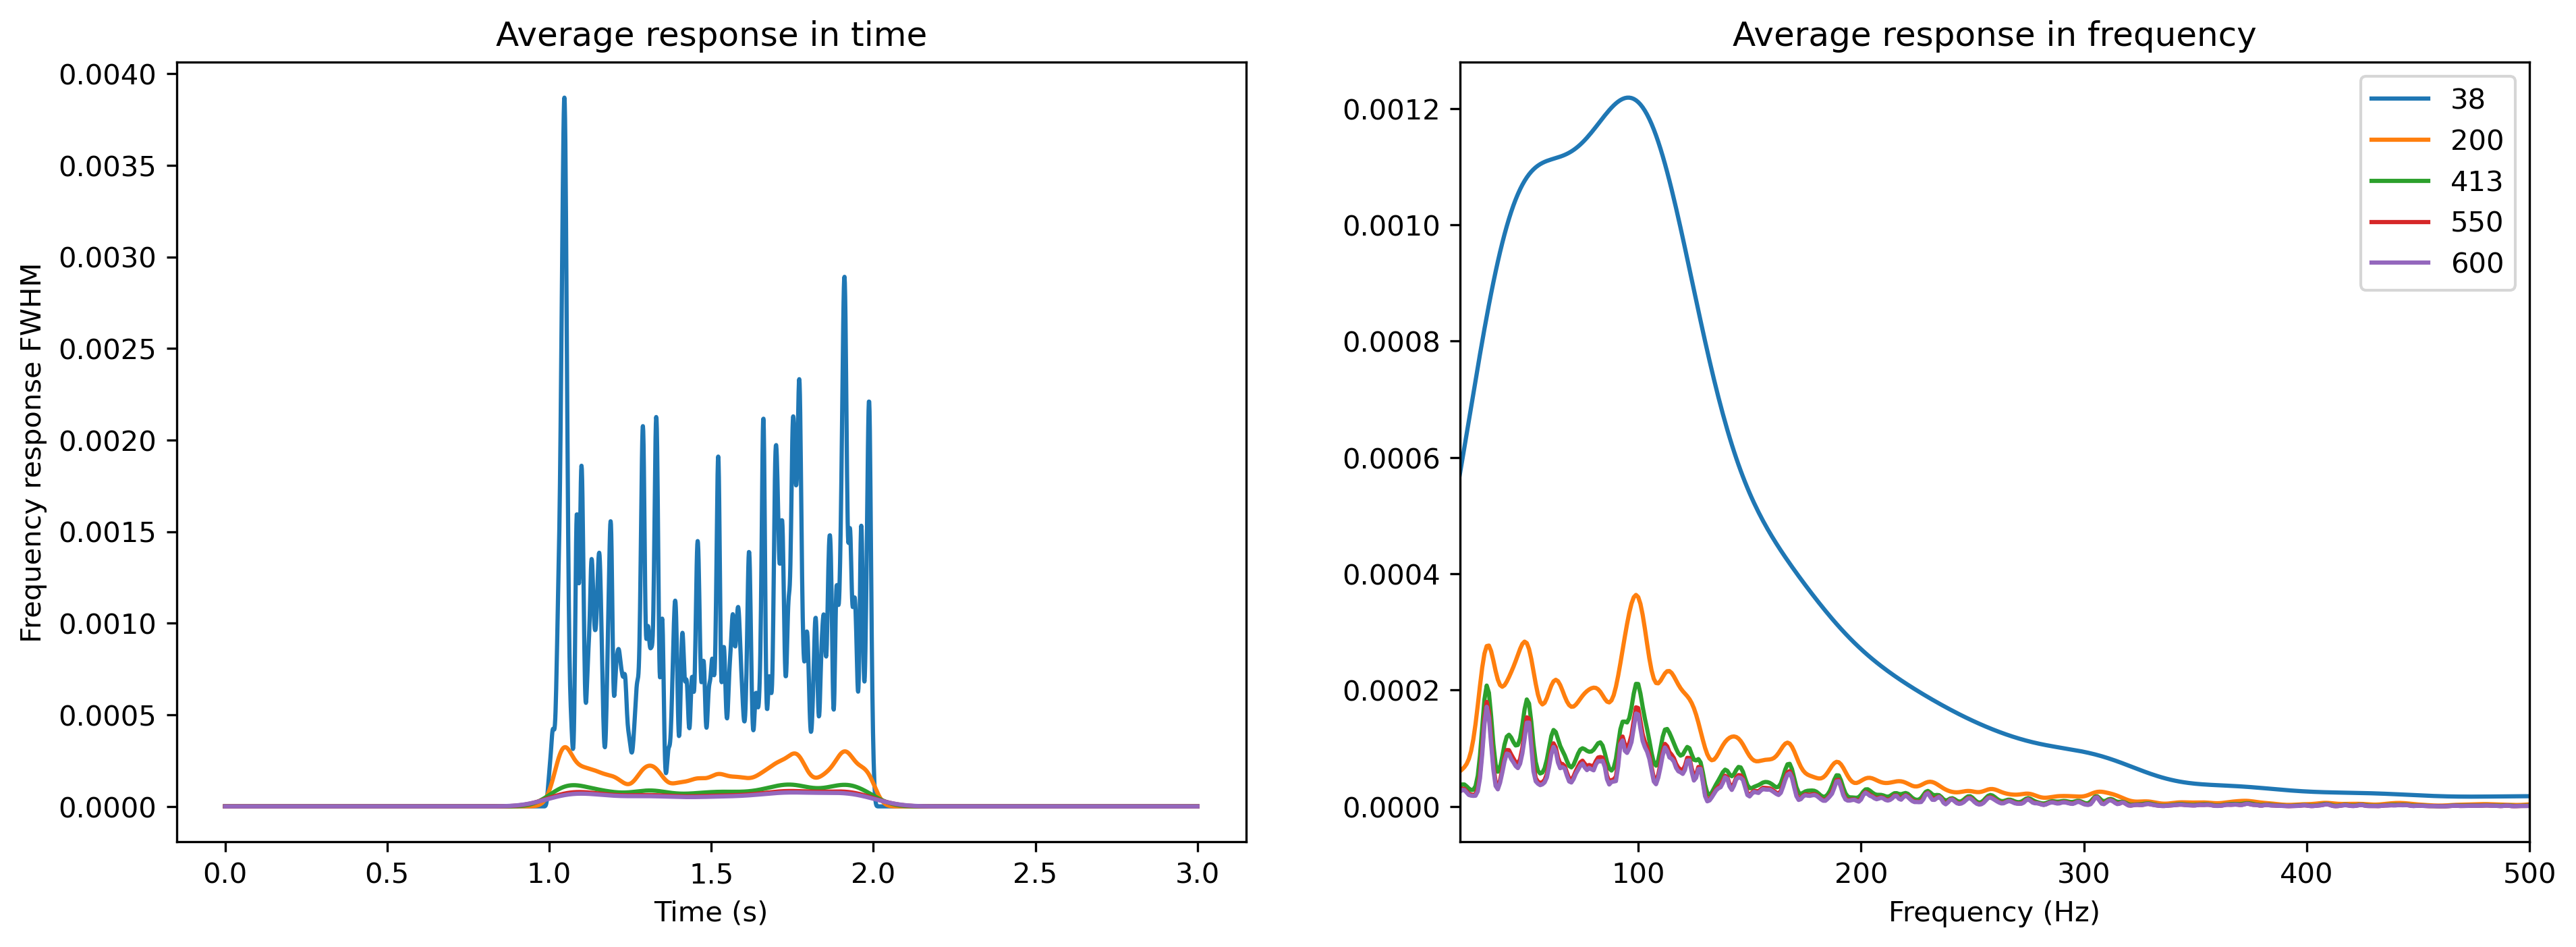

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.signal import windows

# Parámetros de la STFT con ventanas de 38 ms, 200 ms, y 413 ms (convertido a muestras)
# [38, 200, 413, 550, 600, 824]
#windows_ms = [38, 200, 413, 550, 600, 824]
windows_ms = [38, 200, 413, 550, 600]
#windows_samples = [int((w / 1000) * fs) for w in windows_ms]  # Convertir a muestras

if plot_1:
    fig, ax = plt.subplots(ncols=len(windows_ms), figsize=(15, 5), dpi=300)

if plot_2:
    fig_2, ax_2 = plt.subplots(ncols=len(windows_ms), figsize=(15, 5), dpi=300)
    fig_3, ax_3 = plt.subplots(figsize=(10, 6))

mae_stft = []
std_stft = []
times_stft = []

total_time = []
total_freq = []

res_stft = []
total_scalogram_stft = []

for i, w in enumerate(windows_ms):
    import time
    # Calcular la ventana Blackman
    start_time = time.time()
    window = windows.blackman(w)
    
    # Hacer que la f de la stft tenga el mismo tamaño que las demás
    nfft = 2 * (len(freqs))
    # Dimensión de la frecuencia = nfft/2 + 1
    # Dimesión del tiempo = [(N - noverlap)/(nperseg-noverlap)] + 1 = 
    
    # Realizar la STFT con la ventana Blackman y superposición del 50%
    #f, t, Zxx = stft(signal, fs, window=window, nfft=nfft, nperseg=w, noverlap=w//2, padded=True, scaling='psd')
    f, t, Zxx = stft(signal, fs=fs, window='blackman', nperseg=w, noverlap=w-1, nfft=nfft, detrend=False, return_onesided=True, boundary='zeros', padded=True, axis=-1, scaling='spectrum')
    
    # ax[i].pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='jet')
    
    # Calcular la representación de potencia (magnitud al cuadrado)
    Zxx_power = np.abs(Zxx) ** 2
    
    # Graficar la representación de potencia
    #plt.figure(figsize=(10, 6))
    
    end_time = time.time()
    times_stft.append(end_time - start_time)
    
    if plot_1:
        pcm = ax[i].pcolormesh(t,f, Zxx_power, shading='gouraud', cmap='jet')
        
        ax[i].set_title(f'W={w * 1000 // fs} ms')
        ax[i].set_ylabel('Frecuencia [Hz]')
        ax[i].set_xlabel('Tiempo [s]')
        
        cbar = fig.colorbar(pcm, ax=ax[i], orientation='horizontal')
        cbar.set_label('Power', rotation=270, labelpad=15)  # Etiqueta de la colorbar
    
        #fig.colorbar(pcm, ax=ax[i], label='Potencia')
        ax[i].set_ylim(freqs[0], freqs[-1])  # Ajustar el rango de frecuencias si es necesario
        plt.tight_layout()
    
    scalogram_2 = Zxx_power
    
    #if np.any(np.isnan(jnp.abs(Zxx)**2)) or np.any(np.isinf(jnp.abs(Zxx)**2)):
    #scalogram_2 = jnp.nan_to_num(jnp.abs(Zxx)**2, nan=0.0, posinf=0.0, neginf=0.0)
        
    total_scalogram_stft.append(scalogram_2)
 
    instant_mean_freq_total = []   
    instant_mean_freq = np.sum(scalogram_2 * f[:, np.newaxis], axis=0) / np.sum(scalogram_2, axis=0)    
    
    #mean_instant_freq = np.where(freqs,np.max(scalogram_2, axis=0))
    # mean_instant = np.mean(np.where(freqs,max(scalogram_2)))
    # plt.figure()
    # plt.plot(mean_instant)
    
    start_index = np.argmin(np.abs(t - burst_start_1))
    end_index_burst = np.argmin(np.abs(t - (burst_start_1 + burst_duration_1)))
    
    # Segmento inicial antes del burst
    initial_imnf = instant_mean_freq[:max(0, start_index - offset)]  # Asegurar que no haya índices negativos
    instant_mean_freq_total.extend(initial_imnf)
    # plt.figure()
    # plt.plot(initial_imnf)
    
    # Segmento durante el burst
    instant_mean_freq_burst = instant_mean_freq[start_index:end_index_burst]
    instant_mean_freq_burst = instant_mean_freq_burst[offset_burst:len(instant_mean_freq_burst)-offset_burst]  # Aplicar offset dentro del burst
    instant_mean_freq_total.extend(instant_mean_freq_burst)
    # plt.figure()
    # plt.plot(instant_mean_freq_burst)
    
    # Segmento final después del burst
    final_start_index = end_index_burst + offset
    final_imnf = instant_mean_freq[final_start_index:]
    instant_mean_freq_total.extend(final_imnf)
  
    # initial_imnf = instant_mean_freq[:np.where(t >= burst_start_1)[0][0]-offset]
    # instant_mean_freq_total.extend(initial_imnf)
    # # plt.figure()
    # # plt.plot(initial_imnf)
    # 
    # print(t >= (burst_start_1 + burst_duration_1))
    # instant_mean_freq_burst = instant_mean_freq[np.where(t >= burst_start_1)[0][0]:np.where(t >= (burst_start_1 + burst_duration_1))[0][0]]
    # instant_mean_freq_burst = instant_mean_freq_burst[offset_burst:len(instant_mean_freq_burst)-offset_burst]
    # instant_mean_freq_total.extend(instant_mean_freq_burst)
    # # plt.figure()
    # # plt.plot(instant_mean_freq_burst)
    #  
    # final_imnf = instant_mean_freq[np.where(t >= burst_start_1 + burst_duration_1)[0][0] + offset:]
    # instant_mean_freq_total.extend(final_imnf)
    # plt.figure()
    # plt.plot(final_imnf)

    # Create time (each column is a time instant)
    tiempo = np.linspace(t[0], t[-1], len(instant_mean_freq_total))
    
    if plot_2:
        ax_2[i].plot(tiempo, instant_mean_freq_total, label="Mean frequency (each window of " + str(len(freqs)) + ' samples)')
        
        ax_2[i].set_xlabel("Time (s)")
        ax_2[i].set_ylabel("Frequency (Hz)")
        #ax_2[i].set_xlim(tiempo[0], tiempo[-1])
        #plt.title("Medias de cada fila en función del tiempo")
        ax_2[i].legend()
        ax_2[i].grid(True)
        
        ax_3.plot(tiempo, instant_mean_freq_total, label=f"Mean frequency (Cycles: {w})")
    
    print(np.mean(instant_mean_freq_burst))
    mae, std = calculate_mae(instant_mean_freq_burst, MNF_1)
    mae_stft.append(mae)
    std_stft.append(std)
    
    total_time.append(np.linspace(t[0], t[-1], scalogram_2.shape[1]))
    total_freq.append(np.linspace(f[0], f[-1], scalogram_2.shape[0]))

# Configuración del gráfico
if plot_2:
    ax_3.set_xlabel("Time (s)")
    ax_3.set_ylabel("Frequency (Hz)")
    ax_3.legend()
    ax_3.grid(True)
    ax_3.set_title("Comparación de frecuencias medias instantáneas")
        
res_stft = superlet.compute_avg_response_resolution(total_scalogram_stft, total_time, total_freq, windows_ms, stft=[freqs[0],freqs[-1]])

In [40]:
mae_stft

[22.025153255777944,
 10.574927500907396,
 9.117159706780456,
 8.538114710944258,
 8.31303780898141]

In [41]:
if 'SNR' not in globals():
    SNR = "Inf"

### Plot comparison of the same SNR

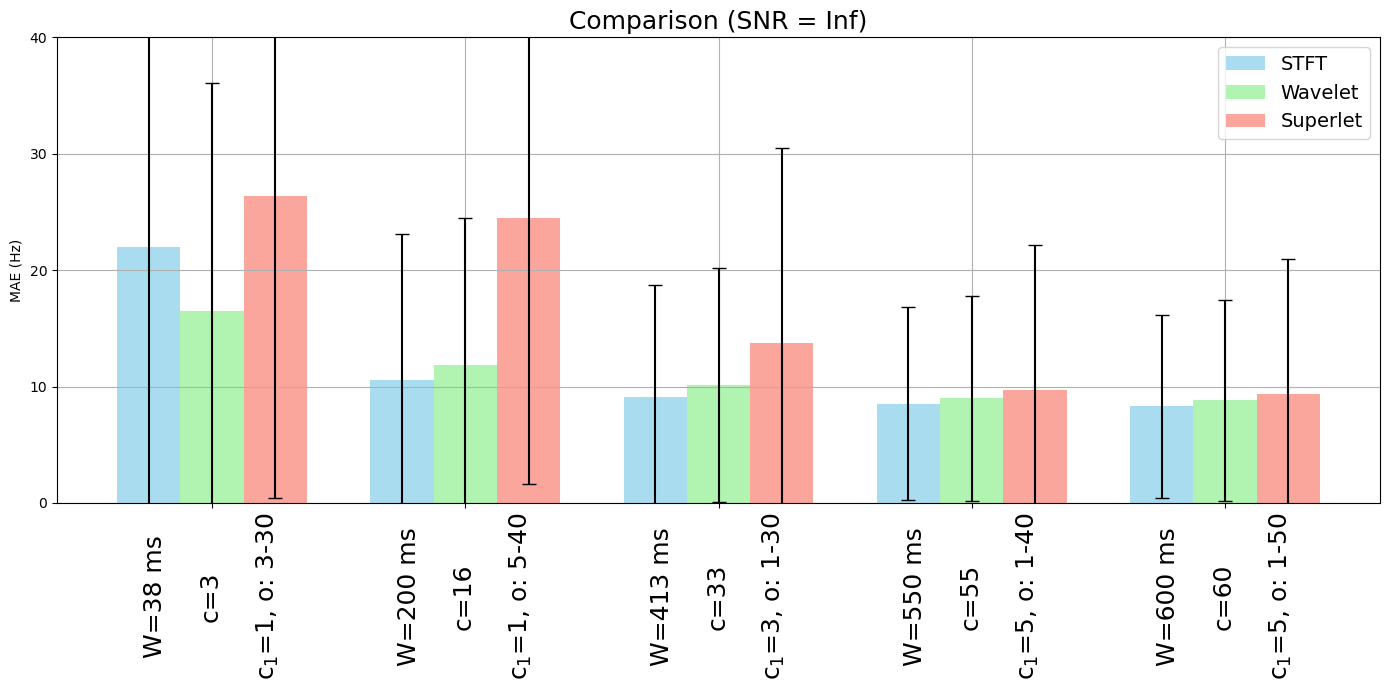

In [42]:
# params_wavelet = [3, 16, 33, 55, 60, 115]
# params_superlet = [
#     (3, 1, 30), (5, 1, 30), (1, 5, 40), (1, 10, 100), (1, 20, 100), (1, 30, 200)
# ]
# params_stft = [38, 200, 413, 550, 600, 824]  # Tamaños de ventana en ms
params_stft = windows_ms

# Número de condiciones
num_conditions = len(mae_wavelet)
x = np.arange(num_conditions)  # Posiciones para cada grupo de barras
bar_width = 0.25  # Ancho de las barras

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))

# Graficar cada técnica con sus valores y barras de error
plt.bar(x - bar_width, mae_stft, width=bar_width, yerr=std_stft, capsize=5, label='STFT', color='skyblue', alpha=0.7)
plt.bar(x, mae_wavelet, width=bar_width, yerr=std_wavelet, capsize=5, label='Wavelet', color='lightgreen', alpha=0.7)
plt.bar(x + bar_width, mae_superlet, width=bar_width, yerr=std_superlet, capsize=5, label='Superlet', color='salmon', alpha=0.7)

# Configuración de etiquetas en el eje x con los parámetros específicos
labels = [
    f"W={p_stft} ms\n\nc={p_w}\n\nc$_1$={p_s[0]}, o: {p_s[1]}-{p_s[2]}"
    for p_w, p_s, p_stft in zip(params_wavelet, zip(*params_superlet), params_stft)
]

plt.xticks(x, labels, rotation=90, ha='center', fontsize=18)
#plt.xlabel('Condiciones y Parámetros')
plt.yticks(np.arange(0, 41, 10))

plt.ylabel('MAE (Hz)')
plt.title('Comparison (SNR = ' + str(SNR) +')', fontsize=18)
plt.ylim(0,40)
plt.legend(fontsize=14)
plt.grid(True)

# Ajustar el layout para mejorar visualización de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# COMPUTE RESOLUTION

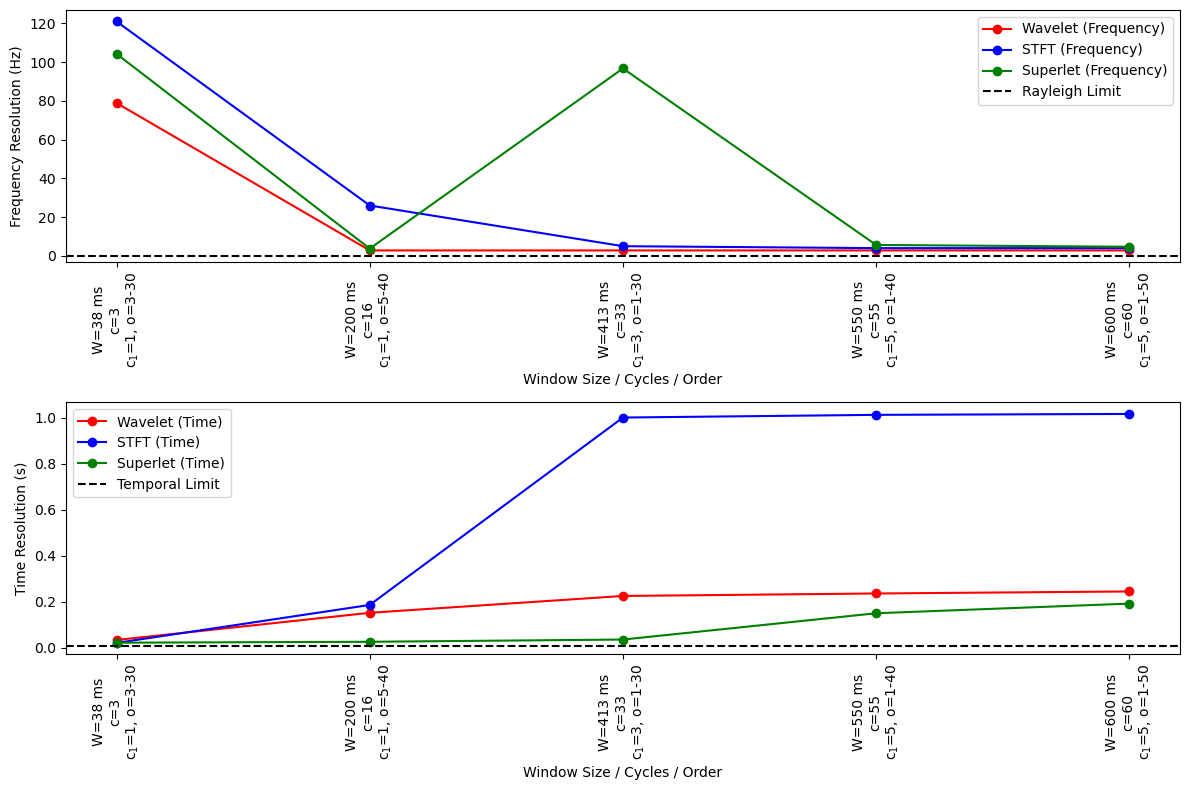

In [43]:
rayleigh_limit = 1 / (4 * np.pi)

# Etiquetas para los grupos de parámetros con salto de línea adicional
labels = [
    f"W={p_stft} ms\nc={p_wavelet}\nc$_1$={p_superlet[0]}, o={p_superlet[1]}-{p_superlet[2]}"
    for p_wavelet, p_superlet, p_stft in zip(params_wavelet, zip(*params_superlet), params_stft)
]

x = np.arange(1,len(params_wavelet)+1)

plt.figure(figsize=(12, 8))

# Primer gráfico (Frecuencia)
plt.subplot(2, 1, 1)
plt.plot(x, [r[1] for r in res_wavelet], 'ro-', label="Wavelet (Frequency)")
plt.plot(x, [r[1] for r in res_stft], 'bo-', label="STFT (Frequency)")
plt.plot(x, [r[1] for r in res_superlet], 'go-', label="Superlet (Frequency)")
plt.axhline(rayleigh_limit, color='k', linestyle='--', label="Rayleigh Limit")
plt.xlabel("Window Size / Cycles / Order")
plt.ylabel("Frequency Resolution (Hz)")
plt.legend()

# Segundo gráfico (Tiempo)
plt.subplot(2, 1, 2)
plt.plot(x, [r[0] for r in res_wavelet], 'ro-', label="Wavelet (Time)")
plt.plot(x, [r[0] for r in res_stft], 'bo-', label="STFT (Time)")
plt.plot(x, [r[0] for r in res_superlet], 'go-', label="Superlet (Time)")
plt.axhline(1 / MNF_1[0], color='k', linestyle='--', label="Temporal Limit")
plt.xlabel("Window Size / Cycles / Order")
plt.ylabel("Time Resolution (s)")
plt.legend()

# Ajuste de los xticks para ambos subgráficos
for ax in plt.gcf().get_axes():
    ax.set_xticks(x)  # Establecer los valores de los ticks
    ax.set_xticklabels(labels, rotation=90, ha='center', fontsize=10)  # Establecer las etiquetas con el formato deseado

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Only first time!!!!

In [44]:
MAES = {
    'stft': [],
    'wavelet': [],
    'superlet': [],
    'std_stft': [],
    'std_wavelet': [],
    'std_superlet': []
}

In [45]:
MAES['wavelet'].append(mae_wavelet)
MAES['stft'].append(mae_stft)
MAES['superlet'].append(mae_superlet)
MAES['std_wavelet'].append(std_wavelet)
MAES['std_stft'].append(std_stft)
MAES['std_superlet'].append(std_superlet)

In [46]:
MAES

{'stft': [[22.025153255777944,
   10.574927500907396,
   9.117159706780456,
   8.538114710944258,
   8.31303780898141]],
 'wavelet': [[16.466571543655128,
   11.872369591992316,
   10.102975570972653,
   8.989216191594675,
   8.819056597280373]],
 'superlet': [[26.388756565223574,
   24.476662201610313,
   13.723851177836906,
   9.693462599218202,
   9.337450353410073]],
 'std_stft': [[27.399122692589234,
   12.529921666495827,
   9.570765678776354,
   8.262169336690132,
   7.871692957889799]],
 'std_wavelet': [[19.636955, 12.590243, 10.039521, 8.779607, 8.620276]],
 'std_superlet': [[25.955912738707656,
   22.846358225700875,
   16.79775972354939,
   12.50422511912309,
   11.644091364439205]]}

### WE REPEAT EVERYTHING WITH DIFFERENT SNR

## We reset the signal

In [47]:
plot_1 = False
plot_2 = False

# Baseline parameters

In [48]:
noise = np.random.normal(0, 0.01, len(t))  # Gaussian noise
#noise = np.zeros(len(t))
baseline_1 = noise.copy()

In [49]:
baseline_1[burst_start_1*fs:burst_start_1*fs + len(burst_1)] += burst_1

Reference mean frequency: 121.57978997586497 Hz


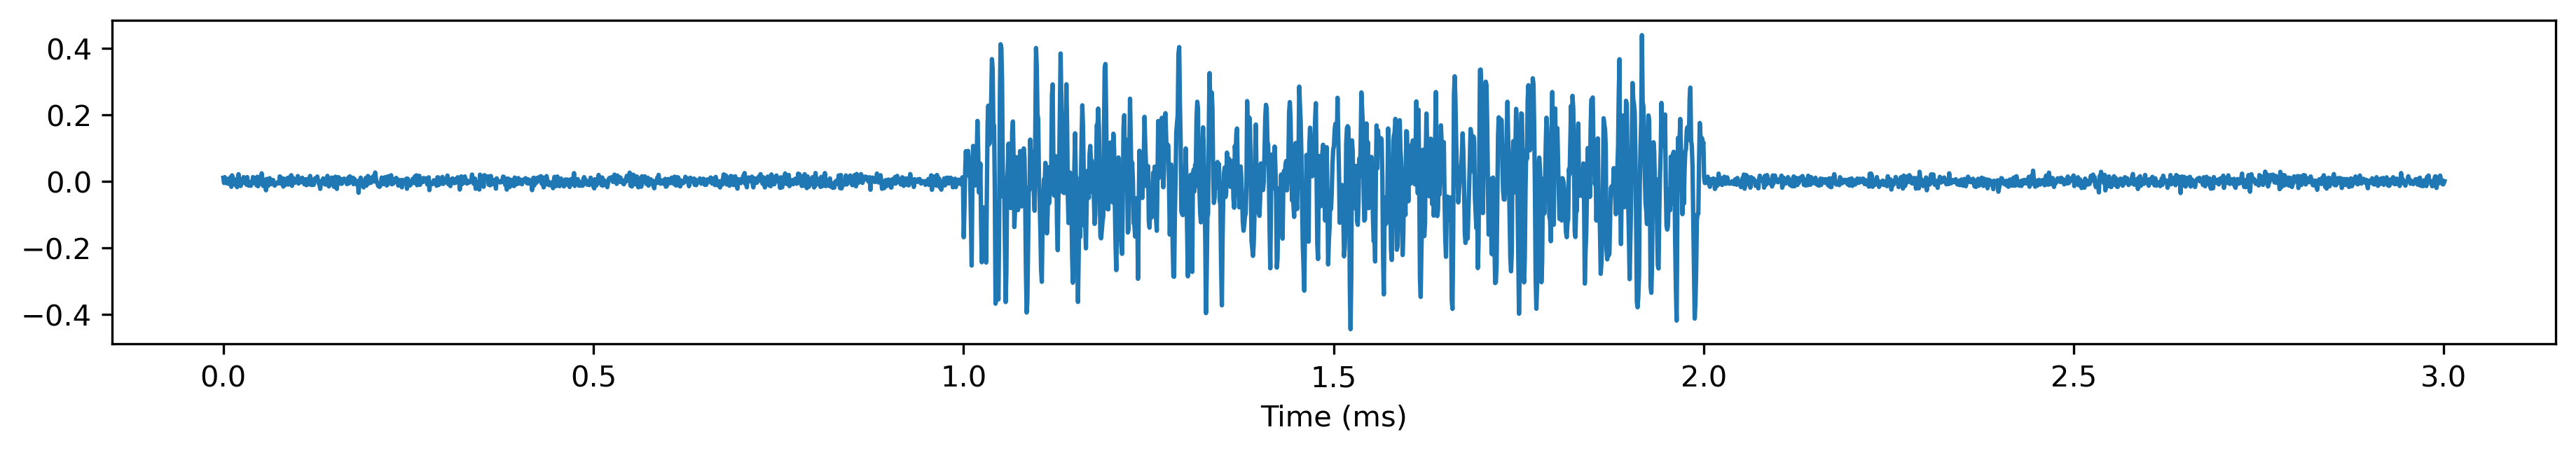

In [50]:
signal = baseline_1
fig, ax = plt.subplots(figsize=(15, 2), dpi=300)
ax.set_xlabel("Time (ms)")
ax.plot(jnp.linspace(0, len(signal)/fs, len(signal)), signal)
print(f"Reference mean frequency: {MNF_1[0]} Hz")

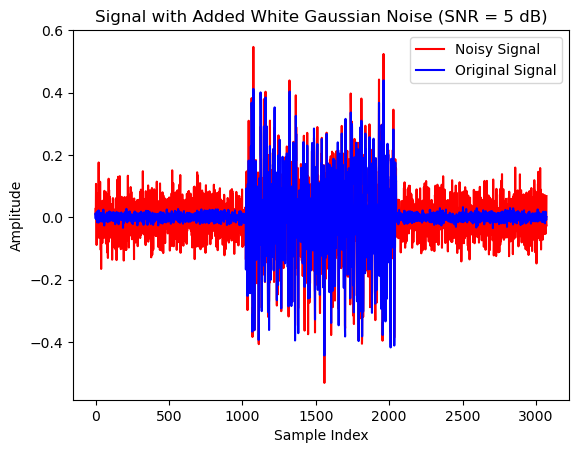

In [51]:
SNR = 5
#signal_noise = add_noise(baseline_1, SNR, plot = True)
signal_noise = add_noise(signal, SNR, plot = True)
#signal_noise = add_wgn_to_sig(baseline_1, noise, SNR)
signal = signal_noise

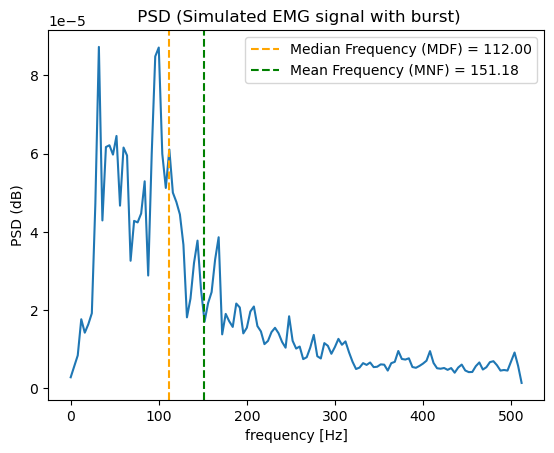

In [52]:
psd_welch, f_welch, MNF = superlet.compute_psd_welch(signal, fs, plot=True, muscle='Simulated EMG signal with burst')

Reference mean frequency: [121.57978997586497] Hz


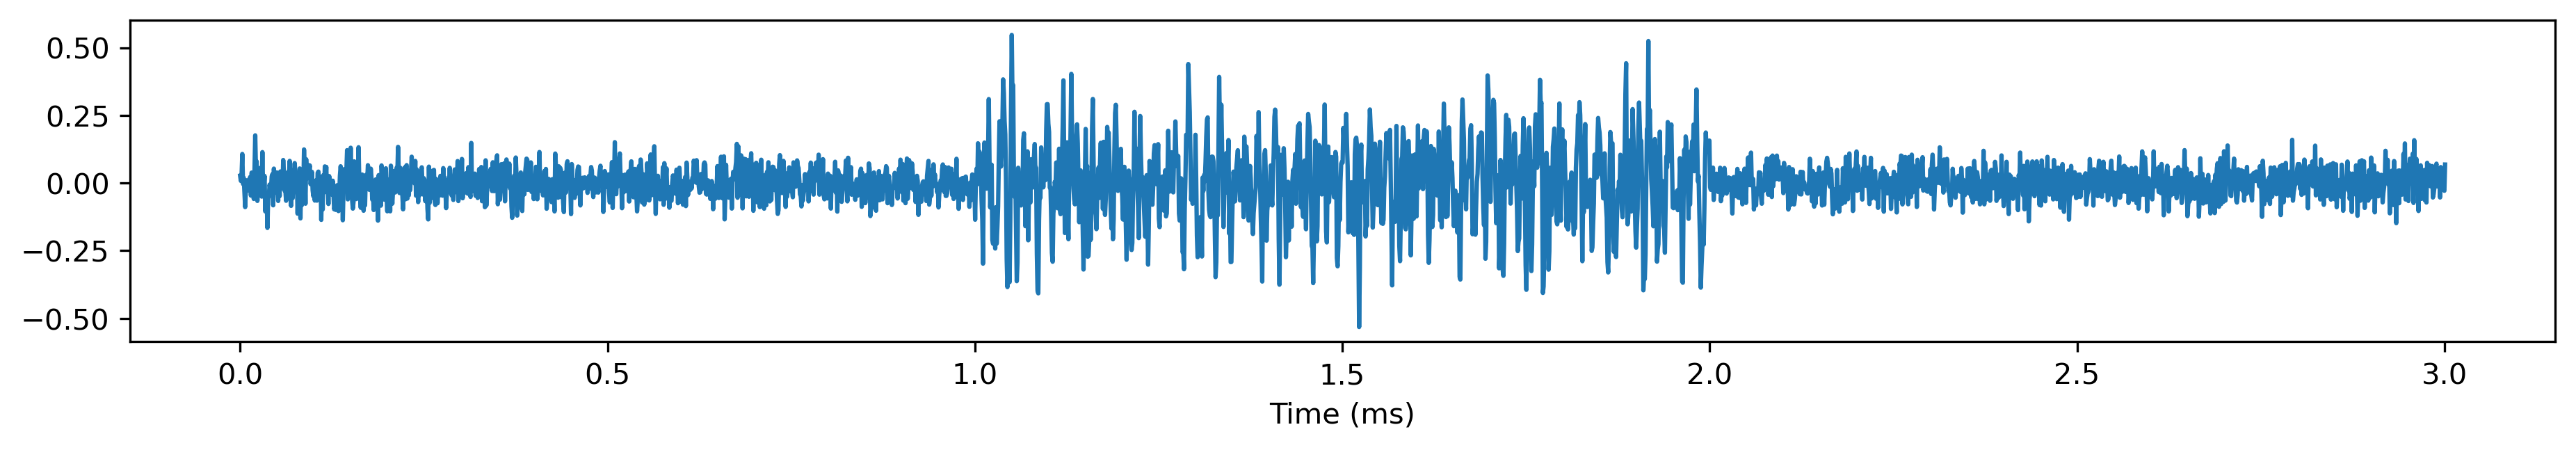

In [53]:
fig, ax = plt.subplots(figsize=(15, 2), dpi=300)
ax.set_xlabel("Time (ms)")
ax.plot(jnp.linspace(0, len(signal)/fs, len(signal)), signal)
print(f"Reference mean frequency: {MNF_1} Hz")

## WAVELET PARAMETERS = 3, 16, 33, 55, 60, 115 cycles

In [54]:
importlib.reload(superlet)

<module 'superlets_package.superlets' from '/Users/neuralrehabilitationgroup/PycharmProjects/Superlets-Marina/superlets_package/superlets.py'>

130.32492
128.92715
129.00783
129.45836
129.56216


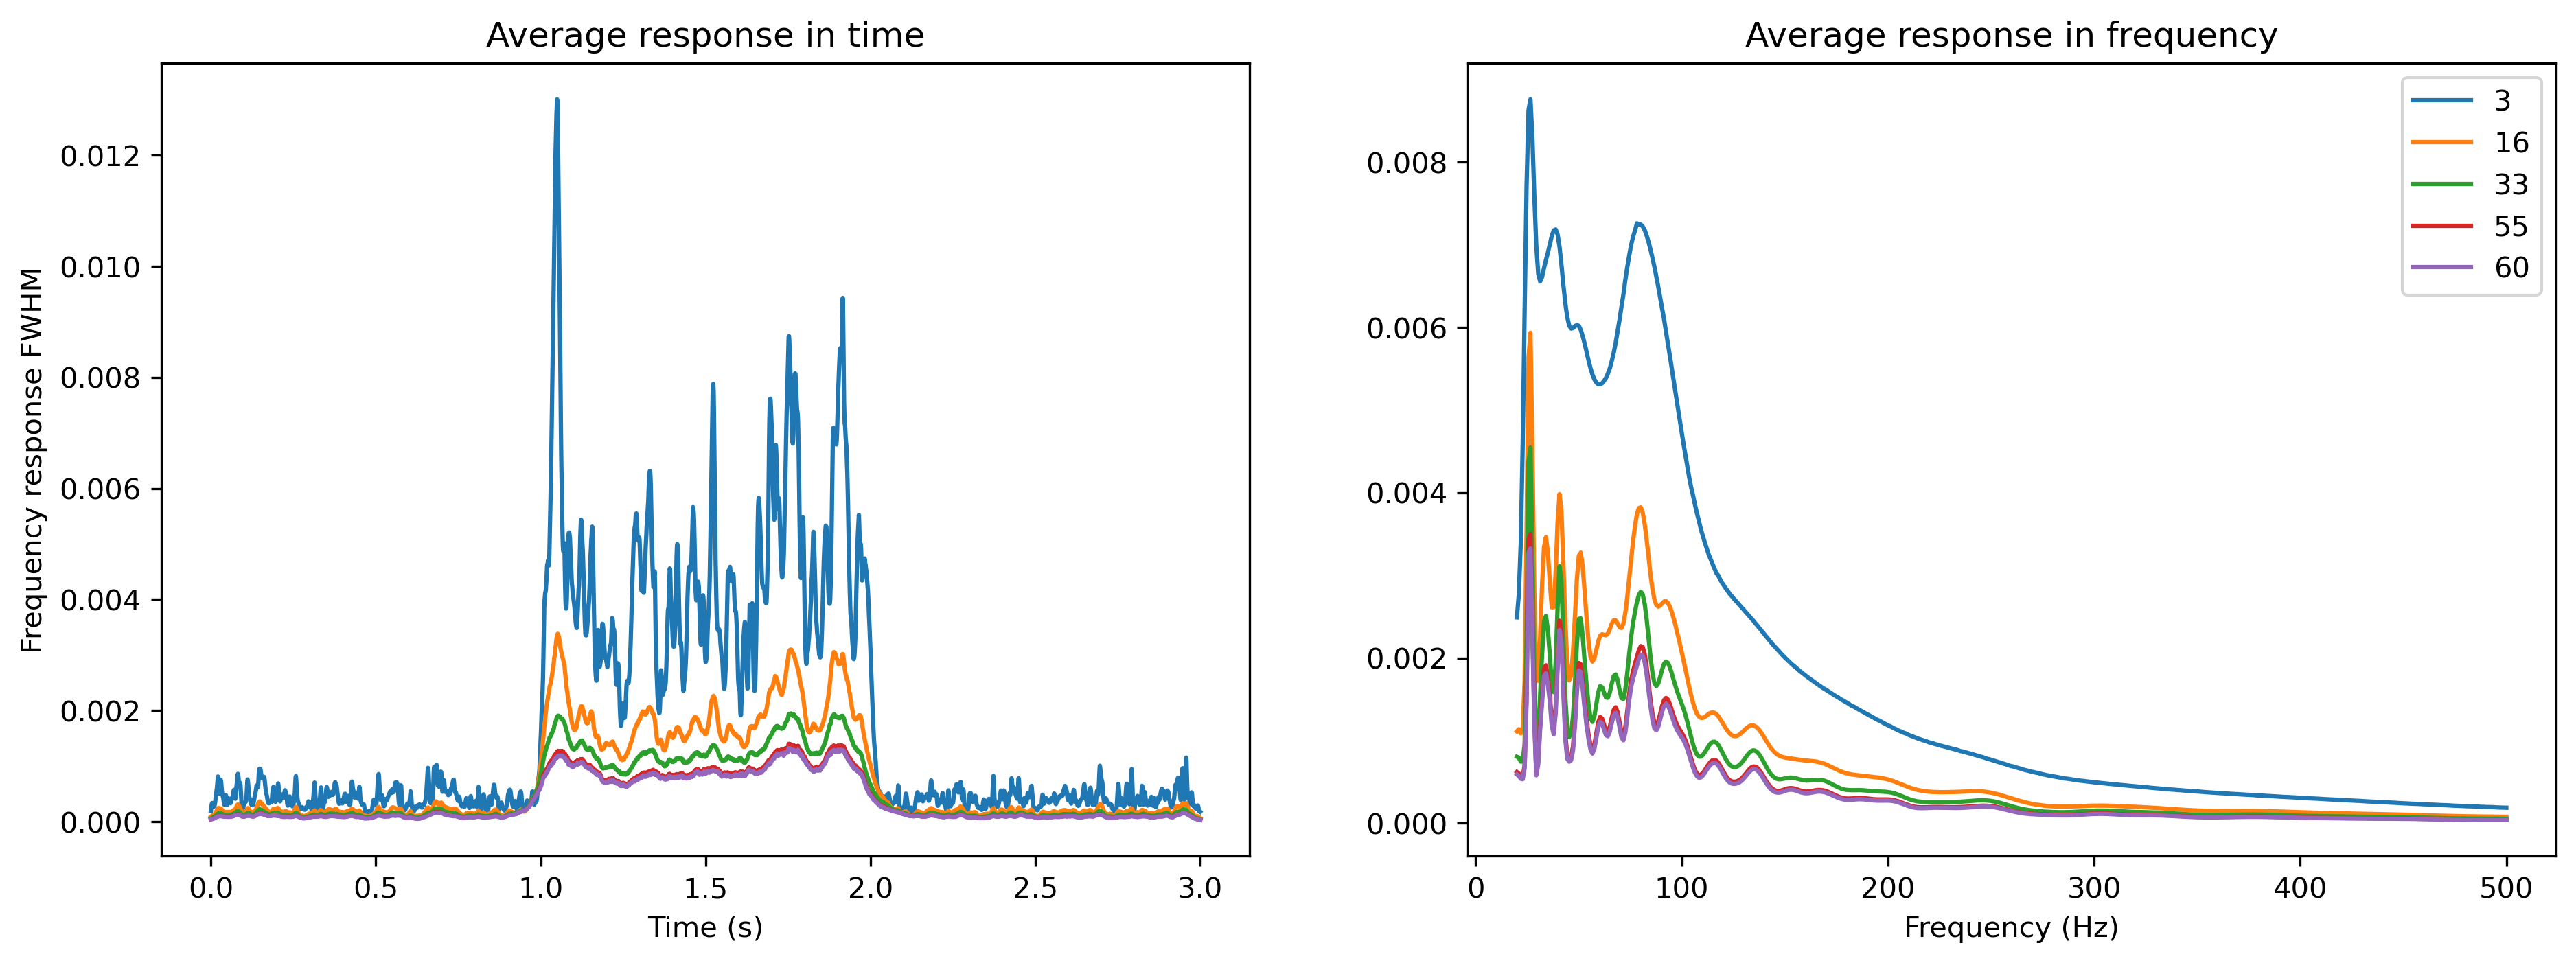

In [55]:
if plot_1:
    fig, ax = plt.subplots(ncols=len(params_wavelet), figsize=(18, 5), dpi=300)
if plot_2:
    # Definir límites de color para que sean iguales en todos los subplots
    fig_2, ax_2 = plt.subplots(ncols=len(params_wavelet), figsize=(18, 5), dpi=300)
    fig_3, ax_3 = plt.subplots(figsize=(10, 6))

mae_wavelet = []
std_wavelet = []
times_wavelet = []

total_time = []
total_freq = []

total_scalogram_wavelet = []
res_wavelet = []

# Iterar sobre los parámetros de wavelet
for i, c in enumerate(params_wavelet):
    wavelet = f"cmor{c}-1.0"

    # Transformada wavelet continua
    #cwtmatr, freqs_1 = pywt.cwt(signal, sc, wavelet, sampling_period=1/fs)
    cwtmatr, f, physical_freqs = morlet.wavelet_transform_2(signal,wavelet,freqs,fs)

    cwtmatr = np.abs(cwtmatr[:, :])

    tiempo_wv = np.linspace(0,signal_duration,cwtmatr.shape[1])

    if plot_1:
        # im = ax[i].imshow(cwtmatr, aspect='auto', cmap="jet", interpolation="none", origin="lower", extent=[0, len(signal)/fs, freqs_1[-1], freqs_1[0]]) #, vmin=vmin, vmax=vmax)
        pcm = ax[i].pcolormesh(tiempo_wv, f, cwtmatr)
        #ax[i].set_yscale("log")
        ax[i].set_xlabel("Time (s)")
        ax[i].set_ylabel("Frequency (Hz)")
        ax[i].set_ylim(freqs[0], freqs[-1])

        cbar = fig.colorbar(pcm, ax=ax[i], orientation='horizontal')
        cbar.set_label('Power [a.u]', rotation=0, labelpad=15)  # Etiqueta de la colorbar
        plt.tight_layout()

    scalogram_2 = jnp.abs(cwtmatr)**2

    total_scalogram_wavelet.append(scalogram_2)
    instant_mean_freq_total = []


    instant_freq = np.sum(scalogram_2 * f[:, np.newaxis], axis=0) / np.sum(scalogram_2, axis=0)

    start_idx = np.searchsorted(tiempo_wv, burst_start_1)  # Encuentra el índice de inicio
    end_idx = np.searchsorted(tiempo_wv, burst_start_1 + burst_duration_1)  # Encuentra el índice final
#
    instant_mean_freq_burst = instant_freq[start_idx:end_idx]

    # Create time (each column is a time instant)
    tiempo = np.arange(len(instant_freq)) / fs

    if plot_2:
        ax_2[i].plot(tiempo, instant_freq)

        ax_2[i].set_xlabel("Time (s)")
        ax_2[i].set_ylabel("Frequency (Hz)")
        #ax_2[i].set_xlim(tiempo[0], tiempo[-1])
        #plt.title("Medias de cada fila en función del tiempo")
        ax_2[i].grid(True)

        ax_3.plot(tiempo, instant_freq, label=f"Mean frequency (Cycles: {c})")
        plt.tight_layout()

    print(np.mean(instant_mean_freq_burst))
    mae, std = calculate_mae(instant_mean_freq_burst, MNF_1)
    mae_wavelet.append(mae)
    std_wavelet.append(std)

    time = np.arange(scalogram_2.shape[1]) / fs

    total_time.append(time)
    total_freq.append(freqs)

# Configuración del gráfico
if plot_2:
    ax_3.set_xlabel("Time (s)")
    ax_3.set_ylabel("Frequency (Hz)")
    ax_3.legend()
    ax_3.grid(True)
    ax_3.set_title("Comparación de frecuencias medias instantáneas")

res_wavelet = superlet.compute_avg_response_resolution(total_scalogram_wavelet, total_time, total_freq, params_wavelet)

In [56]:
MNF_1

[121.57978997586497]

In [57]:
mae_wavelet

[21.704627860965658,
 14.113001607157976,
 11.53101388870954,
 10.57361613373524,
 10.522926262559679]

## PARÁMETROS SUPERLET: base_cycle, min_order, max_order = [3, 5, 1, 1, 1, 1], [1, 1, 5, 10, 20, 30], [30, 30, 40, 100, 100, 200]

In [58]:
importlib.reload(superlet)

<module 'superlets_package.superlets' from '/Users/neuralrehabilitationgroup/PycharmProjects/Superlets-Marina/superlets_package/superlets.py'>

160.7482793605596
160.91601798041546
143.64173862181445
137.8526775654728
134.83269047447618


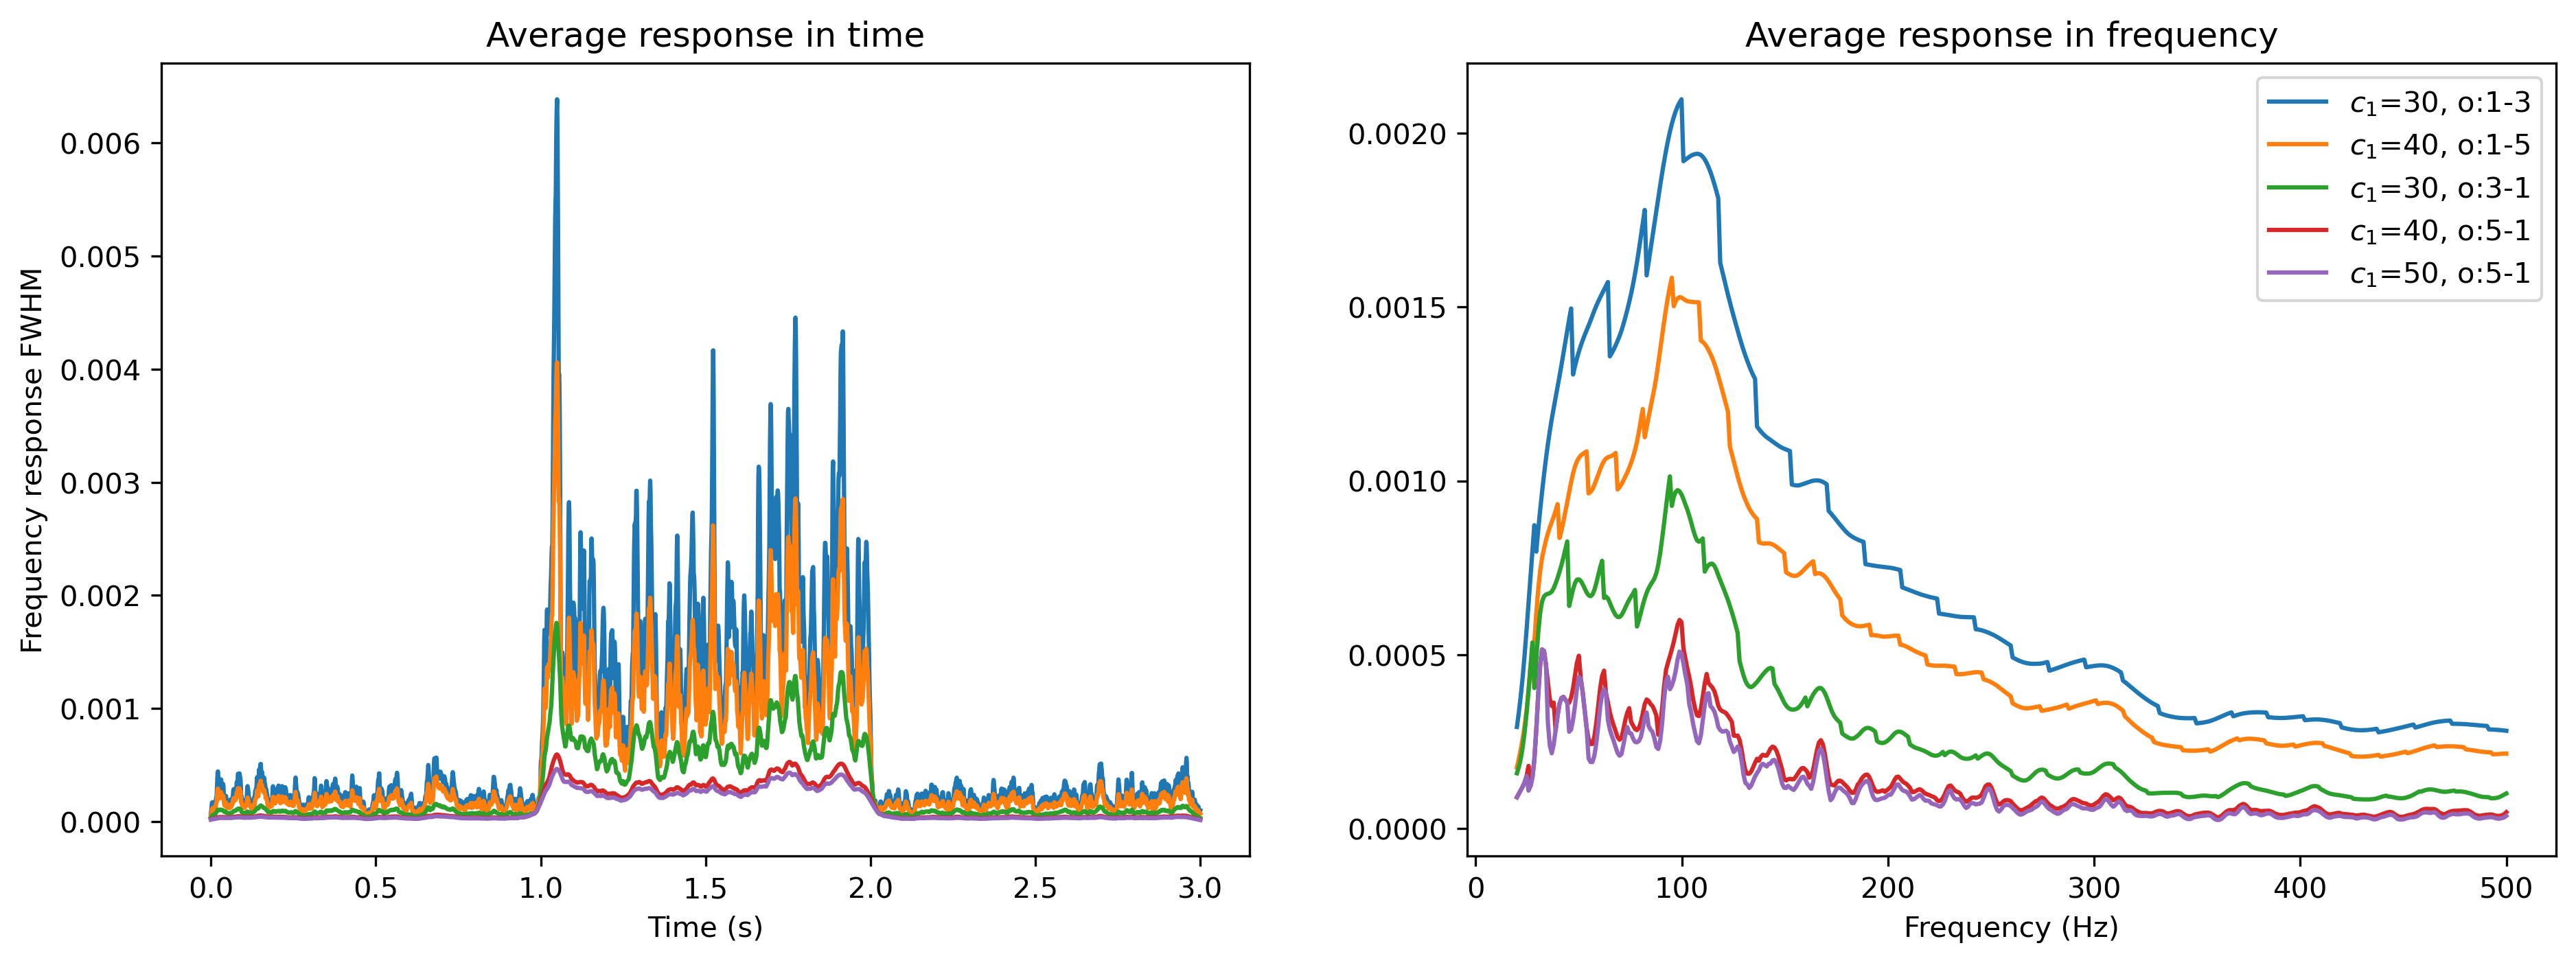

In [59]:
#params_superlet = [[3, 5, 1, 1, 1, 1], [1, 1, 5, 10, 20, 30], [30, 30, 40, 100, 100, 200]]
#params_superlet = [[3,5,1],[1,1,5],[30,30,40]]

if plot_1:
    fig, ax = plt.subplots(ncols=len(params_superlet[0]), figsize=(15, 5), dpi=300)

if plot_2:
    fig_2, ax_2 = plt.subplots(ncols=len(params_superlet[0]), figsize=(15, 5), dpi=300)
    fig_3, ax_3 = plt.subplots(figsize=(10, 6))

mae_superlet = []
std_superlet = []
times_superlet = []

total_time = []
total_freq = []

total_scalogram_superlet = []

#enumerate(zip([3,5,1], [1,1,5], [30,30,40])):
#enumerate(zip([1,1,1], [10,20,30], [100,100,200])):
for (i, (base_cycle, min_order, max_order)) in enumerate(zip(*params_superlet)):
    import time

    start_time = time.time()
    wv, scalogram = superlet.adaptive_superlet_transform(signal, freqs, sampling_freq=fs,
                                                         base_cycle=base_cycle, min_order=min_order,
                                                         max_order=max_order, mode="mul")
    end_time = time.time()
    times_superlet.append(end_time - start_time)

    if plot_1:
        im = ax[i].imshow(jnp.abs(scalogram) ** 2, aspect='auto', cmap="jet", interpolation="none", origin="lower",
                          extent=[0, len(signal) / fs, freqs[0], freqs[-1]])
        ax[i].set_title(f"$c_1$: {base_cycle}, o: {min_order}-{max_order}")
        ax[i].set_xlabel("Time (s)")
        ax[i].set_ylabel("Frequency (Hz)")

        cbar = fig.colorbar(im, ax=ax[i], orientation='horizontal')
        cbar.set_label('Power [a.u]', rotation=0, labelpad=15)  # Etiqueta de la colorbar
        plt.tight_layout()

    scalogram_2 = np.abs(scalogram) ** 2

    # if np.any(np.isnan(jnp.abs(scalogram) ** 2)) or np.any(np.isinf(jnp.abs(scalogram) ** 2)):
    #     scalogram_2 = np.nan_to_num(jnp.abs(scalogram) ** 2)

    total_scalogram_superlet.append(scalogram_2)
    #scalogram_2 = scalogram_2 * freqs[:, np.newaxis]  

    instant_mean_freq_total = []

    instant_mean_freq = np.sum(scalogram_2 * freqs[:, np.newaxis], axis=0) / np.sum(scalogram_2, axis=0)

    initial_imnf = instant_mean_freq[:round(burst_start_1 * fs) - offset]
    instant_mean_freq_total.extend(initial_imnf)
    # plt.figure()
    # plt.plot(initial_imnf)

    instant_mean_freq_burst = instant_mean_freq[
                              round(burst_start_1 * fs):round((burst_start_1 + burst_duration_1) * fs)]
    instant_mean_freq_burst = instant_mean_freq_burst[offset_burst:round(len(instant_mean_freq_burst)) - offset_burst]
    instant_mean_freq_total.extend(instant_mean_freq_burst)
    # plt.figure()
    # plt.plot(instant_mean_freq_burst)

    final_imnf = instant_mean_freq[round((burst_start_1 + burst_duration_1) * fs) + offset:]
    instant_mean_freq_total.extend(final_imnf)
    # plt.figure()
    # plt.plot(final_imnf)

    # Create time (each column is a time instant)
    tiempo = np.arange(len(instant_mean_freq_total)) / fs

    if plot_2:
        ax_2[i].plot(tiempo, instant_mean_freq_total,
                     label="Mean frequency (each window of " + str(len(freqs)) + ' samples)')

        ax_2[i].set_xlabel("Time (s)")
        ax_2[i].set_ylabel("Frequency (Hz)")
        #ax_2[i].set_xlim(tiempo[0], tiempo[-1])
        #plt.title("Medias de cada fila en función del tiempo")
        ax_2[i].legend()
        ax_2[i].grid(True)

        ax_3.plot(tiempo, instant_mean_freq_total, label=f"Mean frequency (Cycles: {base_cycle})")

    print(np.mean(instant_mean_freq_burst))
    mae, std = calculate_mae(instant_mean_freq_burst, MNF_1)
    mae_superlet.append(mae)
    std_superlet.append(std)

    time = np.arange(scalogram_2.shape[1]) / fs

    total_time.append(time)
    total_freq.append(freqs)

if plot_2:
    ax_3.set_xlabel("Time (s)")
    ax_3.set_ylabel("Frequency (Hz)")
    ax_3.legend()
    ax_3.grid(True)
    ax_3.set_title("Comparación de frecuencias medias instantáneas")

res_superlet = superlet.compute_avg_response_resolution(total_scalogram_superlet, total_time, total_freq,
                                                        [f'$c_1$={c3}, o:{c1}-{c2}' for c1, c2, c3 in
                                                         zip(*params_superlet)])

In [60]:
mae_superlet

[41.162132808604795,
 40.4720876272264,
 24.262756350105946,
 17.21772976720127,
 14.567085726718702]

## STFT PARAMETERS (window = duration/cycles) = 38, 200, 413, 550, 600, 824 ms

In [61]:
importlib.reload(superlet)

<module 'superlets_package.superlets' from '/Users/neuralrehabilitationgroup/PycharmProjects/Superlets-Marina/superlets_package/superlets.py'>

138.93593818615543
132.83587499159478
132.02280653236627
131.94142540178893
131.96302489653942


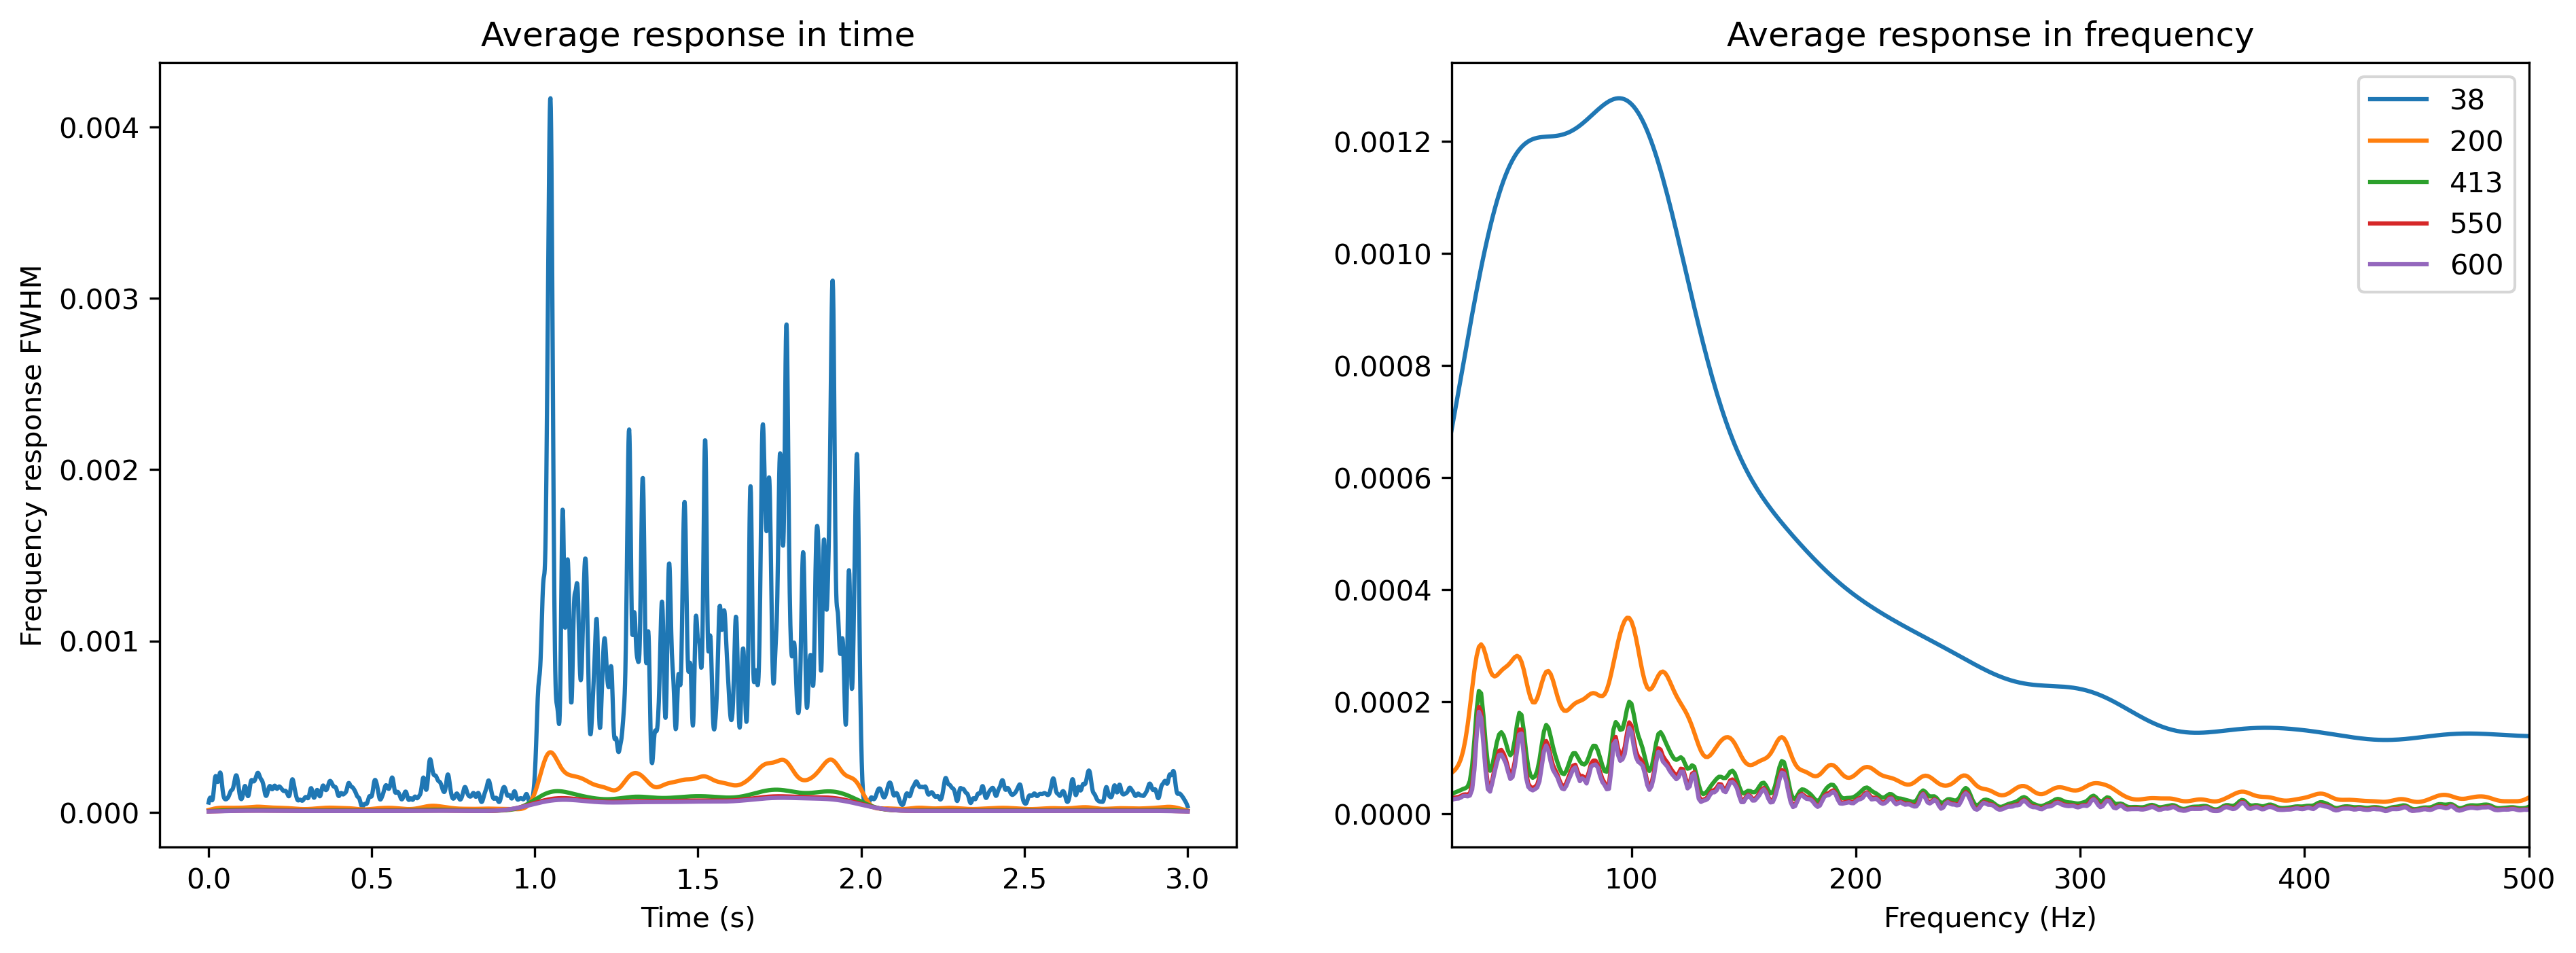

In [62]:
# Parámetros de la STFT con ventanas de 38 ms, 200 ms, y 413 ms (convertido a muestras)
# [38, 200, 413, 550, 600, 824]
#windows_samples = [int((w / 1000) * fs) for w in windows_ms]  # Convertir a muestras

if plot_1:
    fig, ax = plt.subplots(ncols=len(windows_ms), figsize=(15, 5), dpi=300)

if plot_2:
    fig_2, ax_2 = plt.subplots(ncols=len(windows_ms), figsize=(15, 5), dpi=300)
    fig_3, ax_3 = plt.subplots(figsize=(10, 6))

mae_stft = []
std_stft = []
times_stft = []

total_time = []
total_freq = []

res_stft = []
total_scalogram_stft = []

for i, w in enumerate(windows_ms):
    import time

    # Calcular la ventana Blackman
    start_time = time.time()
    window = windows.blackman(w)

    # Hacer que la f de la stft tenga el mismo tamaño que las demás
    nfft = 2 * (len(freqs))
    # Dimensión de la frecuencia = nfft/2 + 1
    # Dimesión del tiempo = [(N - noverlap)/(nperseg-noverlap)] + 1 = 

    # Realizar la STFT con la ventana Blackman y superposición del 50%
    #f, t, Zxx = stft(signal, fs, window=window, nfft=nfft, nperseg=w, noverlap=w//2, padded=True, scaling='psd')
    f, t, Zxx = stft(signal, fs=fs, window='blackman', nperseg=w, noverlap=w - 1, nfft=nfft, detrend=False,
                     return_onesided=True, boundary='zeros', padded=True, axis=-1, scaling='spectrum')

    # ax[i].pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='jet')

    # Calcular la representación de potencia (magnitud al cuadrado)
    Zxx_power = np.abs(Zxx) ** 2

    # Graficar la representación de potencia
    #plt.figure(figsize=(10, 6))

    end_time = time.time()
    times_stft.append(end_time - start_time)

    if plot_1:
        pcm = ax[i].pcolormesh(t, f, Zxx_power, shading='gouraud', cmap='jet')

        ax[i].set_title(f'W={w * 1000 // fs} ms')
        ax[i].set_ylabel('Frecuencia [Hz]')
        ax[i].set_xlabel('Tiempo [s]')

        cbar = fig.colorbar(pcm, ax=ax[i], orientation='horizontal')
        cbar.set_label('Power', rotation=270, labelpad=15)  # Etiqueta de la colorbar

        #fig.colorbar(pcm, ax=ax[i], label='Potencia')
        ax[i].set_ylim(freqs[0], freqs[-1])  # Ajustar el rango de frecuencias si es necesario
        plt.tight_layout()

    scalogram_2 = Zxx_power

    #if np.any(np.isnan(jnp.abs(Zxx)**2)) or np.any(np.isinf(jnp.abs(Zxx)**2)):
    # scalogram_2 = jnp.nan_to_num(jnp.abs(Zxx) ** 2, nan=0.0, posinf=0.0, neginf=0.0)

    total_scalogram_stft.append(scalogram_2)

    instant_mean_freq_total = []
    instant_mean_freq = np.sum(scalogram_2 * f[:, np.newaxis], axis=0) / np.sum(scalogram_2, axis=0)

    #mean_instant_freq = np.where(freqs,np.max(scalogram_2, axis=0))
    # mean_instant = np.mean(np.where(freqs,max(scalogram_2)))
    # plt.figure()
    # plt.plot(mean_instant)

    start_index = np.argmin(np.abs(t - burst_start_1))
    end_index_burst = np.argmin(np.abs(t - (burst_start_1 + burst_duration_1)))

    # Segmento inicial antes del burst
    initial_imnf = instant_mean_freq[:max(0, start_index - offset)]  # Asegurar que no haya índices negativos
    instant_mean_freq_total.extend(initial_imnf)
    # plt.figure()
    # plt.plot(initial_imnf)

    # Segmento durante el burst
    instant_mean_freq_burst = instant_mean_freq[start_index:end_index_burst]
    instant_mean_freq_burst = instant_mean_freq_burst[offset_burst:len(
        instant_mean_freq_burst) - offset_burst]  # Aplicar offset dentro del burst
    instant_mean_freq_total.extend(instant_mean_freq_burst)
    # plt.figure()
    # plt.plot(instant_mean_freq_burst)

    # Segmento final después del burst
    final_start_index = end_index_burst + offset
    final_imnf = instant_mean_freq[final_start_index:]
    instant_mean_freq_total.extend(final_imnf)

    # initial_imnf = instant_mean_freq[:np.where(t >= burst_start_1)[0][0]-offset]
    # instant_mean_freq_total.extend(initial_imnf)
    # # plt.figure()
    # # plt.plot(initial_imnf)
    # 
    # print(t >= (burst_start_1 + burst_duration_1))
    # instant_mean_freq_burst = instant_mean_freq[np.where(t >= burst_start_1)[0][0]:np.where(t >= (burst_start_1 + burst_duration_1))[0][0]]
    # instant_mean_freq_burst = instant_mean_freq_burst[offset_burst:len(instant_mean_freq_burst)-offset_burst]
    # instant_mean_freq_total.extend(instant_mean_freq_burst)
    # # plt.figure()
    # # plt.plot(instant_mean_freq_burst)
    #  
    # final_imnf = instant_mean_freq[np.where(t >= burst_start_1 + burst_duration_1)[0][0] + offset:]
    # instant_mean_freq_total.extend(final_imnf)
    # plt.figure()
    # plt.plot(final_imnf)

    # Create time (each column is a time instant)
    tiempo = np.linspace(t[0], t[-1], len(instant_mean_freq_total))

    if plot_2:
        ax_2[i].plot(tiempo, instant_mean_freq_total,
                     label="Mean frequency (each window of " + str(len(freqs)) + ' samples)')

        ax_2[i].set_xlabel("Time (s)")
        ax_2[i].set_ylabel("Frequency (Hz)")
        #ax_2[i].set_xlim(tiempo[0], tiempo[-1])
        #plt.title("Medias de cada fila en función del tiempo")
        ax_2[i].legend()
        ax_2[i].grid(True)

        ax_3.plot(tiempo, instant_mean_freq_total, label=f"Mean frequency (Cycles: {w})")

    print(np.mean(instant_mean_freq_burst))
    mae, std = calculate_mae(instant_mean_freq_burst, MNF_1)
    mae_stft.append(mae)
    std_stft.append(std)

    total_time.append(np.linspace(t[0], t[-1], scalogram_2.shape[1]))
    total_freq.append(np.linspace(f[0], f[-1], scalogram_2.shape[0]))

# Configuración del gráfico
if plot_2:
    ax_3.set_xlabel("Time (s)")
    ax_3.set_ylabel("Frequency (Hz)")
    ax_3.legend()
    ax_3.grid(True)
    ax_3.set_title("Comparación de frecuencias medias instantáneas")

res_stft = superlet.compute_avg_response_resolution(total_scalogram_stft, total_time, total_freq, windows_ms, stft=[freqs[0],freqs[-1]])

In [63]:
mae_stft

[29.23463739758034,
 14.56355754361055,
 10.994405903282196,
 10.69363875011936,
 10.633200338348633]

### Plot comparison of the same SNR

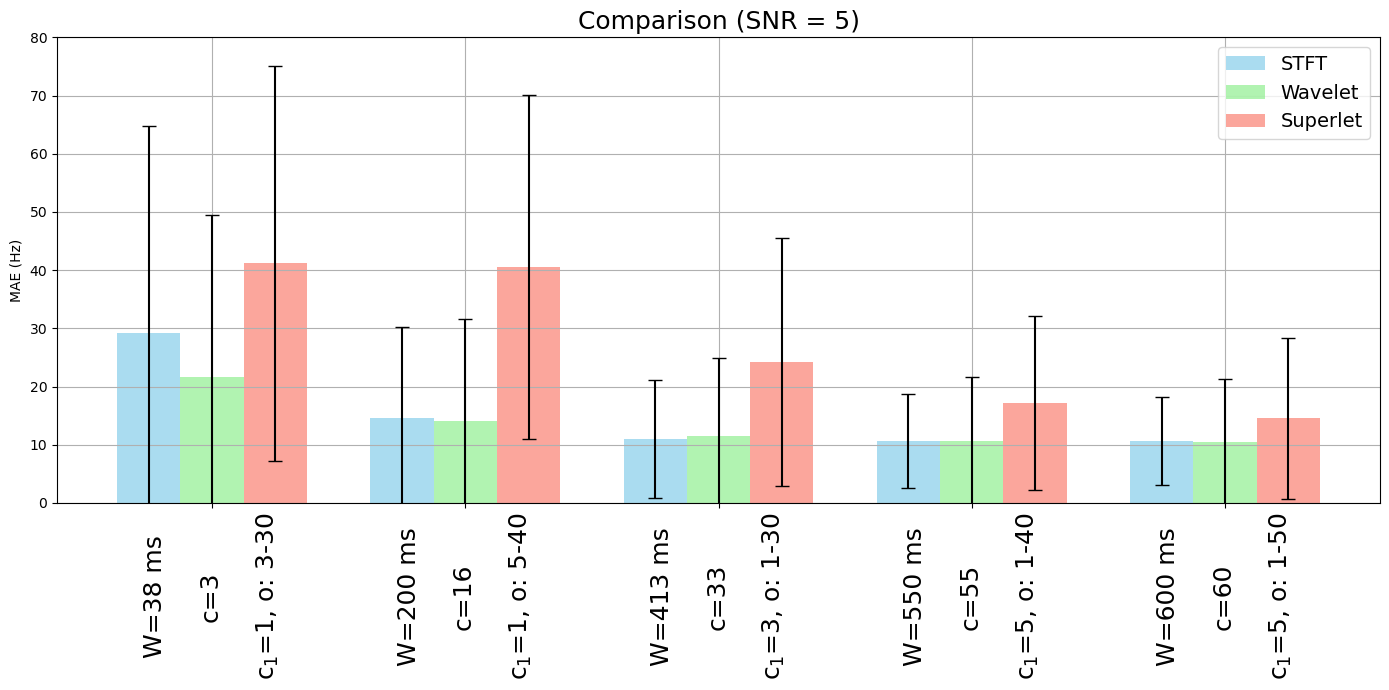

In [64]:
# params_wavelet = [3, 16, 33, 55, 60, 115]
# params_superlet = [
#     (3, 1, 30), (5, 1, 30), (1, 5, 40), (1, 10, 100), (1, 20, 100), (1, 30, 200)
# ]
# params_stft = [38, 200, 413, 550, 600, 824]  # Tamaños de ventana en ms
params_stft = windows_ms

# Número de condiciones
num_conditions = len(mae_wavelet)
x = np.arange(num_conditions)  # Posiciones para cada grupo de barras
bar_width = 0.25  # Ancho de las barras

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))

# Graficar cada técnica con sus valores y barras de error
plt.bar(x - bar_width, mae_stft, width=bar_width, yerr=std_stft, capsize=5, label='STFT', color='skyblue', alpha=0.7)
plt.bar(x, mae_wavelet, width=bar_width, yerr=std_wavelet, capsize=5, label='Wavelet', color='lightgreen', alpha=0.7)
plt.bar(x + bar_width, mae_superlet, width=bar_width, yerr=std_superlet, capsize=5, label='Superlet', color='salmon',
        alpha=0.7)

# Configuración de etiquetas en el eje x con los parámetros específicos
labels = [
    f"W={p_stft} ms\n\nc={p_w}\n\nc$_1$={p_s[0]}, o: {p_s[1]}-{p_s[2]}"
    for p_w, p_s, p_stft in zip(params_wavelet, zip(*params_superlet), params_stft)
]

plt.xticks(x, labels, rotation=90, ha='center', fontsize=18)
#plt.xlabel('Condiciones y Parámetros')
plt.yticks(np.arange(0, 81, 10))

plt.ylabel('MAE (Hz)')
plt.title('Comparison (SNR = ' + str(SNR) + ')', fontsize=18)
plt.ylim(0, 80)
plt.legend(fontsize=14)
plt.grid(True)

# Ajustar el layout para mejorar visualización de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# COMPUTE RESOLUTION

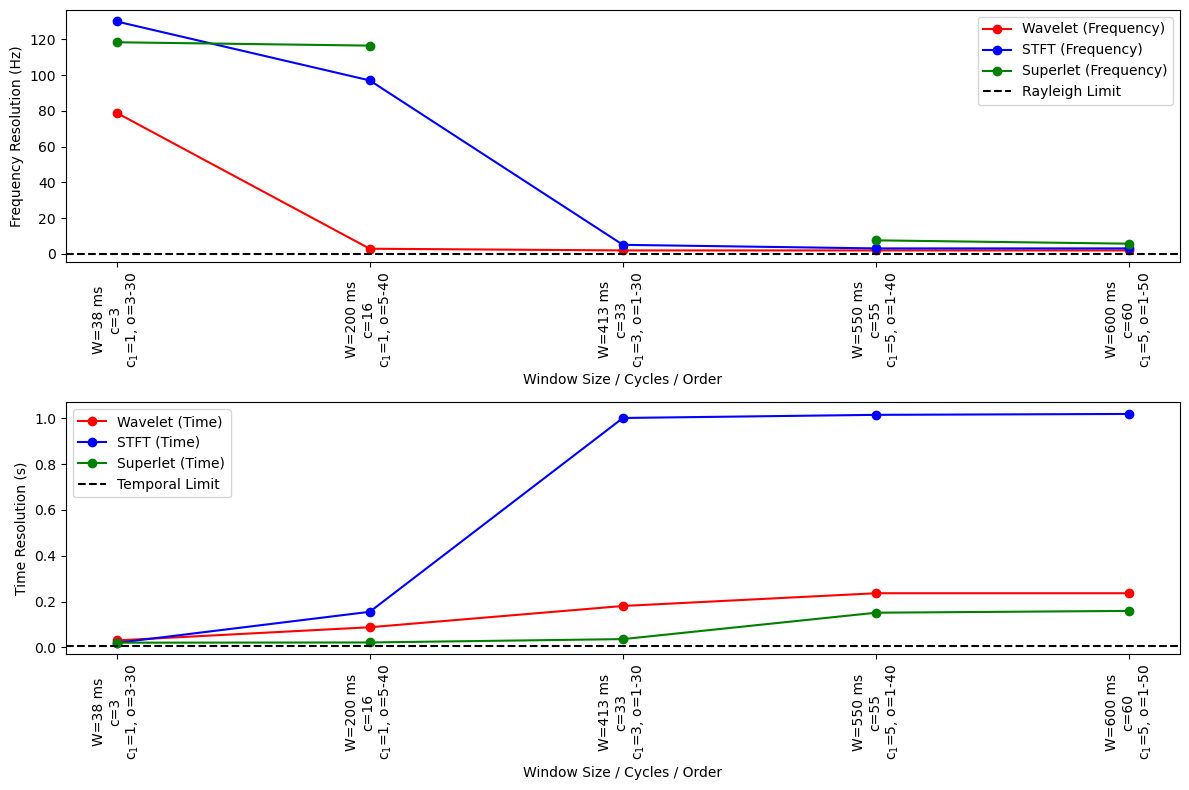

In [65]:
rayleigh_limit = 1 / (4 * np.pi)

# Etiquetas para los grupos de parámetros con salto de línea adicional
labels = [
    f"W={p_stft} ms\nc={p_wavelet}\nc$_1$={p_superlet[0]}, o={p_superlet[1]}-{p_superlet[2]}"
    for p_wavelet, p_superlet, p_stft in zip(params_wavelet, zip(*params_superlet), params_stft)
]

x = np.arange(1,len(params_wavelet)+1)

plt.figure(figsize=(12, 8))

# Primer gráfico (Frecuencia)
plt.subplot(2, 1, 1)
plt.plot(x, [r[1] for r in res_wavelet], 'ro-', label="Wavelet (Frequency)")
plt.plot(x, [r[1] for r in res_stft], 'bo-', label="STFT (Frequency)")
plt.plot(x, [r[1] for r in res_superlet], 'go-', label="Superlet (Frequency)")
plt.axhline(rayleigh_limit, color='k', linestyle='--', label="Rayleigh Limit")
plt.xlabel("Window Size / Cycles / Order")
plt.ylabel("Frequency Resolution (Hz)")
plt.legend()

# Segundo gráfico (Tiempo)
plt.subplot(2, 1, 2)
plt.plot(x, [r[0] for r in res_wavelet], 'ro-', label="Wavelet (Time)")
plt.plot(x, [r[0] for r in res_stft], 'bo-', label="STFT (Time)")
plt.plot(x, [r[0] for r in res_superlet], 'go-', label="Superlet (Time)")
plt.axhline(1 / MNF_1[0], color='k', linestyle='--', label="Temporal Limit")
plt.xlabel("Window Size / Cycles / Order")
plt.ylabel("Time Resolution (s)")
plt.legend()

# Ajuste de los xticks para ambos subgráficos
for ax in plt.gcf().get_axes():
    ax.set_xticks(x)  # Establecer los valores de los ticks
    ax.set_xticklabels(labels, rotation=90, ha='center', fontsize=10)  # Establecer las etiquetas con el formato deseado

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [66]:
MAES

{'stft': [[22.025153255777944,
   10.574927500907396,
   9.117159706780456,
   8.538114710944258,
   8.31303780898141]],
 'wavelet': [[16.466571543655128,
   11.872369591992316,
   10.102975570972653,
   8.989216191594675,
   8.819056597280373]],
 'superlet': [[26.388756565223574,
   24.476662201610313,
   13.723851177836906,
   9.693462599218202,
   9.337450353410073]],
 'std_stft': [[27.399122692589234,
   12.529921666495827,
   9.570765678776354,
   8.262169336690132,
   7.871692957889799]],
 'std_wavelet': [[19.636955, 12.590243, 10.039521, 8.779607, 8.620276]],
 'std_superlet': [[25.955912738707656,
   22.846358225700875,
   16.79775972354939,
   12.50422511912309,
   11.644091364439205]]}

In [67]:
MAES['wavelet'].append(mae_wavelet)
MAES['stft'].append(mae_stft)
MAES['superlet'].append(mae_superlet)
MAES['std_wavelet'].append(std_wavelet)
MAES['std_stft'].append(std_stft)
MAES['std_superlet'].append(std_superlet)

In [68]:
MAES

{'stft': [[22.025153255777944,
   10.574927500907396,
   9.117159706780456,
   8.538114710944258,
   8.31303780898141],
  [29.23463739758034,
   14.56355754361055,
   10.994405903282196,
   10.69363875011936,
   10.633200338348633]],
 'wavelet': [[16.466571543655128,
   11.872369591992316,
   10.102975570972653,
   8.989216191594675,
   8.819056597280373],
  [21.704627860965658,
   14.113001607157976,
   11.53101388870954,
   10.57361613373524,
   10.522926262559679]],
 'superlet': [[26.388756565223574,
   24.476662201610313,
   13.723851177836906,
   9.693462599218202,
   9.337450353410073],
  [41.162132808604795,
   40.4720876272264,
   24.262756350105946,
   17.21772976720127,
   14.567085726718702]],
 'std_stft': [[27.399122692589234,
   12.529921666495827,
   9.570765678776354,
   8.262169336690132,
   7.871692957889799],
  [35.47090395344231,
   15.724050070607541,
   10.08733448935368,
   8.042813717661994,
   7.5354735821468175]],
 'std_wavelet': [[19.636955, 12.590243, 10.0395

### WE REPEAT EVERYTHING WITH DIFFERENT SNR

## We reset the signal

Reference mean frequency: [121.57978997586497] Hz


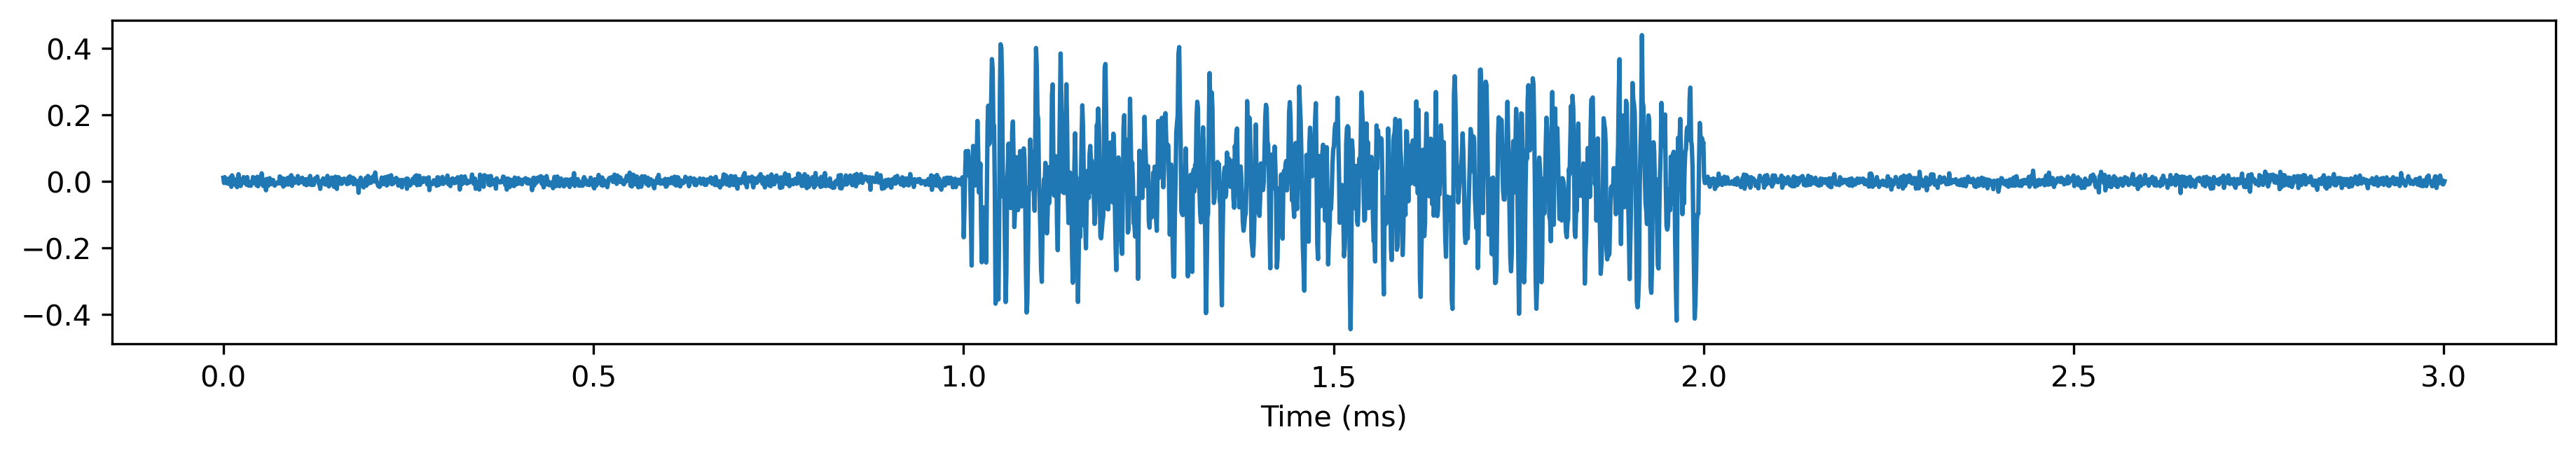

In [69]:
signal = baseline_1
fig, ax = plt.subplots(figsize=(15, 2), dpi=300)
ax.set_xlabel("Time (ms)")
ax.plot(jnp.linspace(0, len(signal) / fs, len(signal)), signal)
print(f"Reference mean frequency: {MNF_1} Hz")

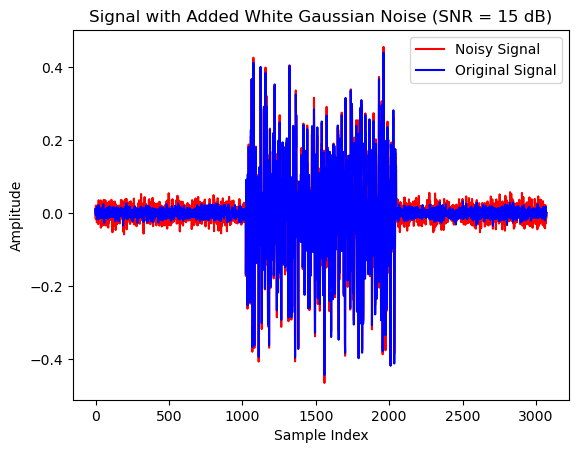

In [70]:
SNR = 15
#signal_noise = add_noise(baseline_1, SNR, plot = True)
signal_noise = add_noise(signal, SNR, plot=True)
#signal_noise = add_wgn_to_sig(baseline_1, noise, SNR)
signal = signal_noise

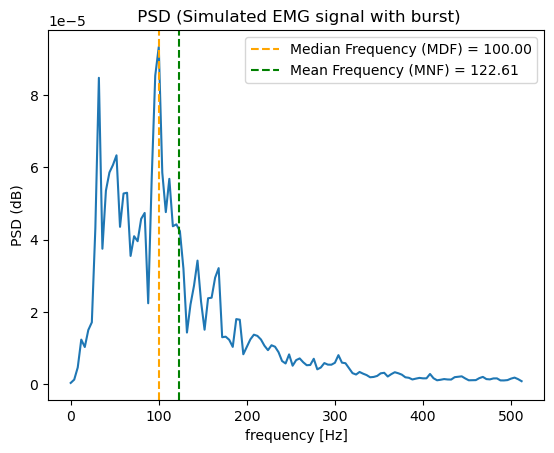

In [71]:
psd_welch, f_welch, MNF = superlet.compute_psd_welch(signal, fs, plot=True, muscle='Simulated EMG signal with burst')

In [72]:
MNF_1

[121.57978997586497]

Reference mean frequency: [121.57978997586497] Hz


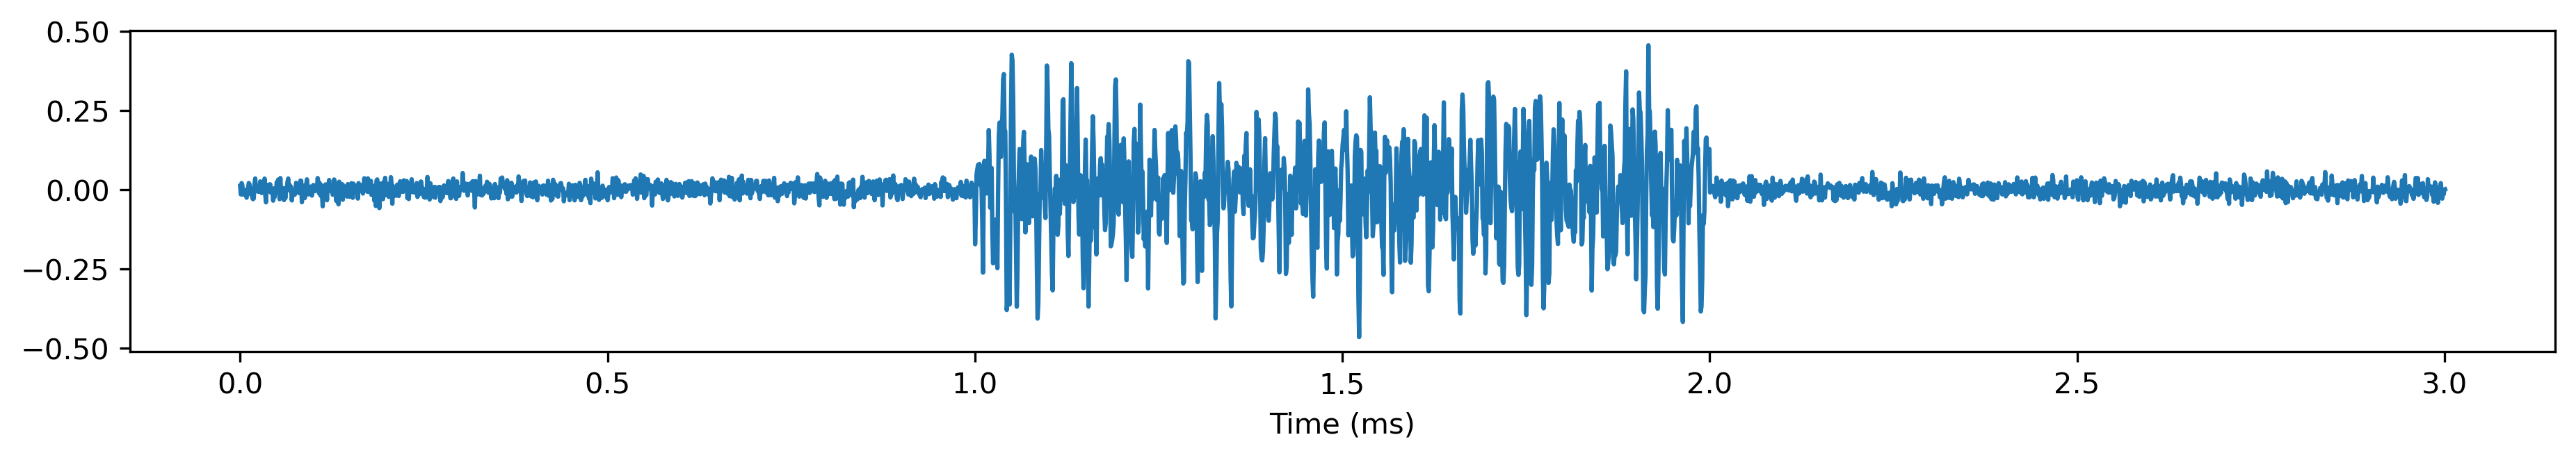

In [73]:
fig, ax = plt.subplots(figsize=(15, 2), dpi=300)
ax.set_xlabel("Time (ms)")
ax.plot(jnp.linspace(0, len(signal) / fs, len(signal)), signal)
print(f"Reference mean frequency: {MNF_1} Hz")

## WAVELET PARAMETERS = 3, 16, 33, 55, 60, 115 cycles

In [74]:
importlib.reload(superlet)

<module 'superlets_package.superlets' from '/Users/neuralrehabilitationgroup/PycharmProjects/Superlets-Marina/superlets_package/superlets.py'>

119.10223
117.56798
117.608086
118.051605
118.15668


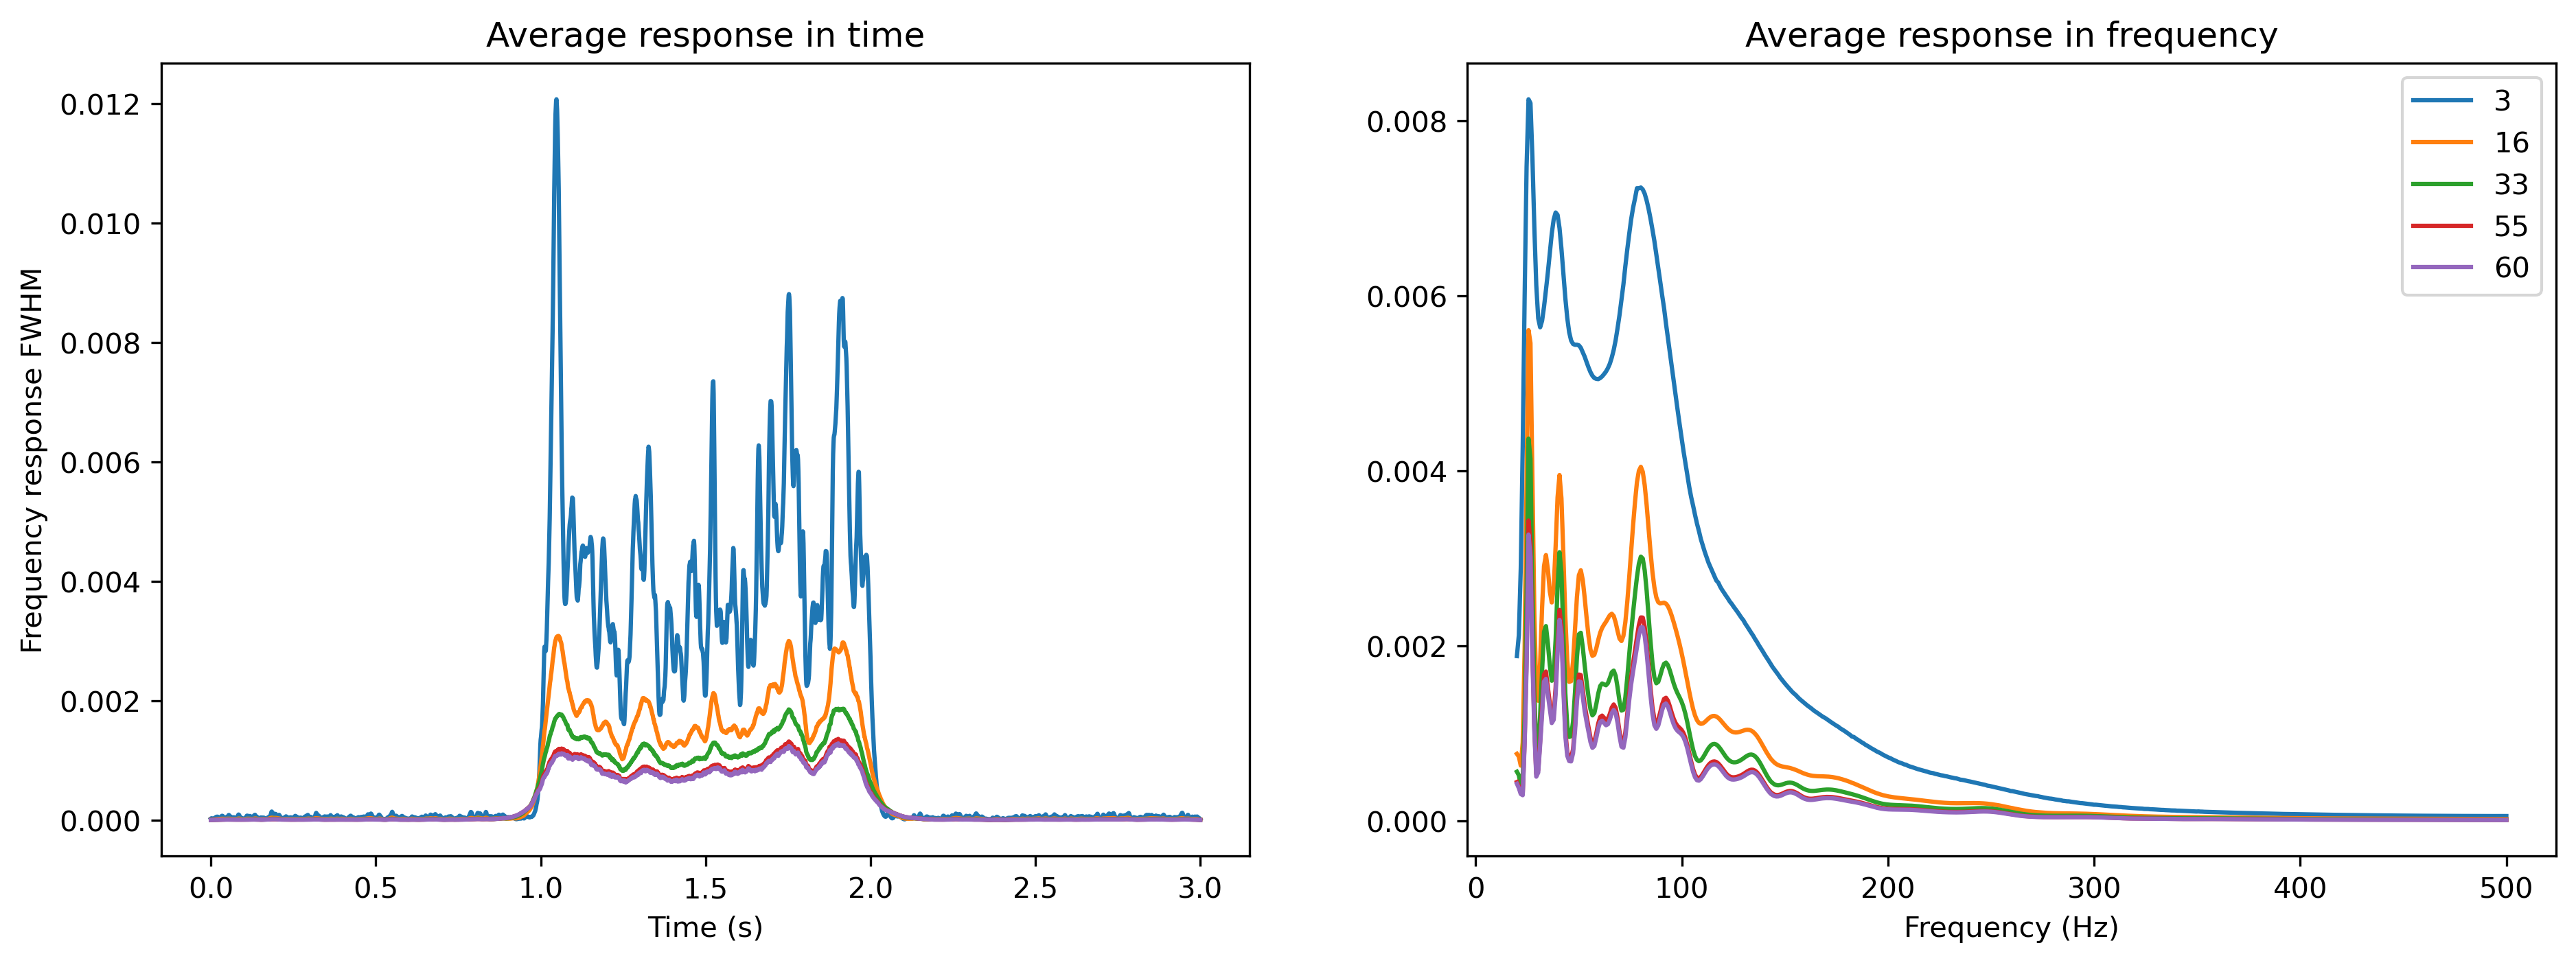

In [75]:
if plot_1:
    fig, ax = plt.subplots(ncols=len(params_wavelet), figsize=(18, 5), dpi=300)
if plot_2:
    # Definir límites de color para que sean iguales en todos los subplots
    fig_2, ax_2 = plt.subplots(ncols=len(params_wavelet), figsize=(18, 5), dpi=300)
    fig_3, ax_3 = plt.subplots(figsize=(10, 6))

mae_wavelet = []
std_wavelet = []
times_wavelet = []

total_time = []
total_freq = []

total_scalogram_wavelet = []
res_wavelet = []

# Iterar sobre los parámetros de wavelet
for i, c in enumerate(params_wavelet):
    wavelet = f"cmor{c}-1.0"

    # Transformada wavelet continua
    #cwtmatr, freqs_1 = pywt.cwt(signal, sc, wavelet, sampling_period=1/fs)
    cwtmatr, f, physical_freqs = morlet.wavelet_transform_2(signal,wavelet,freqs,fs)

    cwtmatr = np.abs(cwtmatr[:, :])

    tiempo_wv = np.linspace(0,signal_duration,cwtmatr.shape[1])

    if plot_1:
        # im = ax[i].imshow(cwtmatr, aspect='auto', cmap="jet", interpolation="none", origin="lower", extent=[0, len(signal)/fs, freqs_1[-1], freqs_1[0]]) #, vmin=vmin, vmax=vmax)
        pcm = ax[i].pcolormesh(tiempo_wv, f, cwtmatr)
        #ax[i].set_yscale("log")
        ax[i].set_xlabel("Time (s)")
        ax[i].set_ylabel("Frequency (Hz)")
        ax[i].set_ylim(freqs[0], freqs[-1])

        cbar = fig.colorbar(pcm, ax=ax[i], orientation='horizontal')
        cbar.set_label('Power [a.u]', rotation=0, labelpad=15)  # Etiqueta de la colorbar
        plt.tight_layout()

    scalogram_2 = jnp.abs(cwtmatr)**2

    total_scalogram_wavelet.append(scalogram_2)
    instant_mean_freq_total = []


    instant_freq = np.sum(scalogram_2 * f[:, np.newaxis], axis=0) / np.sum(scalogram_2, axis=0)

    start_idx = np.searchsorted(tiempo_wv, burst_start_1)  # Encuentra el índice de inicio
    end_idx = np.searchsorted(tiempo_wv, burst_start_1 + burst_duration_1)  # Encuentra el índice final
#
    instant_mean_freq_burst = instant_freq[start_idx:end_idx]

    # Create time (each column is a time instant)
    tiempo = np.arange(len(instant_freq)) / fs

    if plot_2:
        ax_2[i].plot(tiempo, instant_freq)

        ax_2[i].set_xlabel("Time (s)")
        ax_2[i].set_ylabel("Frequency (Hz)")
        #ax_2[i].set_xlim(tiempo[0], tiempo[-1])
        #plt.title("Medias de cada fila en función del tiempo")
        ax_2[i].grid(True)

        ax_3.plot(tiempo, instant_freq, label=f"Mean frequency (Cycles: {c})")
        plt.tight_layout()

    print(np.mean(instant_mean_freq_burst))
    mae, std = calculate_mae(instant_mean_freq_burst, MNF_1)
    mae_wavelet.append(mae)
    std_wavelet.append(std)

    time = np.arange(scalogram_2.shape[1]) / fs

    total_time.append(time)
    total_freq.append(freqs)

# Configuración del gráfico
if plot_2:
    ax_3.set_xlabel("Time (s)")
    ax_3.set_ylabel("Frequency (Hz)")
    ax_3.legend()
    ax_3.grid(True)
    ax_3.set_title("Comparación de frecuencias medias instantáneas")

res_wavelet = superlet.compute_avg_response_resolution(total_scalogram_wavelet, total_time, total_freq, params_wavelet)

In [76]:
mae_wavelet

[16.228006235538075,
 10.941554578722073,
 9.016257827445852,
 7.903396915945127,
 7.727507625075891]

## PARÁMETROS SUPERLET: base_cycle, min_order, max_order = [3, 5, 1, 1, 1, 1], [1, 1, 5, 10, 20, 30], [30, 30, 40, 100, 100, 200]

146.5424604424561
146.2153928499323
130.5133472632363
125.21612561508054
122.57599595451151


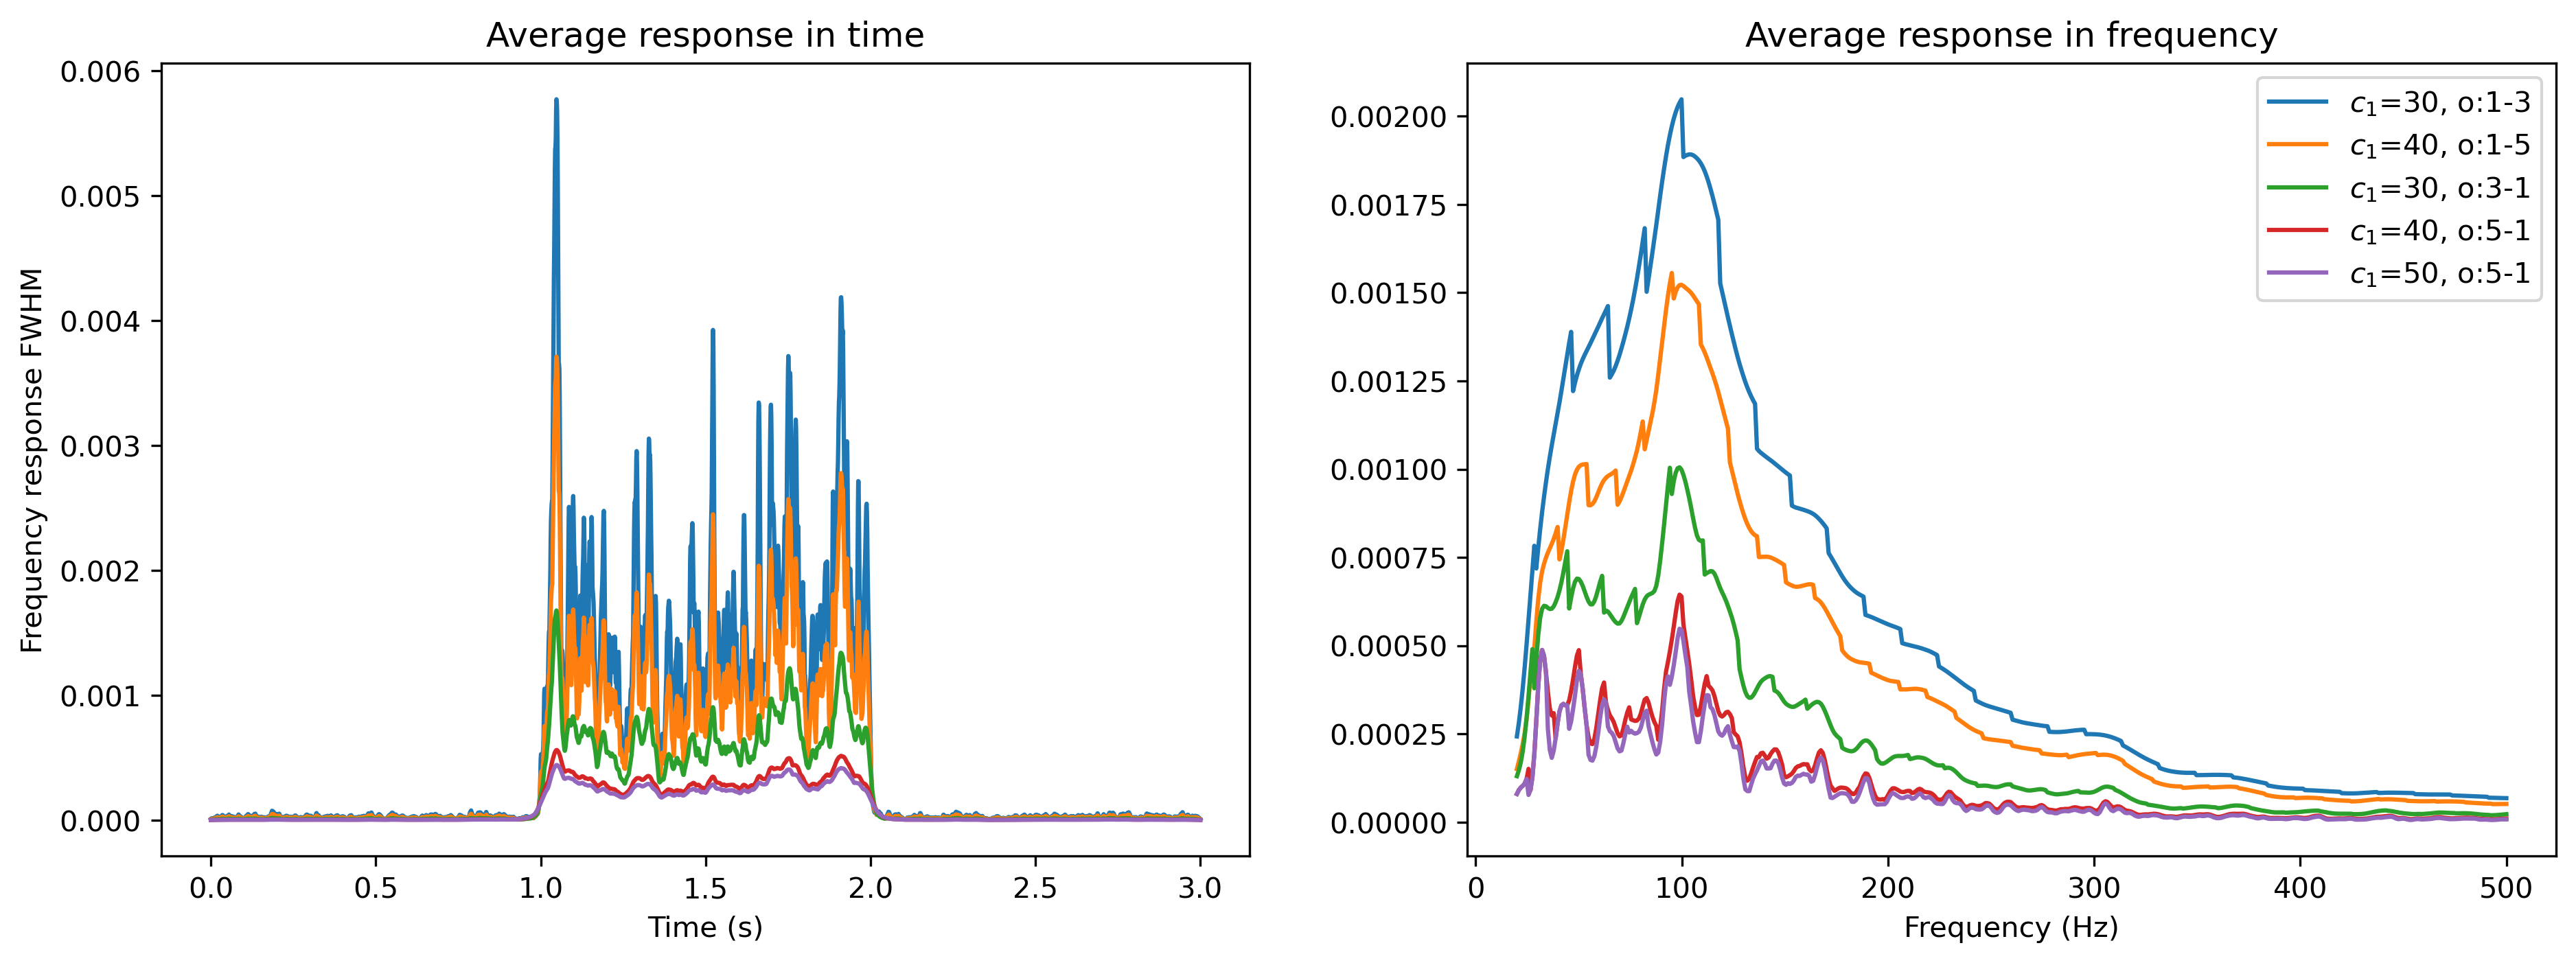

In [77]:
importlib.reload(superlet)
#params_superlet = [[3, 5, 1, 1, 1, 1], [1, 1, 5, 10, 20, 30], [30, 30, 40, 100, 100, 200]]
#params_superlet = [[3,5,1],[1,1,5],[30,30,40]]

if plot_1:
    fig, ax = plt.subplots(ncols=len(params_superlet[0]), figsize=(15, 5), dpi=300)

if plot_2:
    fig_2, ax_2 = plt.subplots(ncols=len(params_superlet[0]), figsize=(15, 5), dpi=300)
    fig_3, ax_3 = plt.subplots(figsize=(10, 6))

mae_superlet = []
std_superlet = []
times_superlet = []

total_time = []
total_freq = []

total_scalogram_superlet = []

#enumerate(zip([3,5,1], [1,1,5], [30,30,40])):
#enumerate(zip([1,1,1], [10,20,30], [100,100,200])):
for (i, (base_cycle, min_order, max_order)) in enumerate(zip(*params_superlet)):
    import time

    start_time = time.time()
    wv, scalogram = superlet.adaptive_superlet_transform(signal, freqs, sampling_freq=fs,
                                                         base_cycle=base_cycle, min_order=min_order,
                                                         max_order=max_order, mode="mul")
    end_time = time.time()
    times_superlet.append(end_time - start_time)

    if plot_1:
        im = ax[i].imshow(jnp.abs(scalogram) ** 2, aspect='auto', cmap="jet", interpolation="none", origin="lower",
                          extent=[0, len(signal) / fs, freqs[0], freqs[-1]])
        ax[i].set_title(f"$c_1$: {base_cycle}, o: {min_order}-{max_order}")
        ax[i].set_xlabel("Time (s)")
        ax[i].set_ylabel("Frequency (Hz)")

        cbar = fig.colorbar(im, ax=ax[i], orientation='horizontal')
        cbar.set_label('Power [a.u]', rotation=0, labelpad=15)  # Etiqueta de la colorbar
        plt.tight_layout()

    scalogram_2 = np.abs(scalogram) ** 2

    # if np.any(np.isnan(jnp.abs(scalogram) ** 2)) or np.any(np.isinf(jnp.abs(scalogram) ** 2)):
    #     scalogram_2 = np.nan_to_num(jnp.abs(scalogram) ** 2)

    total_scalogram_superlet.append(scalogram_2)
    #scalogram_2 = scalogram_2 * freqs[:, np.newaxis]  

    instant_mean_freq_total = []

    instant_mean_freq = np.sum(scalogram_2 * freqs[:, np.newaxis], axis=0) / np.sum(scalogram_2, axis=0)

    initial_imnf = instant_mean_freq[:round(burst_start_1 * fs) - offset]
    instant_mean_freq_total.extend(initial_imnf)
    # plt.figure()
    # plt.plot(initial_imnf)

    instant_mean_freq_burst = instant_mean_freq[
                              round(burst_start_1 * fs):round((burst_start_1 + burst_duration_1) * fs)]
    instant_mean_freq_burst = instant_mean_freq_burst[offset_burst:round(len(instant_mean_freq_burst)) - offset_burst]
    instant_mean_freq_total.extend(instant_mean_freq_burst)
    # plt.figure()
    # plt.plot(instant_mean_freq_burst)

    final_imnf = instant_mean_freq[round((burst_start_1 + burst_duration_1) * fs) + offset:]
    instant_mean_freq_total.extend(final_imnf)
    # plt.figure()
    # plt.plot(final_imnf)

    # Create time (each column is a time instant)
    tiempo = np.arange(len(instant_mean_freq_total)) / fs

    if plot_2:
        ax_2[i].plot(tiempo, instant_mean_freq_total,
                     label="Mean frequency (each window of " + str(len(freqs)) + ' samples)')

        ax_2[i].set_xlabel("Time (s)")
        ax_2[i].set_ylabel("Frequency (Hz)")
        #ax_2[i].set_xlim(tiempo[0], tiempo[-1])
        #plt.title("Medias de cada fila en función del tiempo")
        ax_2[i].legend()
        ax_2[i].grid(True)

        ax_3.plot(tiempo, instant_mean_freq_total, label=f"Mean frequency (Cycles: {base_cycle})")

    print(np.mean(instant_mean_freq_burst))
    mae, std = calculate_mae(instant_mean_freq_burst, MNF_1)
    mae_superlet.append(mae)
    std_superlet.append(std)

    time = np.arange(scalogram_2.shape[1]) / fs

    total_time.append(time)
    total_freq.append(freqs)

if plot_2:
    ax_3.set_xlabel("Time (s)")
    ax_3.set_ylabel("Frequency (Hz)")
    ax_3.legend()
    ax_3.grid(True)
    ax_3.set_title("Comparación de frecuencias medias instantáneas")

res_superlet = superlet.compute_avg_response_resolution(total_scalogram_superlet, total_time, total_freq,
                                                        [f'$c_1$={c3}, o:{c1}-{c2}' for c1, c2, c3 in
                                                         zip(*params_superlet)])

In [78]:
mae_superlet

[29.122911036100426,
 27.44632268195479,
 15.260550932509824,
 10.206462943309635,
 9.287681807260977]

## STFT PARAMETERS (window = duration/cycles) = 38, 200, 413, 550, 600, 824 ms

In [79]:
importlib.reload(superlet)

<module 'superlets_package.superlets' from '/Users/neuralrehabilitationgroup/PycharmProjects/Superlets-Marina/superlets_package/superlets.py'>

# Parámetros de la STFT con ventanas de 38 ms, 200 ms, y 413 ms (convertido a muestras)

126.34946892849467
119.99176187091898
119.34147861495688
119.23725132117436
119.2303664650739


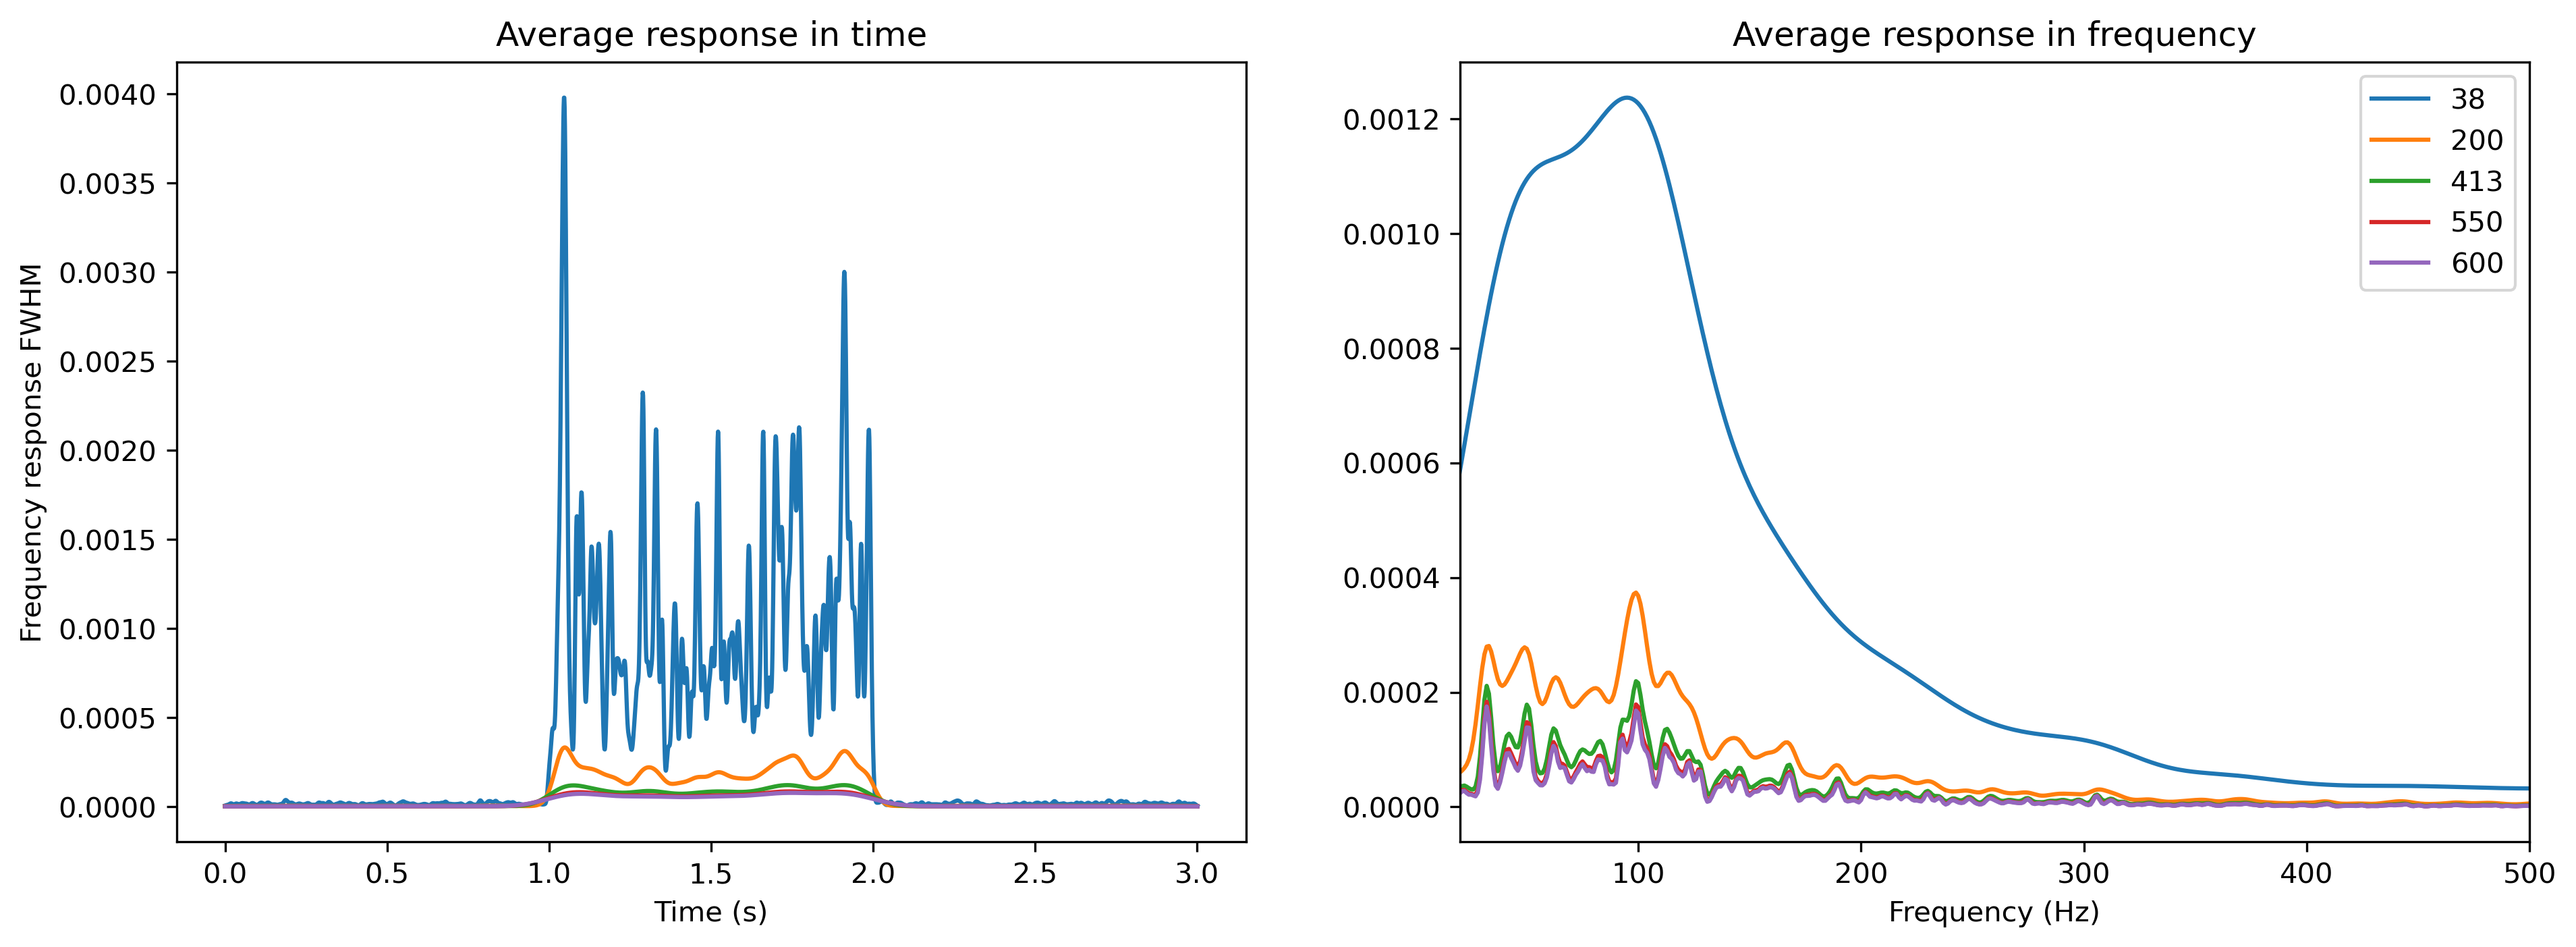

In [80]:
# [38, 200, 413, 550, 600, 824]
#windows_samples = [int((w / 1000) * fs) for w in windows_ms]  # Convertir a muestras

if plot_1:
    fig, ax = plt.subplots(ncols=len(windows_ms), figsize=(15, 5), dpi=300)

if plot_2:
    fig_2, ax_2 = plt.subplots(ncols=len(windows_ms), figsize=(15, 5), dpi=300)
    fig_3, ax_3 = plt.subplots(figsize=(10, 6))

mae_stft = []
std_stft = []
times_stft = []

total_time = []
total_freq = []

res_stft = []
total_scalogram_stft = []

for i, w in enumerate(windows_ms):
    import time

    # Calcular la ventana Blackman
    start_time = time.time()
    window = windows.blackman(w)

    # Hacer que la f de la stft tenga el mismo tamaño que las demás
    nfft = 2 * (len(freqs))
    # Dimensión de la frecuencia = nfft/2 + 1
    # Dimesión del tiempo = [(N - noverlap)/(nperseg-noverlap)] + 1 = 

    # Realizar la STFT con la ventana Blackman y superposición del 50%
    #f, t, Zxx = stft(signal, fs, window=window, nfft=nfft, nperseg=w, noverlap=w//2, padded=True, scaling='psd')
    f, t, Zxx = stft(signal, fs=fs, window='blackman', nperseg=w, noverlap=w - 1, nfft=nfft, detrend=False,
                     return_onesided=True, boundary='zeros', padded=True, axis=-1, scaling='spectrum')

    # ax[i].pcolormesh(t, f, np.abs(Zxx), shading='gouraud', cmap='jet')

    # Calcular la representación de potencia (magnitud al cuadrado)
    Zxx_power = np.abs(Zxx) ** 2

    # Graficar la representación de potencia
    #plt.figure(figsize=(10, 6))

    end_time = time.time()
    times_stft.append(end_time - start_time)

    if plot_1:
        pcm = ax[i].pcolormesh(t, f, Zxx_power, shading='gouraud', cmap='jet')

        ax[i].set_title(f'W={w * 1000 // fs} ms')
        ax[i].set_ylabel('Frecuencia [Hz]')
        ax[i].set_xlabel('Tiempo [s]')

        cbar = fig.colorbar(pcm, ax=ax[i], orientation='horizontal')
        cbar.set_label('Power', rotation=270, labelpad=15)  # Etiqueta de la colorbar

        #fig.colorbar(pcm, ax=ax[i], label='Potencia')
        ax[i].set_ylim(freqs[0], freqs[-1])  # Ajustar el rango de frecuencias si es necesario
        plt.tight_layout()

    scalogram_2 = Zxx_power

    #if np.any(np.isnan(jnp.abs(Zxx)**2)) or np.any(np.isinf(jnp.abs(Zxx)**2)):
    # scalogram_2 = jnp.nan_to_num(jnp.abs(Zxx) ** 2, nan=0.0, posinf=0.0, neginf=0.0)

    total_scalogram_stft.append(scalogram_2)

    instant_mean_freq_total = []
    instant_mean_freq = np.sum(scalogram_2 * f[:, np.newaxis], axis=0) / np.sum(scalogram_2, axis=0)

    #mean_instant_freq = np.where(freqs,np.max(scalogram_2, axis=0))
    # mean_instant = np.mean(np.where(freqs,max(scalogram_2)))
    # plt.figure()
    # plt.plot(mean_instant)

    start_index = np.argmin(np.abs(t - burst_start_1))
    end_index_burst = np.argmin(np.abs(t - (burst_start_1 + burst_duration_1)))

    # Segmento inicial antes del burst
    initial_imnf = instant_mean_freq[:max(0, start_index - offset)]  # Asegurar que no haya índices negativos
    instant_mean_freq_total.extend(initial_imnf)
    # plt.figure()
    # plt.plot(initial_imnf)

    # Segmento durante el burst
    instant_mean_freq_burst = instant_mean_freq[start_index:end_index_burst]
    instant_mean_freq_burst = instant_mean_freq_burst[offset_burst:len(
        instant_mean_freq_burst) - offset_burst]  # Aplicar offset dentro del burst
    instant_mean_freq_total.extend(instant_mean_freq_burst)
    # plt.figure()
    # plt.plot(instant_mean_freq_burst)

    # Segmento final después del burst
    final_start_index = end_index_burst + offset
    final_imnf = instant_mean_freq[final_start_index:]
    instant_mean_freq_total.extend(final_imnf)

    # initial_imnf = instant_mean_freq[:np.where(t >= burst_start_1)[0][0]-offset]
    # instant_mean_freq_total.extend(initial_imnf)
    # # plt.figure()
    # # plt.plot(initial_imnf)
    # 
    # print(t >= (burst_start_1 + burst_duration_1))
    # instant_mean_freq_burst = instant_mean_freq[np.where(t >= burst_start_1)[0][0]:np.where(t >= (burst_start_1 + burst_duration_1))[0][0]]
    # instant_mean_freq_burst = instant_mean_freq_burst[offset_burst:len(instant_mean_freq_burst)-offset_burst]
    # instant_mean_freq_total.extend(instant_mean_freq_burst)
    # # plt.figure()
    # # plt.plot(instant_mean_freq_burst)
    #  
    # final_imnf = instant_mean_freq[np.where(t >= burst_start_1 + burst_duration_1)[0][0] + offset:]
    # instant_mean_freq_total.extend(final_imnf)
    # plt.figure()
    # plt.plot(final_imnf)

    # Create time (each column is a time instant)
    tiempo = np.linspace(t[0], t[-1], len(instant_mean_freq_total))

    if plot_2:
        ax_2[i].plot(tiempo, instant_mean_freq_total,
                     label="Mean frequency (each window of " + str(len(freqs)) + ' samples)')

        ax_2[i].set_xlabel("Time (s)")
        ax_2[i].set_ylabel("Frequency (Hz)")
        #ax_2[i].set_xlim(tiempo[0], tiempo[-1])
        #plt.title("Medias de cada fila en función del tiempo")
        ax_2[i].legend()
        ax_2[i].grid(True)

        ax_3.plot(tiempo, instant_mean_freq_total, label=f"Mean frequency (Cycles: {w})")

    print(np.mean(instant_mean_freq_burst))
    mae, std = calculate_mae(instant_mean_freq_burst, MNF_1)
    mae_stft.append(mae)
    std_stft.append(std)

    total_time.append(np.linspace(t[0], t[-1], scalogram_2.shape[1]))
    total_freq.append(np.linspace(f[0], f[-1], scalogram_2.shape[0]))

# Configuración del gráfico
if plot_2:
    ax_3.set_xlabel("Time (s)")
    ax_3.set_ylabel("Frequency (Hz)")
    ax_3.legend()
    ax_3.grid(True)
    ax_3.set_title("Comparación de frecuencias medias instantáneas")

res_stft = superlet.compute_avg_response_resolution(total_scalogram_stft, total_time, total_freq, windows_ms, stft=[freqs[0],freqs[-1]])

In [81]:
mae_stft

[22.81507408608871,
 10.239630089292625,
 7.93561993442075,
 6.910969132064395,
 6.671893124122221]

### Plot comparison of the same SNR

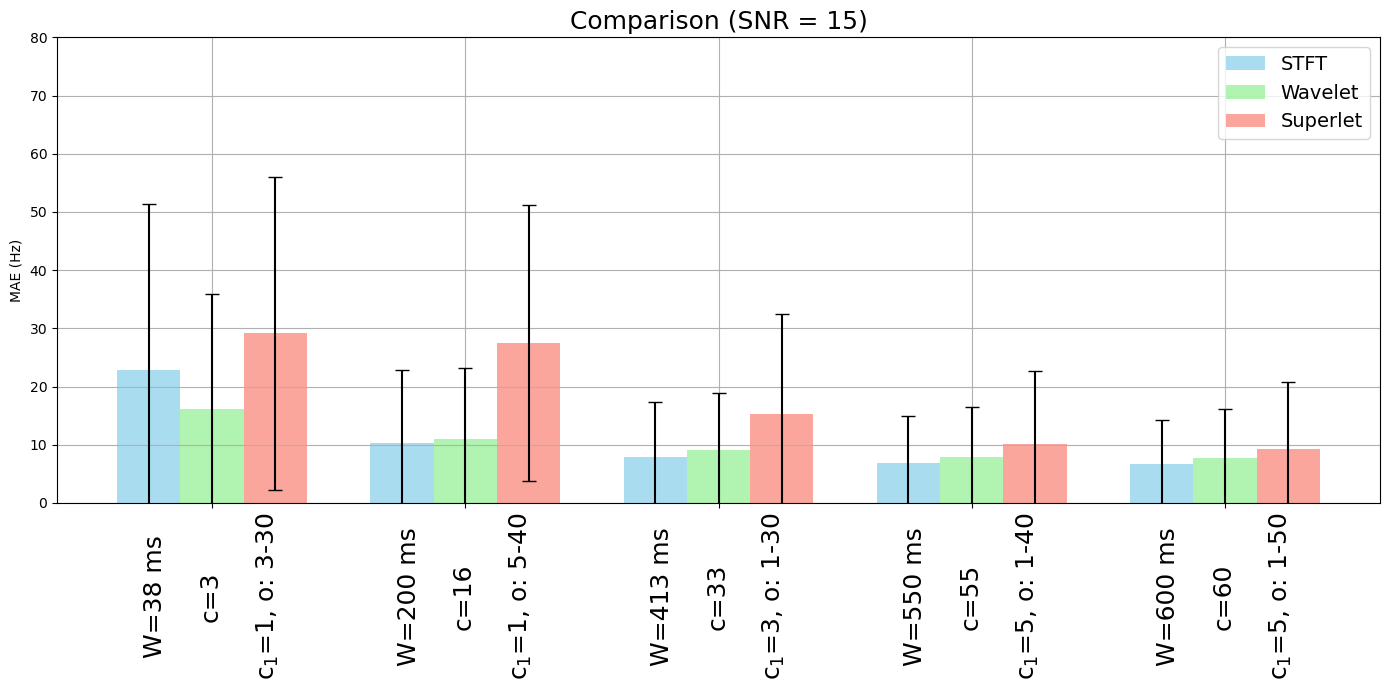

In [82]:
# params_wavelet = [3, 16, 33, 55, 60, 115]
# params_superlet = [
#     (3, 1, 30), (5, 1, 30), (1, 5, 40), (1, 10, 100), (1, 20, 100), (1, 30, 200)
# ]
# params_stft = [38, 200, 413, 550, 600, 824]  # Tamaños de ventana en ms
params_stft = windows_ms

# Número de condiciones
num_conditions = len(mae_wavelet)
x = np.arange(num_conditions)  # Posiciones para cada grupo de barras
bar_width = 0.25  # Ancho de las barras

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))

# Graficar cada técnica con sus valores y barras de error
plt.bar(x - bar_width, mae_stft, width=bar_width, yerr=std_stft, capsize=5, label='STFT', color='skyblue', alpha=0.7)
plt.bar(x, mae_wavelet, width=bar_width, yerr=std_wavelet, capsize=5, label='Wavelet', color='lightgreen', alpha=0.7)
plt.bar(x + bar_width, mae_superlet, width=bar_width, yerr=std_superlet, capsize=5, label='Superlet', color='salmon',
        alpha=0.7)

# Configuración de etiquetas en el eje x con los parámetros específicos
labels = [
    f"W={p_stft} ms\n\nc={p_w}\n\nc$_1$={p_s[0]}, o: {p_s[1]}-{p_s[2]}"
    for p_w, p_s, p_stft in zip(params_wavelet, zip(*params_superlet), params_stft)
]

plt.xticks(x, labels, rotation=90, ha='center', fontsize=18)
#plt.xlabel('Condiciones y Parámetros')
plt.yticks(np.arange(0, 81, 10))

plt.ylabel('MAE (Hz)')
plt.title('Comparison (SNR = ' + str(SNR) + ')', fontsize=18)
plt.ylim(0, 80)
plt.legend(fontsize=14)
plt.grid(True)

# Ajustar el layout para mejorar visualización de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# COMPUTE RESOLUTION

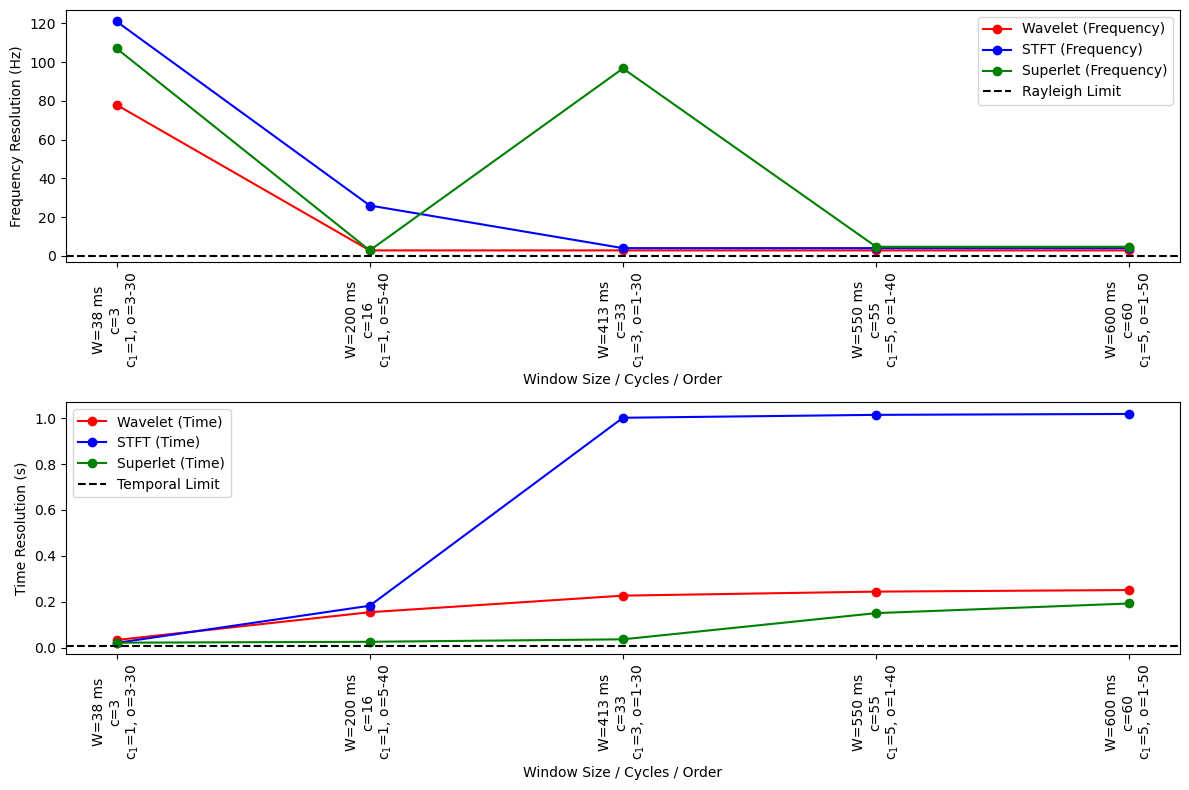

In [83]:
rayleigh_limit = 1 / (4 * np.pi)

# Etiquetas para los grupos de parámetros con salto de línea adicional
labels = [
    f"W={p_stft} ms\nc={p_wavelet}\nc$_1$={p_superlet[0]}, o={p_superlet[1]}-{p_superlet[2]}"
    for p_wavelet, p_superlet, p_stft in zip(params_wavelet, zip(*params_superlet), params_stft)
]

x = np.arange(1,len(params_wavelet)+1)

plt.figure(figsize=(12, 8))

# Primer gráfico (Frecuencia)
plt.subplot(2, 1, 1)
plt.plot(x, [r[1] for r in res_wavelet], 'ro-', label="Wavelet (Frequency)")
plt.plot(x, [r[1] for r in res_stft], 'bo-', label="STFT (Frequency)")
plt.plot(x, [r[1] for r in res_superlet], 'go-', label="Superlet (Frequency)")
plt.axhline(rayleigh_limit, color='k', linestyle='--', label="Rayleigh Limit")
plt.xlabel("Window Size / Cycles / Order")
plt.ylabel("Frequency Resolution (Hz)")
plt.legend()

# Segundo gráfico (Tiempo)
plt.subplot(2, 1, 2)
plt.plot(x, [r[0] for r in res_wavelet], 'ro-', label="Wavelet (Time)")
plt.plot(x, [r[0] for r in res_stft], 'bo-', label="STFT (Time)")
plt.plot(x, [r[0] for r in res_superlet], 'go-', label="Superlet (Time)")
plt.axhline(1 / MNF_1[0], color='k', linestyle='--', label="Temporal Limit")
plt.xlabel("Window Size / Cycles / Order")
plt.ylabel("Time Resolution (s)")
plt.legend()

# Ajuste de los xticks para ambos subgráficos
for ax in plt.gcf().get_axes():
    ax.set_xticks(x)  # Establecer los valores de los ticks
    ax.set_xticklabels(labels, rotation=90, ha='center', fontsize=10)  # Establecer las etiquetas con el formato deseado

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [84]:
MAES

{'stft': [[22.025153255777944,
   10.574927500907396,
   9.117159706780456,
   8.538114710944258,
   8.31303780898141],
  [29.23463739758034,
   14.56355754361055,
   10.994405903282196,
   10.69363875011936,
   10.633200338348633]],
 'wavelet': [[16.466571543655128,
   11.872369591992316,
   10.102975570972653,
   8.989216191594675,
   8.819056597280373],
  [21.704627860965658,
   14.113001607157976,
   11.53101388870954,
   10.57361613373524,
   10.522926262559679]],
 'superlet': [[26.388756565223574,
   24.476662201610313,
   13.723851177836906,
   9.693462599218202,
   9.337450353410073],
  [41.162132808604795,
   40.4720876272264,
   24.262756350105946,
   17.21772976720127,
   14.567085726718702]],
 'std_stft': [[27.399122692589234,
   12.529921666495827,
   9.570765678776354,
   8.262169336690132,
   7.871692957889799],
  [35.47090395344231,
   15.724050070607541,
   10.08733448935368,
   8.042813717661994,
   7.5354735821468175]],
 'std_wavelet': [[19.636955, 12.590243, 10.0395

In [85]:
MAES['wavelet'].append(mae_wavelet)
MAES['stft'].append(mae_stft)
MAES['superlet'].append(mae_superlet)
MAES['std_wavelet'].append(std_wavelet)
MAES['std_stft'].append(std_stft)
MAES['std_superlet'].append(std_superlet)

### COMPARISON BETWEEN ALL SNR

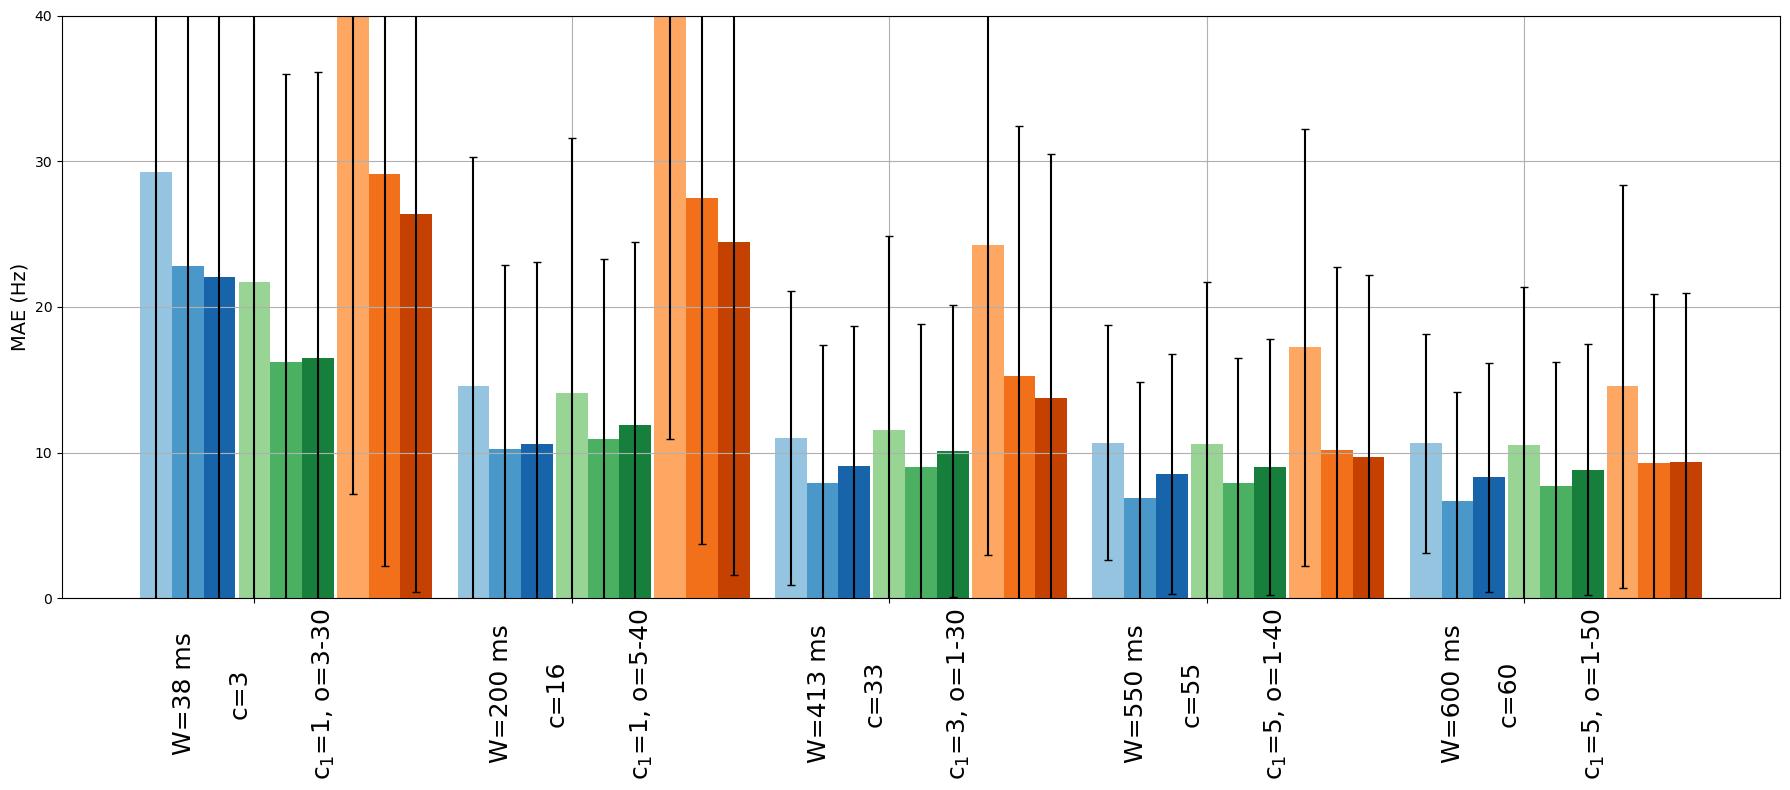

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
params_wavelet = params_wavelet
params_superlet = params_superlet
params_stft = windows_ms  # Tamaños de ventana en ms

# Datos MAE para cada técnica y SNR
mae_stft = MAES['stft']
std_stft = MAES['std_stft']

mae_wavelet = MAES['wavelet']
std_wavelet = MAES['std_wavelet']

mae_superlet = MAES['superlet']
std_superlet = MAES['std_superlet']

# Reordenar los niveles de SNR al orden deseado: 5 dB, 20 dB, Sin SNR
snr_labels = ["5 dB", "20 dB", "Inf"]
mae_stft_2 = [mae_stft[1], mae_stft[2], mae_stft[0]]
std_stft_2 = [std_stft[1], std_stft[2], std_stft[0]]

mae_wavelet_2 = [mae_wavelet[1], mae_wavelet[2], mae_wavelet[0]]
std_wavelet_2 = [std_wavelet[1], std_wavelet[2], std_wavelet[0]]

mae_superlet_2 = [mae_superlet[1], mae_superlet[2], mae_superlet[0]]
std_superlet_2 = [std_superlet[1], std_superlet[2], std_superlet[0]]

# Configuración del gráfico
num_params = len(params_stft)  # Número de parámetros
num_snr = len(snr_labels)  # Número de niveles de ruido
x = np.arange(num_params)  # Posiciones base para cada grupo de parámetros
bar_width = 0.1  # Ancho de cada barra
group_width = bar_width * num_snr  # Espacio reservado para cada grupo de barras

# Tonalidades por nivel de ruido (ordenadas)
tonalidades = {
    "5 dB": 0.4,
    "20 dB": 0.6,
    "Inf": 0.8,
}

# Colores base por metodología (asegurando correspondencia)
colores_base = {
    "STFT": plt.colormaps["Blues"],
    "Wavelet": plt.colormaps["Greens"],
    "Superlet": plt.colormaps["Oranges"],
}

# Crear el gráfico
plt.figure(figsize=(18, 8))

# Crear listas para la leyenda
handles = []
labels_legend = []

# Dibujar barras para cada técnica y SNR
for i, snr in enumerate(snr_labels):  # Iterar sobre niveles de SNR
    # Dibujar barras para STFT
    bar = plt.bar(
        x - 0.01 - group_width + i * bar_width,
        [np.array(mae_stft_2[i])[k] for k in range(num_params)],
        width=bar_width,
        color=colores_base["STFT"](tonalidades[snr]),
        label=f'STFT ({snr})'
    )
    handles.append(bar[0])

    plt.errorbar(
        x - 0.01 - group_width + i * bar_width,
        [np.array(mae_stft_2[i])[k] for k in range(num_params)],
        yerr=[np.array(std_stft_2[i])[k] for k in range(num_params)],
        fmt='none',
        ecolor='black',
        capsize=3
    )
    
    # Dibujar barras para Wavelet
    bar = plt.bar(
        x + i * bar_width,
        [np.array(mae_wavelet_2[i])[k] for k in range(num_params)],
        width=bar_width,
        color=colores_base["Wavelet"](tonalidades[snr]),
        label=f'Wavelet ({snr})'
    )
    handles.append(bar[0])

    plt.errorbar(
        x + i * bar_width,
        [np.array(mae_wavelet_2[i])[k] for k in range(num_params)],
        yerr=[np.array(std_wavelet_2[i])[k] for k in range(num_params)],
        fmt='none',
        ecolor='black',
        capsize=3
    )

    # Dibujar barras para Superlet
    bar = plt.bar(
        x + 0.01 + group_width + i * bar_width,
        [np.array(mae_superlet_2[i])[k] for k in range(num_params)],
        width=bar_width,
        color=colores_base["Superlet"](tonalidades[snr]),
        label=f'Superlet ({snr})'
    )
    handles.append(bar[0])

    plt.errorbar(
        x + 0.01 + group_width + i * bar_width,
        [np.array(mae_superlet_2[i])[k] for k in range(num_params)],
        yerr=[np.array(std_superlet_2[i])[k] for k in range(num_params)],
        fmt='none',
        ecolor='black',
        capsize=3
    )

# Ordenar la leyenda agrupada por metodología
labels_legend = [f'STFT ({snr})' for snr in snr_labels] + \
                [f'Wavelet ({snr})' for snr in snr_labels] + \
                [f'Superlet ({snr})' for snr in snr_labels]
handles = handles[:len(labels_legend)]

# Etiquetas para los grupos de parámetros con salto de línea adicional
labels = [
    f"W={p_stft} ms\n\nc={p_wavelet}\n\n\nc$_1$={p_superlet[0]}, o={p_superlet[1]}-{p_superlet[2]}"
    for p_wavelet, p_superlet, p_stft in zip(params_wavelet, zip(*params_superlet), params_stft)
]

# Configurar eje X y otros detalles
plt.xticks(x, labels, rotation=90, ha='center', fontsize=18)
plt.yticks(np.arange(0, 41, 10))
plt.ylabel('MAE (Hz)', fontsize=14)
plt.ylim(0, 40)
#plt.legend(handles, labels_legend, fontsize=10, ncol=1)  # Leyenda agrupada
plt.tight_layout()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [87]:
MAES

{'stft': [[22.025153255777944,
   10.574927500907396,
   9.117159706780456,
   8.538114710944258,
   8.31303780898141],
  [29.23463739758034,
   14.56355754361055,
   10.994405903282196,
   10.69363875011936,
   10.633200338348633],
  [22.81507408608871,
   10.239630089292625,
   7.93561993442075,
   6.910969132064395,
   6.671893124122221]],
 'wavelet': [[16.466571543655128,
   11.872369591992316,
   10.102975570972653,
   8.989216191594675,
   8.819056597280373],
  [21.704627860965658,
   14.113001607157976,
   11.53101388870954,
   10.57361613373524,
   10.522926262559679],
  [16.228006235538075,
   10.941554578722073,
   9.016257827445852,
   7.903396915945127,
   7.727507625075891]],
 'superlet': [[26.388756565223574,
   24.476662201610313,
   13.723851177836906,
   9.693462599218202,
   9.337450353410073],
  [41.162132808604795,
   40.4720876272264,
   24.262756350105946,
   17.21772976720127,
   14.567085726718702],
  [29.122911036100426,
   27.44632268195479,
   15.260550932509

In [88]:


# import matplotlib.pyplot as plt
# import numpy as np
# 
# # Parámetros
# params_wavelet = params_wavelet
# params_superlet = params_superlet
# params_stft = windows_ms  # Tamaños de ventana en ms
# 
# # Datos MAE para cada técnica y SNR
# mae_stft = MAES['stft']
# std_stft = MAES['std_stft']
# 
# mae_wavelet = MAES['wavelet']
# std_wavelet = MAES['std_wavelet']
# 
# mae_superlet = MAES['superlet']
# std_superlet = MAES['std_superlet']
# 
# snr_labels = ["Sin SNR", "5 dB", "20 dB"]
# 
# # Configuración del gráfico
# num_params = len(params_stft)  # Número de parámetros (6 en este caso)
# num_snr = len(snr_labels)  # Número de niveles de ruido (3)
# x = np.arange(num_params)  # Posiciones base para cada grupo de parámetros
# bar_width = 0.1  # Ancho de cada barra
# group_width = bar_width * num_snr  # Espacio reservado para cada grupo de barras
# 
# # Crear el gráfico
# plt.figure(figsize=(18, 8))
# 
# # Dibujar barras para cada técnica y SNR
# for i in range(num_snr):  # Iterar sobre niveles de SNR
#     # Dibujar barras para STFT
#     plt.bar(x - 0.01 - group_width + i * bar_width, 
#             [np.array(mae_stft[i])[k] for k in range(num_params)], 
#             width=bar_width, label=f'STFT ({snr_labels[i]})', alpha=0.7)
#     plt.errorbar(x - 0.01 - group_width + i * bar_width, 
#                  [np.array(mae_stft[i])[k] for k in range(num_params)],
#                  yerr=[np.array(std_stft[i])[k] for k in range(num_params)],
#                  fmt='none', ecolor='black', capsize=3)
#     
#     # Dibujar barras para Wavelet
#     plt.bar(x + i * bar_width, 
#             [np.array(mae_wavelet[i])[k] for k in range(num_params)], 
#             width=bar_width, label=f'Wavelet ({snr_labels[i]})', alpha=0.7)
#     plt.errorbar(x + i * bar_width, 
#                  [np.array(mae_wavelet[i])[k] for k in range(num_params)],
#                  yerr=[np.array(std_wavelet[i])[k] for k in range(num_params)],
#                  fmt='none', ecolor='black', capsize=3)
# 
#     # Dibujar barras para Superlet
#     plt.bar(x + 0.01 + group_width + i * bar_width, 
#             [np.array(mae_superlet[i])[k] for k in range(num_params)], 
#             width=bar_width, label=f'Superlet ({snr_labels[i]})', alpha=0.7)
#     plt.errorbar(x + 0.01 + group_width + i * bar_width, 
#                  [np.array(mae_superlet[i])[k] for k in range(num_params)],
#                  yerr=[np.array(std_superlet[i])[k] for k in range(num_params)],
#                  fmt='none', ecolor='black', capsize=3)
#     
# 
# # Etiquetas para los grupos de parámetros
# labels = [
#     f"W={p_stft} ms\nc={p_wavelet}\nc$_1$={p_superlet[0]}, o={p_superlet[1]}-{p_superlet[2]}"
#     for p_wavelet, p_superlet, p_stft in zip(params_wavelet, zip(*params_superlet), params_stft)
# ]
# 
# # Configurar eje X y otros detalles
# plt.xticks(x, labels, rotation=90, ha='center', fontsize=18)
# plt.yticks(np.arange(0, 61, 10))
# plt.ylabel('MAE (Hz)', fontsize=14)
# # plt.title('Comparación de MAE por técnica, parámetro y nivel de ruido', fontsize=16)
# plt.ylim(0,60)
# plt.legend(fontsize=10, ncol=1)
# plt.tight_layout()
# 
# # Mostrar el gráfico
# plt.show()
